In [1]:
import pandas as pd

In [2]:
import numpy

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
data = pd.read_excel("Desktop/survei_tugas_besar.xlsx")

In [6]:
data.shape

(1643, 522)

In [7]:
df = data.drop(data.index[0])
df1 = df.drop(columns = ['Unnamed: 0', 'Id_nama', 'Respondent ID', 'Collector ID', 'Start Date', 'End Date', 'Email Address', 'First Name', 'Last Name', 'Custom Data 1'])

In [8]:
dkls1 = df1['Kelas Surveyor (Mahasiswa)'].combine_first(df1['Unnamed: 12'])
dkls2 = dkls1.replace(numpy.NaN, '')
dkls3 = dkls2.replace([1, 2], ['Sistem dan Teknologi Informasi', 'Teknik Elektro'])
dklsrep = df1.drop(columns = ['Kelas Surveyor (Mahasiswa)', 'Unnamed: 12'])
df2 = pd.merge(dklsrep, dkls3, left_index = True, right_index = True)

In [9]:
djk1 = df2['Jenis Kelamin'].combine_first(df2['Unnamed: 17'])
djk2 = djk1.replace([1, 2], ['Laki-Laki', 'Perempuan'])
djkrep = df2.drop(columns = ['Jenis Kelamin', 'Unnamed: 17'])
df4 = pd.merge(djkrep, djk2, left_index = True, right_index = True)
df5 = df4[pd.notnull(df4['Jenis Kelamin'])]
df6 = df5.reset_index(drop = True)

In [10]:
dage1 = ((((df6['Usia'].combine_first(df6['Unnamed: 19'])).combine_first(df6['Unnamed: 20'])).combine_first(df6['Unnamed: 21'])).combine_first(df6['Unnamed: 22'])).combine_first(df6['Unnamed: 23'])
dage2 = dage1.replace([1,2,3,4,5,6], ['0-15 tahun', '16-20 tahun', '21-30 tahun', '31-40 tahun', '41-50 tahun', '> 50 tahun'])
dagerep = df6.drop(columns = ['Usia', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23'])
df7 = pd.merge(dagerep, dage2, left_index = True, right_index = True)
df8 = df7[pd.notnull(df7['Usia'])]
df9 = df8.reset_index(drop = True)

In [11]:
dedu1 = ((((df9['Pendidikan terakhir'].combine_first(df9['Unnamed: 25'])).combine_first(df9['Unnamed: 26'])).combine_first(df9['Unnamed: 27'])).combine_first(df9['Unnamed: 28'])).combine_first(df9['Unnamed: 29'])
dedu2 = dedu1.replace([1,2,3,4,5,6], ['SD', 'SMP', 'SMA', 'S1', 'S2', 'S3'])
dedurep = df9.drop(columns = ['Pendidikan terakhir', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29'])
df10 = pd.merge(dedurep, dedu2, left_index = True, right_index = True)
df11 = df10[pd.notnull(df10['Pendidikan terakhir'])]
df12 = df11.reset_index(drop = True)

In [12]:
djob1 = (((((df12['Pekerjaan'].combine_first(df12['Unnamed: 31'])).combine_first(df12['Unnamed: 32'])).combine_first(df12['Unnamed: 33'])).combine_first(df12['Unnamed: 34'])).combine_first(df12['Unnamed: 35'])).combine_first(df12['Unnamed: 36'])
djob2 = djob1.replace([1,2,3,4,5,6], ['Pelajar / Mahasiswa', 'Pegawai Negeri', 'Karyawan Swasta', 'Profesi ( Dokter, Dosen, Pengacara, dll)', 'Ibu Rumah Tangga', 'Pengusaha'])
djobrep = df12.drop(columns = ['Pekerjaan', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36'])
df13 = pd.merge(djobrep, djob2, left_index = True, right_index = True)
df14 = df13[pd.notnull(df13['Pekerjaan'])]
df15 = df14.reset_index(drop = True)
df15.loc[(df15['Pekerjaan'] != 'Pelajar / Mahasiswa') & (df15['Pekerjaan'] != 'Pegawai Negeri') & 
                 (df15['Pekerjaan'] != 'Karyawan Swasta') & (df15['Pekerjaan'] != 'Profesi ( Dokter, Dosen, Pengacara, dll)') &
                 (df15['Pekerjaan'] != 'Profesi ( Dokter, Dosen, Pengacara, dll)') & (df15['Pekerjaan'] != 'Ibu Rumah Tangga') &
                 (df15['Pekerjaan'] != 'Pengusaha'),'Pekerjaan'] = 'Lainnya'

In [13]:
dgaji1 = (((df15['Penghasilan per bulan'].combine_first(df15['Unnamed: 38'])).combine_first(df15['Unnamed: 39'])).combine_first(df15['Unnamed: 40']))
dgaji2 = dgaji1.replace([1,2,3,4], ['< 2 juta', '2-5 juta', '5-10 juta', '> 10 juta'])
dgajirep = df15.drop(columns = ['Penghasilan per bulan', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40'])
df16 = pd.merge(dgajirep, dgaji2, left_index = True, right_index = True)
df17 = df16[pd.notnull(df16['Penghasilan per bulan'])]
df18 = df17.reset_index(drop = True)

In [14]:
dbol1 = df18['Apakah Anda pernah melakukan belanja online?'].combine_first(df18['Unnamed: 42'])
dbol2 = dbol1.replace([1,2], ['Pernah', 'Tidak Pernah'])
dbolrep = df18.drop(columns = ['Apakah Anda pernah melakukan belanja online?', 'Unnamed: 42'])
df19 = pd.merge(dbolrep, dbol2, left_index = True, right_index = True)
df19.rename(columns = {'Apakah Anda pernah melakukan belanja online?' : 'Pernah_Belanja_Online'}, inplace = True )

In [15]:
dfrek1 = (df19['Bagaimana frekuensi Anda melakukan belanja online dalam 6 bulan terakhir?'].combine_first(df19['Unnamed: 44'])).combine_first(df19['Unnamed: 45'])
dfrek2 = dfrek1.replace([1,2,3], ['Meningkat', 'Menurun', 'Tetap'])
dfrekrep = df19.drop(columns = ['Bagaimana frekuensi Anda melakukan belanja online dalam 6 bulan terakhir?', 'Unnamed: 44', 'Unnamed: 45'])
df20 = pd.merge(dfrekrep, dfrek2, left_index = True, right_index = True)
df20.rename(columns = {'Bagaimana frekuensi Anda melakukan belanja online dalam 6 bulan terakhir?' : 'Frekuensi_Belanja_Online'}, inplace = True )

In [16]:
pd.options.mode.chained_assignment = None
dmkt1 = df20[['Dimana Anda biasa berbelanja online? (jawaban boleh lebih dari 1)']]
dmkt2 = dmkt1.replace([1],['Marketplace'])
dins1 = df20[['Unnamed: 47']]
dins2 = dins1.replace([2],['Instagram'])
dline1 = df20[['Unnamed: 48']]
dline2 = dline1.replace([3],['Line'])
dfb1 = df20[['Unnamed: 49']]
dfb2 = dfb1.replace([4],['Facebook'])
dwa1 = df20[['Unnamed: 50']]
dwa2 = dwa1.replace([5],['Whatsapp'])
ddel1 = df20[['Unnamed: 51']]
ddel2 = ddel1.replace([6],['Delivery_Online'])
dlain1 = df20[['Unnamed: 52']]
dlain1.loc[pd.notnull(dlain1['Unnamed: 52']), 'Unnamed: 52'] = 'Lainnya'
dibol = {}
dbol = pd.DataFrame(dibol)
dbol['Platform_Belanja_Online'] = dmkt2['Dimana Anda biasa berbelanja online? (jawaban boleh lebih dari 1)'].fillna('').astype(str) + ' ' + dins2['Unnamed: 47'].fillna('').astype(str) + ' ' + dline2['Unnamed: 48'].fillna('').astype(str) + ' ' + dfb2['Unnamed: 49'].fillna('').astype(str) + ' ' + dwa2['Unnamed: 50'].fillna('').astype(str) + ' ' + ddel2['Unnamed: 51'].fillna('').astype(str) + ' ' + dlain1['Unnamed: 52'].fillna('').astype(str)
#dbol1.Belanja_Online.str.contains(r'Marketplace').sum()
#dbol1.Belanja_Online.str.contains(r'Instagram').sum()
#dbol1.Belanja_Online.str.contains(r'Line').sum()
#dbol1.Belanja_Online.str.contains(r'Lainnya').sum()
df21 = pd.merge(df20, dbol, left_index = True, right_index = True)
df22 = df21.drop(columns = ['Dimana Anda biasa berbelanja online? (jawaban boleh lebih dari 1)', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52'])


In [17]:
pd.options.mode.chained_assignment = None
dtokped1 = df22[['Mohon sebutkan 3 toko online favorit Anda ? (Mohon sebutkan 3 yang utama)']]
dtokped2 = dtokped1.replace([1],['Tokopedia'])
dbklpk1 = df22[['Unnamed: 54']]
dbklpk2 = dbklpk1.replace([2],['Bukalapak'])
dshopee1 = df22[['Unnamed: 55']]
dshopee2 = dshopee1.replace([3],['Shopee'])
dlzd1 = df22[['Unnamed: 56']]
dlzd2 = dlzd1.replace([4],['Lazada'])
dbli1 = df22[['Unnamed: 57']]
dbli2 = dbli1.replace([5],['Blibli'])
delv1 = df22[['Unnamed: 58']]
delv2 = delv1.replace([6],['Elevenia'])
dolx1 = df22[['Unnamed: 59']]
dolx2 = dolx1.replace([7],['OLX'])
dmth1 = df22[['Unnamed: 60']]
dmth2 = dmth1.replace([8],['Matahari_Mall'])
dzlr1 = df22[['Unnamed: 61']]
dzlr2 = dzlr1.replace([9],['Zalora'])
dblj1 = df22[['Unnamed: 62']]
dblj2 = dblj1.replace([10],['Blanja'])
dgojek1 = df22[['Unnamed: 63']]
dgojek2 = dgojek1.replace([11],['Gojek'])
dlain2 = df22[['Unnamed: 64']]
dlain2.loc[pd.notnull(dlain2['Unnamed: 64']), 'Unnamed: 64'] = 'Lainnya'
diolshop = {}
dolshop = pd.DataFrame(diolshop)
dolshop['Toko_Online_Favorit'] = dtokped2['Mohon sebutkan 3 toko online favorit Anda ? (Mohon sebutkan 3 yang utama)'].fillna('').astype(str) + ' ' + dbklpk2['Unnamed: 54'].fillna('').astype(str) + ' ' + dshopee2['Unnamed: 55'].fillna('').astype(str) + ' ' + dlzd2['Unnamed: 56'].fillna('').astype(str) + ' ' + dbli2['Unnamed: 57'].fillna('').astype(str) + ' ' + delv2['Unnamed: 58'].fillna('').astype(str) + ' ' + dolx2['Unnamed: 59'].fillna('').astype(str) + ' ' + dmth2['Unnamed: 60'].fillna('').astype(str)+ ' ' + dzlr2['Unnamed: 61'].fillna('').astype(str)+ ' ' + dblj2['Unnamed: 62'].fillna('').astype(str)+ ' ' + dgojek2['Unnamed: 63'].fillna('').astype(str) + ' ' + dlain2['Unnamed: 64'].fillna('').astype(str)
df23 = pd.merge(df22, dolshop, left_index = True, right_index = True)
df24 = df23.drop(columns = ['Mohon sebutkan 3 toko online favorit Anda ? (Mohon sebutkan 3 yang utama)', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64'])
df25 = df24.drop(columns = ['Mohon sebutkan alasan pemilihan masing-masing toko online favorite beserta nama toko onlinenya berdasarkan pertanyaan sebelumnya !(contoh jawaban : Tokopedia - karena banyak promo)', 'Unnamed: 66', 'Unnamed: 67'])

In [18]:
pd.options.mode.chained_assignment = None
dagoda1 = df25[['Mohon sebutkan 3 booking online favorit Anda ? (Mohon sebutkan 3 yang utama)']]
dagoda2 = dagoda1.replace([1],['Agoda.com'])
dtiket1 = df25[['Unnamed: 69']]
dtiket2 = dtiket1.replace([2],['Tiket.com'])
dtraveloka1 = df25[['Unnamed: 70']]
dtraveloka2 = dtraveloka1.replace([3],['Traveloka'])
drajakamar1 = df25[['Unnamed: 71']]
drajakamar2 = drajakamar1.replace([4],['Rajakamar'])
dbooking1 = df25[['Unnamed: 72']]
dbooking2 = dbooking1.replace([5],['Booking.com'])
duticket1 = df25[['Unnamed: 73']]
duticket2 = duticket1.replace([6],['uTicket.com'])
dgotix1 = df25[['Unnamed: 74']]
dgotix2 = dgotix1.replace([7],['Gojek(Go-Tix)'])
dtokopedia1 = df25[['Unnamed: 75']]
dtokopedia2 = dtokopedia1.replace([8],['Tokopedia'])
dbukalapak1 = df25[['Unnamed: 76']]
dbukalapak2 = dbukalapak1.replace([9],['Bukalapak'])
dpegi1 = df25[['Unnamed: 77']]
dpegi2 = dpegi1.replace([10],['Pegi-pegi'])
dblibli1 = df25[['Unnamed: 78']]
dblibli2 = dblibli1.replace([11],['Blibli'])
dhotels1 = df25[['Unnamed: 79']]
dhotels2 = dhotels1.replace([12],['Hotels.com'])
dairbnb1 = df25[['Unnamed: 80']]
dairbnb2 = dairbnb1.replace([13],['Airbnb'])
dairyrooms1 = df25[['Unnamed: 81']]
dairyrooms2 = dairyrooms1.replace([14],['Airyrooms'])
dzenrooms1 = df25[['Unnamed: 82']]
dzenrooms2 = dzenrooms1.replace([15],['Zenrooms'])
dreddoorz1 = df25[['Unnamed: 83']]
dreddoorz2 = dreddoorz1.replace([16],['Reddoorz'])
dlain3 = df25[['Unnamed: 84']]
dlain3.loc[pd.notnull(dlain3['Unnamed: 84']), 'Unnamed: 84'] = 'Lainnya'
dibookol = {}
dbookol = pd.DataFrame(dibookol)
dbookol['Booking_Online_Favorit'] = dagoda2['Mohon sebutkan 3 booking online favorit Anda ? (Mohon sebutkan 3 yang utama)'].fillna('').astype(str) + ' ' + dtiket2['Unnamed: 69'].fillna('').astype(str) + ' ' + dtraveloka2['Unnamed: 70'].fillna('').astype(str) + ' ' + drajakamar2['Unnamed: 71'].fillna('').astype(str) + ' ' + dbooking2['Unnamed: 72'].fillna('').astype(str) + ' ' + duticket2['Unnamed: 73'].fillna('').astype(str) + ' ' + dgotix2['Unnamed: 74'].fillna('').astype(str) + ' ' + dtokopedia2['Unnamed: 75'].fillna('').astype(str)+ ' ' + dbukalapak2['Unnamed: 76'].fillna('').astype(str)+ ' ' + dpegi2['Unnamed: 77'].fillna('').astype(str)+ ' ' + dblibli2['Unnamed: 78'].fillna('').astype(str) + ' ' + dhotels2['Unnamed: 79'].fillna('').astype(str) + ' ' + dairbnb2['Unnamed: 80'].fillna('').astype(str) + ' ' + dairyrooms2['Unnamed: 81'].fillna('').astype(str) + ' ' + dzenrooms2['Unnamed: 82'].fillna('').astype(str) + ' ' + dreddoorz2['Unnamed: 83'].fillna('').astype(str) + ' ' + dlain3['Unnamed: 84'].fillna('').astype(str)
df26 = pd.merge(df25, dbookol, left_index = True, right_index = True)
df27 = df26.drop(columns = ['Mohon sebutkan 3 booking online favorit Anda ? (Mohon sebutkan 3 yang utama)', 'Unnamed: 69', 'Unnamed: 70', 'Unnamed: 71', 'Unnamed: 72', 'Unnamed: 73', 'Unnamed: 74', 'Unnamed: 75', 'Unnamed: 76', 'Unnamed: 77', 'Unnamed: 78', 'Unnamed: 79', 'Unnamed: 80', 'Unnamed: 81', 'Unnamed: 82', 'Unnamed: 83', 'Unnamed: 84'])
df28 = df27.drop(columns = ['Mohon sebutkan alasan pemilihan masing-masing booking online favorite beserta nama booking onlinenya berdasarkan pertanyaan sebelumnya !(contoh jawaban : Traveloka - karena banyak promo)', 'Unnamed: 86', 'Unnamed: 87'])

In [19]:
donofffashion1 = df28['Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?'].combine_first(df28['Unnamed: 89'])
donofffashion2 = donofffashion1.replace([1,2], ['Online', 'Offline'])
donofffashionrep = df28.drop(columns = ['Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?', 'Unnamed: 89'])
df29 = pd.merge(donofffashionrep, donofffashion2, left_index = True, right_index = True)
df29.rename(columns = {'Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?' : 'Fashion & Mode - Online / Offline'}, inplace = True)

In [20]:
donoffgroceries1 = df29['Unnamed: 90'].combine_first(df29['Unnamed: 91'])
donoffgroceries2 = donoffgroceries1.replace([1,2], ['Online', 'Offline'])
donoffgroceriesrep = df29.drop(columns = ['Unnamed: 90', 'Unnamed: 91'])
df31 = pd.merge(donoffgroceriesrep, donoffgroceries2, left_index = True, right_index = True)
df31.rename(columns = {'Unnamed: 90' : 'Groceries - Online / Offline'}, inplace = True)

In [21]:
donoffhandphone1 = df31['Unnamed: 92'].combine_first(df31['Unnamed: 93'])
donoffhandphone2 = donoffhandphone1.replace([1,2], ['Online', 'Offline'])
donoffhandphonerep = df31.drop(columns = ['Unnamed: 92', 'Unnamed: 93'])
df32 = pd.merge(donoffhandphonerep, donoffhandphone2, left_index = True, right_index = True)
df32.rename(columns = {'Unnamed: 92' : 'Handphone - Online / Offline'}, inplace = True)

In [22]:
donofflaptop1 = df32['Unnamed: 94'].combine_first(df32['Unnamed: 95'])
donofflaptop2 = donofflaptop1.replace([1,2], ['Online', 'Offline'])
donofflaptoprep = df32.drop(columns = ['Unnamed: 94', 'Unnamed: 95'])
df33 = pd.merge(donofflaptoprep, donofflaptop2, left_index = True, right_index = True)
df33.rename(columns = {'Unnamed: 94' : 'Laptop / Komputer - Online / Offline'}, inplace = True)

In [23]:
donoffelek1 = df33['Unnamed: 96'].combine_first(df33['Unnamed: 97'])
donoffelek2 = donoffelek1.replace([1,2], ['Online', 'Offline'])
donoffelekrep = df33.drop(columns = ['Unnamed: 96', 'Unnamed: 97'])
df34 = pd.merge(donoffelekrep, donoffelek2, left_index = True, right_index = True)
df34.rename(columns = {'Unnamed: 96' : 'Alat Elektronik Rumah Tangga - Online / Offline'}, inplace = True)

In [24]:
donoffkosmetik1 = df34['Unnamed: 98'].combine_first(df34['Unnamed: 99'])
donoffkosmetik2 = donoffkosmetik1.replace([1,2], ['Online', 'Offline'])
donoffkosmetikrep = df34.drop(columns = ['Unnamed: 98', 'Unnamed: 99'])
df35 = pd.merge(donoffkosmetikrep, donoffkosmetik2, left_index = True, right_index = True)
df35.rename(columns = {'Unnamed: 98' : 'Kosmetik - Online / Offline'}, inplace = True)

In [25]:
donoffbuku1 = df35['Unnamed: 100'].combine_first(df35['Unnamed: 101'])
donoffbuku2 = donoffbuku1.replace([1,2], ['Online', 'Offline'])
donoffbukurep = df35.drop(columns = ['Unnamed: 100', 'Unnamed: 101'])
df36 = pd.merge(donoffbukurep, donoffbuku2, left_index = True, right_index = True)
df36.rename(columns = {'Unnamed: 100' : 'Buku, Hobi, & Koleksi - Online / Offline'}, inplace = True)

In [26]:
donoffpulsa1 = df36['Unnamed: 102'].combine_first(df36['Unnamed: 103'])
donoffpulsa2 = donoffpulsa1.replace([1,2], ['Online', 'Offline'])
donoffpulsarep = df36.drop(columns = ['Unnamed: 102', 'Unnamed: 103'])
df37 = pd.merge(donoffpulsarep, donoffpulsa2, left_index = True, right_index = True)
df37.rename(columns = {'Unnamed: 102' : 'Pulsa (Data & Komunikasi) - Online / Offline'}, inplace = True)

In [27]:
donoffmknan1 = df37['Unnamed: 104'].combine_first(df37['Unnamed: 105'])
donoffmknan2 = donoffmknan1.replace([1,2], ['Online', 'Offline'])
donoffmknanrep = df37.drop(columns = ['Unnamed: 104', 'Unnamed: 105'])
df38 = pd.merge(donoffmknanrep, donoffmknan2, left_index = True, right_index = True)
df38.rename(columns = {'Unnamed: 104' : 'Makanan & Minuman - Online / Offline'}, inplace = True)

In [28]:
pd.options.mode.chained_assignment = None
dmpfashion1 = df38[['Jika Anda lebih suka membeli secara online, metode online manakah yang lebih Anda sukai?']]
dmpfashion2 = dmpfashion1.replace([1],['Marketplace'])
dsmfashion1 = df38[['Unnamed: 107']]
dsmfashion2 = dsmfashion1.replace([2],['Social_Media'])
dolsfashion1 = df38[['Unnamed: 108']]
dolsfashion2 = dolsfashion1.replace([3],['Online_Shop'])
ddofashion1 = df38[['Unnamed: 109']]
ddofashion2 = ddofashion1.replace([4],['Delivery_Online'])
diolfashion = {}
dolfashion = pd.DataFrame(diolfashion)
dolfashion['Metode_Online_Fashion'] = dmpfashion2['Jika Anda lebih suka membeli secara online, metode online manakah yang lebih Anda sukai?'].fillna('').astype(str) + ' ' + dsmfashion2['Unnamed: 107'].fillna('').astype(str) + ' ' + dolsfashion2['Unnamed: 108'].fillna('').astype(str) + ' ' + ddofashion2['Unnamed: 109'].fillna('').astype(str)
df39 = pd.merge(df38, dolfashion, left_index = True, right_index = True)
df40 = df39.drop(columns = ['Jika Anda lebih suka membeli secara online, metode online manakah yang lebih Anda sukai?', 'Unnamed: 107', 'Unnamed: 108', 'Unnamed: 109'])

In [29]:
pd.options.mode.chained_assignment = None
dmpgroceries1 = df40[['Unnamed: 110']]
dmpgroceries2 = dmpgroceries1.replace([1],['Marketplace'])
dsmgroceries1 = df40[['Unnamed: 111']]
dsmgroceries2 = dsmgroceries1.replace([2],['Social_Media'])
dolsgroceries1 = df40[['Unnamed: 112']]
dolsgroceries2 = dolsgroceries1.replace([3],['Online_Shop'])
ddogroceries1 = df40[['Unnamed: 113']]
ddogroceries2 = ddogroceries1.replace([4],['Delivery_Online'])
diolgroceries = {}
dolgroceries = pd.DataFrame(diolgroceries)
dolgroceries['Metode_Online_Groceries'] = dmpgroceries2['Unnamed: 110'].fillna('').astype(str) + ' ' + dsmgroceries2['Unnamed: 111'].fillna('').astype(str) + ' ' + dolsgroceries2['Unnamed: 112'].fillna('').astype(str) + ' ' + ddogroceries2['Unnamed: 113'].fillna('').astype(str)
df41 = pd.merge(df40, dolgroceries, left_index = True, right_index = True)
df42 = df41.drop(columns = ['Unnamed: 110', 'Unnamed: 111', 'Unnamed: 112', 'Unnamed: 113'])

In [30]:
pd.options.mode.chained_assignment = None
dmphandphone1 = df42[['Unnamed: 114']]
dmphandphone2 = dmphandphone1.replace([1],['Marketplace'])
dsmhandphone1 = df42[['Unnamed: 115']]
dsmhandphone2 = dsmhandphone1.replace([2],['Social_Media'])
dolshandphone1 = df42[['Unnamed: 116']]
dolshandphone2 = dolshandphone1.replace([3],['Online_Shop'])
ddohandphone1 = df42[['Unnamed: 117']]
ddohandphone2 = ddohandphone1.replace([4],['Delivery_Online'])
diolhandphone = {}
dolhandphone = pd.DataFrame(diolhandphone)
dolhandphone['Metode_Online_Handphone'] = dmphandphone2['Unnamed: 114'].fillna('').astype(str) + ' ' + dsmhandphone2['Unnamed: 115'].fillna('').astype(str) + ' ' + dolshandphone2['Unnamed: 116'].fillna('').astype(str) + ' ' + ddohandphone2['Unnamed: 117'].fillna('').astype(str)
df43 = pd.merge(df42, dolhandphone, left_index = True, right_index = True)
df44 = df43.drop(columns = ['Unnamed: 114', 'Unnamed: 115', 'Unnamed: 116', 'Unnamed: 117'])

In [31]:
pd.options.mode.chained_assignment = None
dmplaptop1 = df44[['Unnamed: 118']]
dmplaptop2 = dmplaptop1.replace([1],['Marketplace'])
dsmlaptop1 = df44[['Unnamed: 119']]
dsmlaptop2 = dsmlaptop1.replace([2],['Social_Media'])
dolslaptop1 = df44[['Unnamed: 120']]
dolslaptop2 = dolslaptop1.replace([3],['Online_Shop'])
ddolaptop1 = df44[['Unnamed: 121']]
ddolaptop2 = ddolaptop1.replace([4],['Delivery_Online'])
diollaptop = {}
dollaptop = pd.DataFrame(diollaptop)
dollaptop['Metode_Online_Laptop_Komputer'] = dmplaptop2['Unnamed: 118'].fillna('').astype(str) + ' ' + dsmlaptop2['Unnamed: 119'].fillna('').astype(str) + ' ' + dolslaptop2['Unnamed: 120'].fillna('').astype(str) + ' ' + ddolaptop2['Unnamed: 121'].fillna('').astype(str)
df45 = pd.merge(df44, dollaptop, left_index = True, right_index = True)
df46 = df45.drop(columns = ['Unnamed: 118', 'Unnamed: 119', 'Unnamed: 120', 'Unnamed: 121'])

In [32]:
pd.options.mode.chained_assignment = None
dmpelek1 = df46[['Unnamed: 122']]
dmpelek2 = dmpelek1.replace([1],['Marketplace'])
dsmelek1 = df46[['Unnamed: 123']]
dsmelek2 = dsmelek1.replace([2],['Social_Media'])
dolselek1 = df46[['Unnamed: 124']]
dolselek2 = dolselek1.replace([3],['Online_Shop'])
ddoelek1 = df46[['Unnamed: 125']]
ddoelek2 = ddoelek1.replace([4],['Delivery_Online'])
diolelek = {}
dolelek = pd.DataFrame(diolelek)
dolelek['Metode_Online_Alat_Elektronik_Rumah_Tangga'] = dmpelek2['Unnamed: 122'].fillna('').astype(str) + ' ' + dsmelek2['Unnamed: 123'].fillna('').astype(str) + ' ' + dolselek2['Unnamed: 124'].fillna('').astype(str) + ' ' + ddoelek2['Unnamed: 125'].fillna('').astype(str)
df47 = pd.merge(df46, dolelek, left_index = True, right_index = True)
df48 = df47.drop(columns = ['Unnamed: 122', 'Unnamed: 123', 'Unnamed: 124', 'Unnamed: 125'])

In [33]:
pd.options.mode.chained_assignment = None
dmpkosmetik1 = df48[['Unnamed: 126']]
dmpkosmetik2 = dmpkosmetik1.replace([1],['Marketplace'])
dsmkosmetik1 = df48[['Unnamed: 127']]
dsmkosmetik2 = dsmkosmetik1.replace([2],['Social_Media'])
dolskosmetik1 = df48[['Unnamed: 128']]
dolskosmetik2 = dolskosmetik1.replace([3],['Online_Shop'])
ddokosmetik1 = df48[['Unnamed: 129']]
ddokosmetik2 = ddokosmetik1.replace([4],['Delivery_Online'])
diolkosmetik = {}
dolkosmetik = pd.DataFrame(diolkosmetik)
dolkosmetik['Metode_Online_Kosmetik'] = dmpkosmetik2['Unnamed: 126'].fillna('').astype(str) + ' ' + dsmkosmetik2['Unnamed: 127'].fillna('').astype(str) + ' ' + dolskosmetik2['Unnamed: 128'].fillna('').astype(str) + ' ' + ddokosmetik2['Unnamed: 129'].fillna('').astype(str)
df49 = pd.merge(df48, dolkosmetik, left_index = True, right_index = True)
df50 = df49.drop(columns = ['Unnamed: 126', 'Unnamed: 127', 'Unnamed: 128', 'Unnamed: 129'])

In [34]:
pd.options.mode.chained_assignment = None
dmpbuku1 = df50[['Unnamed: 130']]
dmpbuku2 = dmpbuku1.replace([1],['Marketplace'])
dsmbuku1 = df50[['Unnamed: 131']]
dsmbuku2 = dsmbuku1.replace([2],['Social_Media'])
dolsbuku1 = df50[['Unnamed: 132']]
dolsbuku2 = dolsbuku1.replace([3],['Online_Shop'])
ddobuku1 = df50[['Unnamed: 133']]
ddobuku2 = ddobuku1.replace([4],['Delivery_Online'])
diolbuku = {}
dolbuku = pd.DataFrame(diolbuku)
dolbuku['Metode_Online_Buku_Hobi_Koleksi'] = dmpbuku2['Unnamed: 130'].fillna('').astype(str) + ' ' + dsmbuku2['Unnamed: 131'].fillna('').astype(str) + ' ' + dolsbuku2['Unnamed: 132'].fillna('').astype(str) + ' ' + ddobuku2['Unnamed: 133'].fillna('').astype(str)
df51 = pd.merge(df50, dolbuku, left_index = True, right_index = True)
df52 = df51.drop(columns = ['Unnamed: 130', 'Unnamed: 131', 'Unnamed: 132', 'Unnamed: 133'])

In [35]:
pd.options.mode.chained_assignment = None
dmppulsa1 = df52[['Unnamed: 134']]
dmppulsa2 = dmppulsa1.replace([1],['Marketplace'])
dsmpulsa1 = df52[['Unnamed: 135']]
dsmpulsa2 = dsmpulsa1.replace([2],['Social_Media'])
dolspulsa1 = df52[['Unnamed: 136']]
dolspulsa2 = dolspulsa1.replace([3],['Online_Shop'])
ddopulsa1 = df52[['Unnamed: 137']]
ddopulsa2 = ddopulsa1.replace([4],['Delivery_Online'])
diolpulsa = {}
dolpulsa = pd.DataFrame(diolpulsa)
dolpulsa['Metode_Online_Pulsa_Data_Komunikasi'] = dmppulsa2['Unnamed: 134'].fillna('').astype(str) + ' ' + dsmpulsa2['Unnamed: 135'].fillna('').astype(str) + ' ' + dolspulsa2['Unnamed: 136'].fillna('').astype(str) + ' ' + ddopulsa2['Unnamed: 137'].fillna('').astype(str)
df53 = pd.merge(df52, dolpulsa, left_index = True, right_index = True)
df54 = df53.drop(columns = ['Unnamed: 134', 'Unnamed: 135', 'Unnamed: 136', 'Unnamed: 137'])

In [36]:
pd.options.mode.chained_assignment = None
dmpmakanan1 = df54[['Unnamed: 138']]
dmpmakanan2 = dmpmakanan1.replace([1],['Marketplace'])
dsmmakanan1 = df54[['Unnamed: 139']]
dsmmakanan2 = dsmmakanan1.replace([2],['Social_Media'])
dolsmakanan1 = df54[['Unnamed: 140']]
dolsmakanan2 = dolsmakanan1.replace([3],['Online_Shop'])
ddomakanan1 = df54[['Unnamed: 141']]
ddomakanan2 = ddomakanan1.replace([4],['Delivery_Online'])
diolmakanan = {}
dolmakanan = pd.DataFrame(diolmakanan)
dolmakanan['Metode_Online_Makanan_Minuman'] = dmpmakanan2['Unnamed: 138'].fillna('').astype(str) + ' ' + dsmmakanan2['Unnamed: 139'].fillna('').astype(str) + ' ' + dolsmakanan2['Unnamed: 140'].fillna('').astype(str) + ' ' + ddomakanan2['Unnamed: 141'].fillna('').astype(str)
df55 = pd.merge(df54, dolmakanan, left_index = True, right_index = True)
df56 = df55.drop(columns = ['Unnamed: 138', 'Unnamed: 139', 'Unnamed: 140', 'Unnamed: 141'])

In [37]:
pd.options.mode.chained_assignment = None
dmppesawat1 = df56[['Bagaimana kecenderungan Anda jika akan memesan tiket berikut :']]
dmppesawat2 = dmppesawat1.replace([1],['Situs_Third_Party_Traveloka_Tiket_com_dll'])
dsmpesawat1 = df56[['Unnamed: 143']]
dsmpesawat2 = dsmpesawat1.replace([2],['Situs_eCommerce'])
dolspesawat1 = df56[['Unnamed: 144']]
dolspesawat2 = dolspesawat1.replace([3],['Situs_Resmi_Perusahaan'])
ddopesawat1 = df56[['Unnamed: 145']]
ddopesawat2 = ddopesawat1.replace([4],['Datang_Ke_Loket'])
datpesawat1 = df56[['Unnamed: 146']]
datpesawat2 = datpesawat1.replace([5],['Agen_Travel'])
diolpesawat = {}
dolpesawat = pd.DataFrame(diolpesawat)
dolpesawat['Metode_Online_Tiket_Pesawat'] = dmppesawat2['Bagaimana kecenderungan Anda jika akan memesan tiket berikut :'].fillna('').astype(str) + ' ' + dsmpesawat2['Unnamed: 143'].fillna('').astype(str) + ' ' + dolspesawat2['Unnamed: 144'].fillna('').astype(str) + ' ' + ddopesawat2['Unnamed: 145'].fillna('').astype(str)+ ' ' + datpesawat2['Unnamed: 146'].fillna('').astype(str)
df57 = pd.merge(df56, dolpesawat, left_index = True, right_index = True)
df58 = df57.drop(columns = ['Bagaimana kecenderungan Anda jika akan memesan tiket berikut :', 'Unnamed: 143', 'Unnamed: 144', 'Unnamed: 145', 'Unnamed: 146'])

In [38]:
pd.options.mode.chained_assignment = None
dmpkereta1 = df58[['Unnamed: 147']]
dmpkereta2 = dmpkereta1.replace([1],['Situs_Third_Party_Traveloka_Tiket_com_dll'])
dsmkereta1 = df58[['Unnamed: 148']]
dsmkereta2 = dsmkereta1.replace([2],['Situs_eCommerce'])
dolskereta1 = df58[['Unnamed: 149']]
dolskereta2 = dolskereta1.replace([3],['Situs_Resmi_Perusahaan'])
ddokereta1 = df58[['Unnamed: 150']]
ddokereta2 = ddokereta1.replace([4],['Datang_Ke_Loket'])
datkereta1 = df58[['Unnamed: 151']]
datkereta2 = datkereta1.replace([5],['Agen_Travel'])
diolkereta = {}
dolkereta = pd.DataFrame(diolkereta)
dolkereta['Metode_Online_Tiket_Kereta'] = dmpkereta2['Unnamed: 147'].fillna('').astype(str) + ' ' + dsmkereta2['Unnamed: 148'].fillna('').astype(str) + ' ' + dolskereta2['Unnamed: 149'].fillna('').astype(str) + ' ' + ddokereta2['Unnamed: 150'].fillna('').astype(str)+ ' ' + datkereta2['Unnamed: 151'].fillna('').astype(str)
df59 = pd.merge(df58, dolkereta, left_index = True, right_index = True)
df60 = df59.drop(columns = ['Unnamed: 147', 'Unnamed: 148', 'Unnamed: 149', 'Unnamed: 150', 'Unnamed: 151'])

In [39]:
pd.options.mode.chained_assignment = None
dmpkamarhotel1 = df60[['Unnamed: 152']]
dmpkamarhotel2 = dmpkamarhotel1.replace([1],['Situs_Third_Party_Traveloka_Tiket_com_dll'])
dsmkamarhotel1 = df60[['Unnamed: 153']]
dsmkamarhotel2 = dsmkamarhotel1.replace([2],['Situs_eCommerce'])
dolskamarhotel1 = df60[['Unnamed: 154']]
dolskamarhotel2 = dolskamarhotel1.replace([3],['Situs_Resmi_Perusahaan'])
ddokamarhotel1 = df60[['Unnamed: 155']]
ddokamarhotel2 = ddokamarhotel1.replace([4],['Datang_Ke_Loket'])
datkamarhotel1 = df60[['Unnamed: 156']]
datkamarhotel2 = datkamarhotel1.replace([5],['Agen_Travel'])
diolkamarhotel = {}
dolkamarhotel = pd.DataFrame(diolkamarhotel)
dolkamarhotel['Metode_Online_Kamar_Hotel'] = dmpkamarhotel2['Unnamed: 152'].fillna('').astype(str) + ' ' + dsmkamarhotel2['Unnamed: 153'].fillna('').astype(str) + ' ' + dolskamarhotel2['Unnamed: 154'].fillna('').astype(str) + ' ' + ddokamarhotel2['Unnamed: 155'].fillna('').astype(str)+ ' ' + datkamarhotel2['Unnamed: 156'].fillna('').astype(str)
df61 = pd.merge(df60, dolkamarhotel, left_index = True, right_index = True)
df62 = df61.drop(columns = ['Unnamed: 152', 'Unnamed: 153', 'Unnamed: 154', 'Unnamed: 155', 'Unnamed: 156'])

In [40]:
pd.options.mode.chained_assignment = None
dmpkonser1 = df62[['Unnamed: 157']]
dmpkonser2 = dmpkonser1.replace([1],['Situs_Third_Party_Traveloka_Tiket_com_dll'])
dsmkonser1 = df62[['Unnamed: 158']]
dsmkonser2 = dsmkonser1.replace([2],['Situs_eCommerce'])
dolskonser1 = df62[['Unnamed: 159']]
dolskonser2 = dolskonser1.replace([3],['Situs_Resmi_Perusahaan'])
ddokonser1 = df62[['Unnamed: 160']]
ddokonser2 = ddokonser1.replace([4],['Datang_Ke_Loket'])
datkonser1 = df62[['Unnamed: 161']]
datkonser2 = datkonser1.replace([5],['Agen_Travel'])
diolkonser = {}
dolkonser = pd.DataFrame(diolkonser)
dolkonser['Metode_Online_Tiket_Konser'] = dmpkonser2['Unnamed: 157'].fillna('').astype(str) + ' ' + dsmkonser2['Unnamed: 158'].fillna('').astype(str) + ' ' + dolskonser2['Unnamed: 159'].fillna('').astype(str) + ' ' + ddokonser2['Unnamed: 160'].fillna('').astype(str)+ ' ' + datkonser2['Unnamed: 161'].fillna('').astype(str)
df63 = pd.merge(df62, dolkonser, left_index = True, right_index = True)
df64 = df63.drop(columns = ['Unnamed: 157', 'Unnamed: 158', 'Unnamed: 159', 'Unnamed: 160', 'Unnamed: 161'])

In [41]:
pd.options.mode.chained_assignment = None
dmpwisata1 = df64[['Unnamed: 162']]
dmpwisata2 = dmpwisata1.replace([1],['Situs_Third_Party_Traveloka_Tiket_com_dll'])
dsmwisata1 = df64[['Unnamed: 163']]
dsmwisata2 = dsmwisata1.replace([2],['Situs_eCommerce'])
dolswisata1 = df64[['Unnamed: 164']]
dolswisata2 = dolswisata1.replace([3],['Situs_Resmi_Perusahaan'])
ddowisata1 = df64[['Unnamed: 165']]
ddowisata2 = ddowisata1.replace([4],['Datang_Ke_Loket'])
datwisata1 = df64[['Unnamed: 166']]
datwisata2 = datwisata1.replace([5],['Agen_Travel'])
diolwisata = {}
dolwisata = pd.DataFrame(diolwisata)
dolwisata['Metode_Online_Tiket_Tempat_Wisata'] = dmpwisata2['Unnamed: 162'].fillna('').astype(str) + ' ' + dsmwisata2['Unnamed: 163'].fillna('').astype(str) + ' ' + dolswisata2['Unnamed: 164'].fillna('').astype(str) + ' ' + ddowisata2['Unnamed: 165'].fillna('').astype(str)+ ' ' + datwisata2['Unnamed: 166'].fillna('').astype(str)
df65 = pd.merge(df64, dolwisata, left_index = True, right_index = True)
df66 = df65.drop(columns = ['Unnamed: 162', 'Unnamed: 163', 'Unnamed: 164', 'Unnamed: 165', 'Unnamed: 166'])

In [42]:
pd.options.mode.chained_assignment = None
dmpbioskop1 = df66[['Unnamed: 167']]
dmpbioskop2 = dmpbioskop1.replace([1],['Situs_Third_Party_Traveloka_Tiket_com_dll'])
dsmbioskop1 = df66[['Unnamed: 168']]
dsmbioskop2 = dsmbioskop1.replace([2],['Situs_eCommerce'])
dolsbioskop1 = df66[['Unnamed: 169']]
dolsbioskop2 = dolsbioskop1.replace([3],['Situs_Resmi_Perusahaan'])
ddobioskop1 = df66[['Unnamed: 170']]
ddobioskop2 = ddobioskop1.replace([4],['Datang_Ke_Loket'])
datbioskop1 = df66[['Unnamed: 171']]
datbioskop2 = datbioskop1.replace([5],['Agen_Travel'])
diolbioskop = {}
dolbioskop = pd.DataFrame(diolbioskop)
dolbioskop['Metode_Online_Tiket_Bioskop'] = dmpbioskop2['Unnamed: 167'].fillna('').astype(str) + ' ' + dsmbioskop2['Unnamed: 168'].fillna('').astype(str) + ' ' + dolsbioskop2['Unnamed: 169'].fillna('').astype(str) + ' ' + ddobioskop2['Unnamed: 170'].fillna('').astype(str)+ ' ' + datbioskop2['Unnamed: 171'].fillna('').astype(str)
df67 = pd.merge(df66, dolbioskop, left_index = True, right_index = True)
df68 = df67.drop(columns = ['Unnamed: 167', 'Unnamed: 168', 'Unnamed: 169', 'Unnamed: 170', 'Unnamed: 171'])

In [43]:
pd.options.mode.chained_assignment = None
dmpwhyon1 = df68[['Apa saja yang menjadi alasan utama Anda lebih menyukai belanja secara online?']]
dmpwhyon2 = dmpwhyon1.replace([1],['Lebih_Murah'])
dsmwhyon1 = df68[['Unnamed: 173']]
dsmwhyon2 = dsmwhyon1.replace([2],['Banyak_Promo'])
dolswhyon1 = df68[['Unnamed: 174']]
dolswhyon2 = dolswhyon1.replace([3],['Banyak_Pilihan_Produk'])
ddowhyon1 = df68[['Unnamed: 175']]
ddowhyon2 = ddowhyon1.replace([4],['Fleksibel'])
datwhyon1 = df68[['Unnamed: 176']]
datwhyon2 = datwhyon1.replace([5],['Mudah'])
dlain4 = df68[['Unnamed: 177']]
dlain4.loc[pd.notnull(dlain4['Unnamed: 177']), 'Unnamed: 177'] = 'Lainnya'
diolwhyon = {}
dolwhyon = pd.DataFrame(diolwhyon)
dolwhyon['Alasan_Belanja_Online'] = dmpwhyon2['Apa saja yang menjadi alasan utama Anda lebih menyukai belanja secara online?'].fillna('').astype(str) + ' ' + dsmwhyon2['Unnamed: 173'].fillna('').astype(str) + ' ' + dolswhyon2['Unnamed: 174'].fillna('').astype(str) + ' ' + ddowhyon2['Unnamed: 175'].fillna('').astype(str)+ ' ' + datwhyon2['Unnamed: 176'].fillna('').astype(str) + ' ' + dlain4['Unnamed: 177'].fillna('').astype(str)
df69 = pd.merge(df68, dolwhyon, left_index = True, right_index = True)
df70 = df69.drop(columns = ['Apa saja yang menjadi alasan utama Anda lebih menyukai belanja secara online?', 'Unnamed: 173', 'Unnamed: 174', 'Unnamed: 175', 'Unnamed: 176', 'Unnamed: 177'])

In [44]:
pd.options.mode.chained_assignment = None
dmpwhyoff1 = df70[['Apa saja yang menjadi alasan Anda lebih menyukai belanja secara offline / langsung datang ke toko?']]
dmpwhyoff2 = dmpwhyoff1.replace([1],['Lebih_Murah'])
dsmwhyoff1 = df70[['Unnamed: 179']]
dsmwhyoff2 = dsmwhyoff1.replace([2],['Dapat_Memilih_Barang_Langsung'])
dolswhyoff1 = df70[['Unnamed: 180']]
dolswhyoff2 = dolswhyoff1.replace([3],['Barang_Langsung_Dibawa_Pulang'])
ddowhyoff1 = df70[['Unnamed: 181']]
ddowhyoff2 = ddowhyoff1.replace([4],['Tanpa_Biaya_Ongkir'])
datwhyoff1 = df70[['Unnamed: 182']]
datwhyoff2 = datwhyoff1.replace([5],['Dapat_Cek_Keaslian'])
dabwhyoff1 = df70[['Unnamed: 183']]
dabwhyoff2 = dabwhyoff1.replace([6],['Lebih_Aman'])
dacwhyoff1 = df70[['Unnamed: 184']]
dacwhyoff2 = dacwhyoff1.replace([7],['Tidak_Familiar_Dengan_Online_Platform'])
dadwhyoff1 = df70[['Unnamed: 185']]
dadwhyoff2 = dadwhyoff1.replace([8],['Sambil_Jalan-Jalan'])
dlain5 = df70[['Unnamed: 186']]
dlain5.loc[pd.notnull(dlain5['Unnamed: 186']), 'Unnamed: 186'] = 'Lainnya'
diolwhyoff = {}
dolwhyoff = pd.DataFrame(diolwhyoff)
dolwhyoff['Alasan_Belanja_Offline'] = dmpwhyoff2['Apa saja yang menjadi alasan Anda lebih menyukai belanja secara offline / langsung datang ke toko?'].fillna('').astype(str) + ' ' + dsmwhyoff2['Unnamed: 179'].fillna('').astype(str) + ' ' + dolswhyoff2['Unnamed: 180'].fillna('').astype(str) + ' ' + ddowhyoff2['Unnamed: 181'].fillna('').astype(str)+ ' ' + datwhyoff2['Unnamed: 182'].fillna('').astype(str)+ ' ' + dabwhyoff2['Unnamed: 183'].fillna('').astype(str)+ ' ' + dacwhyoff2['Unnamed: 184'].fillna('').astype(str)+ ' ' + dadwhyoff2['Unnamed: 185'].fillna('').astype(str)+ ' ' + dlain5['Unnamed: 186'].fillna('').astype(str)
df71 = pd.merge(df70, dolwhyoff, left_index = True, right_index = True)
df72 = df71.drop(columns = ['Apa saja yang menjadi alasan Anda lebih menyukai belanja secara offline / langsung datang ke toko?', 'Unnamed: 179', 'Unnamed: 180', 'Unnamed: 181', 'Unnamed: 182', 'Unnamed: 183', 'Unnamed: 184', 'Unnamed: 185', 'Unnamed: 186'])

In [45]:
donfashion1 = ((((df72['Berapa total pengeluaran Anda dalam 3 bulan terakhir untuk pembelanjaan fashion & mode?'].combine_first(df72['Unnamed: 188'])).combine_first(df72['Unnamed: 189'])).combine_first(df72['Unnamed: 190'])).combine_first(df72['Unnamed: 191'])).combine_first(df72['Unnamed: 192'])
donfashion2 = donfashion1.replace([1,2,3,4,5,6], ['< 100 ribu', '100 ribu - 300 ribu', '300 ribu - 500 ribu', '500 ribu - 1 juta', '1 juta - 3 juta', '> 3 juta'])
donfashionrep = df72.drop(columns = ['Berapa total pengeluaran Anda dalam 3 bulan terakhir untuk pembelanjaan fashion & mode?', 'Unnamed: 188', 'Unnamed: 189', 'Unnamed: 190', 'Unnamed: 191', 'Unnamed: 192'])
df73 = pd.merge(donfashionrep, donfashion2, left_index = True, right_index = True)
df73.rename(columns = {'Berapa total pengeluaran Anda dalam 3 bulan terakhir untuk pembelanjaan fashion & mode?' : 'Pengeluaran Fashion (Online)'}, inplace = True)

In [46]:
doffashion1 = ((((df73['Unnamed: 193'].combine_first(df73['Unnamed: 194'])).combine_first(df73['Unnamed: 195'])).combine_first(df73['Unnamed: 196'])).combine_first(df73['Unnamed: 197'])).combine_first(df73['Unnamed: 198'])
doffashion2 = doffashion1.replace([1,2,3,4,5,6], ['< 100 ribu', '100 ribu - 300 ribu', '300 ribu - 500 ribu', '500 ribu - 1 juta', '1 juta - 3 juta', '> 3 juta'])
doffashionrep = df73.drop(columns = ['Unnamed: 193', 'Unnamed: 194', 'Unnamed: 195', 'Unnamed: 196', 'Unnamed: 197', 'Unnamed: 198'])
df74 = pd.merge(doffashionrep, doffashion2, left_index = True, right_index = True)
df74.rename(columns = {'Unnamed: 193' : 'Pengeluaran Fashion (Offline)'}, inplace = True)

In [47]:
dongroceries1 = ((((df74['Berapa pengeluaran rata-rata Anda per bulan untuk berbelanja groceries/ keperluan sehari-hari (seperti sabun, sampo, beras, minyak, dan sejenisnya)?'].combine_first(df74['Unnamed: 200'])).combine_first(df74['Unnamed: 201'])).combine_first(df74['Unnamed: 202'])).combine_first(df74['Unnamed: 203'])).combine_first(df74['Unnamed: 204'])
dongroceries2 = dongroceries1.replace([1,2,3,4,5,6], ['< 100 ribu', '100 ribu - 300 ribu', '300 ribu - 500 ribu', '500 ribu - 1 juta', '1 juta - 3 juta', '> 3 juta'])
dongroceriesrep = df74.drop(columns = ['Berapa pengeluaran rata-rata Anda per bulan untuk berbelanja groceries/ keperluan sehari-hari (seperti sabun, sampo, beras, minyak, dan sejenisnya)?', 'Unnamed: 200', 'Unnamed: 201', 'Unnamed: 202', 'Unnamed: 203', 'Unnamed: 204'])
df75 = pd.merge(dongroceriesrep, dongroceries2, left_index = True, right_index = True)
df75.rename(columns = {'Berapa pengeluaran rata-rata Anda per bulan untuk berbelanja groceries/ keperluan sehari-hari (seperti sabun, sampo, beras, minyak, dan sejenisnya)?' : 'Pengeluaran Groceries (Online)'}, inplace = True)

In [48]:
doffgroceries1 = ((((df75['Unnamed: 205'].combine_first(df75['Unnamed: 206'])).combine_first(df75['Unnamed: 207'])).combine_first(df75['Unnamed: 208'])).combine_first(df75['Unnamed: 209'])).combine_first(df75['Unnamed: 210'])
doffgroceries2 = doffgroceries1.replace([1,2,3,4,5,6], ['< 100 ribu', '100 ribu - 300 ribu', '300 ribu - 500 ribu', '500 ribu - 1 juta', '1 juta - 3 juta', '> 3 juta'])
doffgroceriesrep = df75.drop(columns = ['Unnamed: 205', 'Unnamed: 206', 'Unnamed: 207', 'Unnamed: 208', 'Unnamed: 209', 'Unnamed: 210'])
df76 = pd.merge(doffgroceriesrep, doffgroceries2, left_index = True, right_index = True)
df76.rename(columns = {'Unnamed: 205' : 'Pengeluaran Groceries (Offline)'}, inplace = True)

In [49]:
donhandphone1 = ((((df76['Berapa pengeluaran Anda untuk berbelanja Handphone terakhir kali ?'].combine_first(df76['Unnamed: 212'])).combine_first(df76['Unnamed: 213'])).combine_first(df76['Unnamed: 214'])).combine_first(df76['Unnamed: 215'])).combine_first(df76['Unnamed: 216'])
donhandphone2 = donhandphone1.replace([1,2,3,4,5,6], ['< 1 juta', '1 juta - 3 juta', '3 juta - 5 juta', '5 juta - 9 juta', '9 juta - 13 juta', '> 13 juta'])
donhandphonerep = df76.drop(columns = ['Berapa pengeluaran Anda untuk berbelanja Handphone terakhir kali ?', 'Unnamed: 212', 'Unnamed: 213', 'Unnamed: 214', 'Unnamed: 215', 'Unnamed: 216'])
df77 = pd.merge(donhandphonerep, donhandphone2, left_index = True, right_index = True)
df77.rename(columns = {'Berapa pengeluaran Anda untuk berbelanja Handphone terakhir kali ?' : 'Pengeluaran Handphone (Online)'}, inplace = True)

In [50]:
doffhandphone1 = ((((df77['Unnamed: 217'].combine_first(df77['Unnamed: 218'])).combine_first(df77['Unnamed: 219'])).combine_first(df77['Unnamed: 220'])).combine_first(df77['Unnamed: 221'])).combine_first(df77['Unnamed: 222'])
doffhandphone2 = doffhandphone1.replace([1,2,3,4,5,6], ['< 1 juta', '1 juta - 3 juta', '3 juta - 5 juta', '5 juta - 9 juta', '9 juta - 13 juta', '> 13 juta'])
doffhandphonerep = df77.drop(columns = ['Unnamed: 217', 'Unnamed: 218', 'Unnamed: 219', 'Unnamed: 220', 'Unnamed: 221', 'Unnamed: 222'])
df78 = pd.merge(doffhandphonerep, doffhandphone2, left_index = True, right_index = True)
df78.rename(columns = {'Unnamed: 217' : 'Pengeluaran Handphone (Offline)'}, inplace = True)

In [51]:
donlaptop1 = ((((df78['Berapa pengeluaran Anda untuk berbelanja Laptop / Komputer terakhir kali ?'].combine_first(df78['Unnamed: 224'])).combine_first(df78['Unnamed: 225'])).combine_first(df78['Unnamed: 226'])).combine_first(df78['Unnamed: 227']))
donlaptop2 = donlaptop1.replace([1,2,3,4,5], ['< 2,5 juta', '2,5 juta - 5 juta', '5 juta - 7,5 juta', '7,5 juta - 10 juta', '> 10 juta'])
donlaptoprep = df78.drop(columns = ['Berapa pengeluaran Anda untuk berbelanja Laptop / Komputer terakhir kali ?', 'Unnamed: 224', 'Unnamed: 225', 'Unnamed: 226', 'Unnamed: 227'])
df79 = pd.merge(donlaptoprep, donlaptop2, left_index = True, right_index = True)
df79.rename(columns = {'Berapa pengeluaran Anda untuk berbelanja Laptop / Komputer terakhir kali ?' : 'Pengeluaran Laptop (Online)'}, inplace = True)

In [52]:
dofflaptop1 = ((((df79['Unnamed: 228'].combine_first(df79['Unnamed: 229'])).combine_first(df79['Unnamed: 230'])).combine_first(df79['Unnamed: 231'])).combine_first(df79['Unnamed: 232']))
dofflaptop2 = dofflaptop1.replace([1,2,3,4,5], ['< 2,5 juta', '2,5 juta - 5 juta', '5 juta - 7,5 juta', '7,5 juta - 10 juta', '> 10 juta'])
dofflaptoprep = df79.drop(columns = ['Unnamed: 228', 'Unnamed: 229', 'Unnamed: 230', 'Unnamed: 231', 'Unnamed: 232'])
df80 = pd.merge(dofflaptoprep, dofflaptop2, left_index = True, right_index = True)
df80.rename(columns = {'Unnamed: 228' : 'Pengeluaran Laptop (Offline)'}, inplace = True)

In [53]:
donelek1 = ((((df80['Berapa pengeluaran Anda untuk berbelanja alat elektronik (seperti TV, kulkas, mesin cuci) terakhir kali ?'].combine_first(df80['Unnamed: 234'])).combine_first(df80['Unnamed: 235'])).combine_first(df80['Unnamed: 236'])).combine_first(df80['Unnamed: 237']))
donelek2 = donelek1.replace([1,2,3,4,5], ['< 1 juta', '1 juta - 3 juta', '3 juta - 5 juta', '5 juta - 8 juta', '> 8 juta'])
donelekrep = df80.drop(columns = ['Berapa pengeluaran Anda untuk berbelanja alat elektronik (seperti TV, kulkas, mesin cuci) terakhir kali ?', 'Unnamed: 234', 'Unnamed: 235', 'Unnamed: 236', 'Unnamed: 237'])
df81 = pd.merge(donelekrep, donelek2, left_index = True, right_index = True)
df81.rename(columns = {'Berapa pengeluaran Anda untuk berbelanja alat elektronik (seperti TV, kulkas, mesin cuci) terakhir kali ?' : 'Pengeluaran Alat Elektronik (Online)'}, inplace = True)

In [54]:
doffelek1 = ((((df81['Unnamed: 238'].combine_first(df81['Unnamed: 239'])).combine_first(df81['Unnamed: 240'])).combine_first(df81['Unnamed: 241'])).combine_first(df81['Unnamed: 242']))
doffelek2 = doffelek1.replace([1,2,3,4,5], ['< 1 juta', '1 juta - 3 juta', '3 juta - 5 juta', '5 juta - 8 juta', '> 8 juta'])
doffelekrep = df81.drop(columns = ['Unnamed: 238', 'Unnamed: 239', 'Unnamed: 240', 'Unnamed: 241', 'Unnamed: 242'])
df82 = pd.merge(doffelekrep, doffelek2, left_index = True, right_index = True)
df82.rename(columns = {'Unnamed: 238' : 'Pengeluaran Alat Elektronik (Offline)'}, inplace = True)

In [55]:
donkosmetik1 = ((((df82['Berapa pengeluaran Anda untuk berbelanja kosmetik dan alat kecantikan/ perawatan badan per bulan?'].combine_first(df82['Unnamed: 244'])).combine_first(df82['Unnamed: 245'])).combine_first(df82['Unnamed: 246'])).combine_first(df82['Unnamed: 247'])).combine_first(df82['Unnamed: 248'])
donkosmetik2 = donkosmetik1.replace([1,2,3,4,5,6], ['< 50 ribu', '50 ribu - 100 ribu', '100 ribu - 300 ribu', '300 ribu - 500 ribu', '500 ribu - 1 juta', '> 1 juta'])
donkosmetikrep = df82.drop(columns = ['Berapa pengeluaran Anda untuk berbelanja kosmetik dan alat kecantikan/ perawatan badan per bulan?', 'Unnamed: 244', 'Unnamed: 245', 'Unnamed: 246', 'Unnamed: 247', 'Unnamed: 248'])
df83 = pd.merge(donkosmetikrep, donkosmetik2, left_index = True, right_index = True)
df83.rename(columns = {'Berapa pengeluaran Anda untuk berbelanja kosmetik dan alat kecantikan/ perawatan badan per bulan?' : 'Pengeluaran Kosmetik (Online)'}, inplace = True)

In [56]:
doffkosmetik1 = ((((df83['Unnamed: 249'].combine_first(df83['Unnamed: 250'])).combine_first(df83['Unnamed: 251'])).combine_first(df83['Unnamed: 252'])).combine_first(df83['Unnamed: 253'])).combine_first(df83['Unnamed: 254'])
doffkosmetik2 = doffkosmetik1.replace([1,2,3,4,5,6], ['< 50 ribu', '50 ribu - 100 ribu', '100 ribu - 300 ribu', '300 ribu - 500 ribu', '500 ribu - 1 juta', '> 1 juta'])
doffkosmetikrep = df83.drop(columns = ['Unnamed: 249', 'Unnamed: 250', 'Unnamed: 251', 'Unnamed: 252', 'Unnamed: 253', 'Unnamed: 254'])
df84 = pd.merge(doffkosmetikrep, doffkosmetik2, left_index = True, right_index = True)
df84.rename(columns = {'Unnamed: 249' : 'Pengeluaran Kosmetik (Offline)'}, inplace = True)

In [57]:
donbuku1 = ((((df84['Berapa total pengeluaran Anda untuk berbelanja Buku, hobi & Koleksi dalam 3 bulan terakhir?'].combine_first(df84['Unnamed: 256'])).combine_first(df84['Unnamed: 257'])).combine_first(df84['Unnamed: 258'])).combine_first(df84['Unnamed: 259']))
donbuku2 = donbuku1.replace([1,2,3,4,5], ['< 100 ribu', '100 ribu - 300 ribu', '300 ribu - 500 ribu', '500 ribu - 1 juta', '> 1 juta'])
donbukurep = df84.drop(columns = ['Berapa total pengeluaran Anda untuk berbelanja Buku, hobi & Koleksi dalam 3 bulan terakhir?', 'Unnamed: 256', 'Unnamed: 257', 'Unnamed: 258', 'Unnamed: 259'])
df85 = pd.merge(donbukurep, donbuku2, left_index = True, right_index = True)
df85.rename(columns = {'Berapa total pengeluaran Anda untuk berbelanja Buku, hobi & Koleksi dalam 3 bulan terakhir?' : 'Pengeluaran Buku, Hobi, & Koleksi (Online)'}, inplace = True)

In [58]:
doffbuku1 = ((((df85['Unnamed: 260'].combine_first(df85['Unnamed: 261'])).combine_first(df85['Unnamed: 262'])).combine_first(df85['Unnamed: 263'])).combine_first(df85['Unnamed: 264']))
doffbuku2 = doffbuku1.replace([1,2,3,4,5], ['< 100 ribu', '100 ribu - 300 ribu', '300 ribu - 500 ribu', '500 ribu - 1 juta', '> 1 juta'])
doffbukurep = df85.drop(columns = ['Unnamed: 260', 'Unnamed: 261', 'Unnamed: 262', 'Unnamed: 263', 'Unnamed: 264'])
df86 = pd.merge(doffbukurep, doffbuku2, left_index = True, right_index = True)
df86.rename(columns = {'Unnamed: 260' : 'Pengeluaran Buku, Hobi, & Koleksi (Offline)'}, inplace = True)

In [59]:
donpulsa1 = ((((df86['Berapa pengeluaran Anda untuk berbelanja Pulsa Komunikasi - Pulsa Data per bulan ?'].combine_first(df86['Unnamed: 266'])).combine_first(df86['Unnamed: 267'])).combine_first(df86['Unnamed: 268'])).combine_first(df86['Unnamed: 269']))
donpulsa2 = donpulsa1.replace([1,2,3,4,5], ['< 50 ribu', '50 ribu - 100 ribu', '100 ribu - 300 ribu', '300 ribu - 500 ribu', '> 500 ribu'])
donpulsarep = df86.drop(columns = ['Berapa pengeluaran Anda untuk berbelanja Pulsa Komunikasi - Pulsa Data per bulan ?', 'Unnamed: 266', 'Unnamed: 267', 'Unnamed: 268', 'Unnamed: 269'])
df87 = pd.merge(donpulsarep, donpulsa2, left_index = True, right_index = True)
df87.rename(columns = {'Berapa pengeluaran Anda untuk berbelanja Pulsa Komunikasi - Pulsa Data per bulan ?' : 'Pengeluaran Pulsa Komunikasi - Data (Online)'}, inplace = True)

In [60]:
doffpulsa1 = ((((df87['Unnamed: 270'].combine_first(df87['Unnamed: 271'])).combine_first(df87['Unnamed: 272'])).combine_first(df87['Unnamed: 273'])).combine_first(df87['Unnamed: 274']))
doffpulsa2 = doffpulsa1.replace([1,2,3,4,5], ['< 50 ribu', '50 ribu - 100 ribu', '100 ribu - 300 ribu', '300 ribu - 500 ribu', '> 500 ribu'])
doffpulsarep = df87.drop(columns = ['Unnamed: 270', 'Unnamed: 271', 'Unnamed: 272', 'Unnamed: 273', 'Unnamed: 274'])
df88 = pd.merge(doffpulsarep, doffpulsa2, left_index = True, right_index = True)
df88.rename(columns = {'Unnamed: 270' : 'Pengeluaran Pulsa Komunikasi - Data (Offline)'}, inplace = True)

In [61]:
donsms1 = ((((df88['Berapa pengeluaran Anda untuk berbelanja Pulsa Komunikasi - Pulsa Non Data (Pulsa Telepon & SMS) per bulan ?'].combine_first(df88['Unnamed: 276'])).combine_first(df88['Unnamed: 277'])).combine_first(df88['Unnamed: 278'])).combine_first(df88['Unnamed: 279']))
donsms2 = donsms1.replace([1,2,3,4,5], ['< 50 ribu', '50 ribu - 100 ribu', '100 ribu - 300 ribu', '300 ribu - 500 ribu', '> 500 ribu'])
donsmsrep = df88.drop(columns = ['Berapa pengeluaran Anda untuk berbelanja Pulsa Komunikasi - Pulsa Non Data (Pulsa Telepon & SMS) per bulan ?', 'Unnamed: 276', 'Unnamed: 277', 'Unnamed: 278', 'Unnamed: 279'])
df89 = pd.merge(donsmsrep, donsms2, left_index = True, right_index = True)
df89.rename(columns = {'Berapa pengeluaran Anda untuk berbelanja Pulsa Komunikasi - Pulsa Non Data (Pulsa Telepon & SMS) per bulan ?' : 'Pengeluaran Pulsa Non Data - Telepon & SMS (Online)'}, inplace = True)

In [62]:
doffsms1 = ((((df89['Unnamed: 280'].combine_first(df89['Unnamed: 281'])).combine_first(df89['Unnamed: 282'])).combine_first(df89['Unnamed: 283'])).combine_first(df89['Unnamed: 284']))
doffsms2 = doffsms1.replace([1,2,3,4,5], ['< 50 ribu', '50 ribu - 100 ribu', '100 ribu - 300 ribu', '300 ribu - 500 ribu', '> 500 ribu'])
doffsmsrep = df89.drop(columns = ['Unnamed: 280', 'Unnamed: 281', 'Unnamed: 282', 'Unnamed: 283', 'Unnamed: 284'])
df90 = pd.merge(doffsmsrep, doffsms2, left_index = True, right_index = True)
df90.rename(columns = {'Unnamed: 280' : 'Pengeluaran Pulsa Non Data - Telepon & SMS (Offline)'}, inplace = True)

In [63]:
donmakanan1 = ((((df90['Berapa pengeluaran rata-rata Anda untuk berbelanja makanan dan minuman dalam 1 bulan terakhir?'].combine_first(df90['Unnamed: 286'])).combine_first(df90['Unnamed: 287'])).combine_first(df90['Unnamed: 288'])).combine_first(df90['Unnamed: 289']))
donmakanan2 = donmakanan1.replace([1,2,3,4,5], ['< 50 ribu', '50 ribu - 100 ribu', '100 ribu - 300 ribu', '300 ribu - 500 ribu', '> 500 ribu'])
donmakananrep = df90.drop(columns = ['Berapa pengeluaran rata-rata Anda untuk berbelanja makanan dan minuman dalam 1 bulan terakhir?', 'Unnamed: 286', 'Unnamed: 287', 'Unnamed: 288', 'Unnamed: 289'])
df91 = pd.merge(donmakananrep, donmakanan2, left_index = True, right_index = True)
df91.rename(columns = {'Berapa pengeluaran rata-rata Anda untuk berbelanja makanan dan minuman dalam 1 bulan terakhir?' : 'Pengeluaran Makanan & Minuman (Online)'}, inplace = True)

In [64]:
doffmakanan1 = ((((df91['Unnamed: 290'].combine_first(df91['Unnamed: 291'])).combine_first(df91['Unnamed: 292'])).combine_first(df91['Unnamed: 293'])).combine_first(df91['Unnamed: 294']))
doffmakanan2 = doffmakanan1.replace([1,2,3,4,5], ['< 50 ribu', '50 ribu - 100 ribu', '100 ribu - 300 ribu', '300 ribu - 500 ribu', '> 500 ribu'])
doffmakananrep = df91.drop(columns = ['Unnamed: 290', 'Unnamed: 291', 'Unnamed: 292', 'Unnamed: 293', 'Unnamed: 294'])
df92 = pd.merge(doffmakananrep, doffmakanan2, left_index = True, right_index = True)
df92.rename(columns = {'Unnamed: 290' : 'Pengeluaran Makanan & Minuman (Langsung Di Tempat)'}, inplace = True)

In [65]:
donpesawat1 = ((((df92['Berapa total pengeluaran Anda untuk memesan tiket pesawat dalam 6 bulan terakhir?'].combine_first(df92['Unnamed: 296'])).combine_first(df92['Unnamed: 297'])).combine_first(df92['Unnamed: 298'])).combine_first(df92['Unnamed: 299']))
donpesawat2 = donpesawat1.replace([1,2,3,4,5], ['< 500 ribu', '500 ribu - 1 juta', '1 juta - 2 juta', '2 juta - 3 juta', '> 3 juta'])
donpesawatrep = df92.drop(columns = ['Berapa total pengeluaran Anda untuk memesan tiket pesawat dalam 6 bulan terakhir?', 'Unnamed: 296', 'Unnamed: 297', 'Unnamed: 298', 'Unnamed: 299'])
df93 = pd.merge(donpesawatrep, donpesawat2, left_index = True, right_index = True)
df93.rename(columns = {'Berapa total pengeluaran Anda untuk memesan tiket pesawat dalam 6 bulan terakhir?' : 'Pengeluaran Tiket Pesawat (Online)'}, inplace = True)

In [66]:
doffpesawat1 = ((((df93['Unnamed: 300'].combine_first(df93['Unnamed: 301'])).combine_first(df93['Unnamed: 302'])).combine_first(df93['Unnamed: 303'])).combine_first(df93['Unnamed: 304']))
doffpesawat2 = doffpesawat1.replace([1,2,3,4,5], ['< 500 ribu', '500 ribu - 1 juta', '1 juta - 2 juta', '2 juta - 3 juta', '> 3 juta'])
doffpesawatrep = df93.drop(columns = ['Unnamed: 300', 'Unnamed: 301', 'Unnamed: 302', 'Unnamed: 303', 'Unnamed: 304'])
df94 = pd.merge(doffpesawatrep, doffpesawat2, left_index = True, right_index = True)
df94.rename(columns = {'Unnamed: 300' : 'Pengeluaran Tiket Pesawat (Offline)'}, inplace = True)

In [67]:
donkereta1 = ((((df94['Berapa total pengeluaran Anda untuk memesan tiket kereta api dalam 6 bulan terakhir?'].combine_first(df94['Unnamed: 306'])).combine_first(df94['Unnamed: 307'])).combine_first(df94['Unnamed: 308'])).combine_first(df94['Unnamed: 309']))
donkereta2 = donkereta1.replace([1,2,3,4,5], ['< 500 ribu', '500 ribu - 1 juta', '1 juta - 2 juta', '2 juta - 3 juta', '> 3 juta'])
donkeretarep = df94.drop(columns = ['Berapa total pengeluaran Anda untuk memesan tiket kereta api dalam 6 bulan terakhir?', 'Unnamed: 306', 'Unnamed: 307', 'Unnamed: 308', 'Unnamed: 309'])
df95 = pd.merge(donkeretarep, donkereta2, left_index = True, right_index = True)
df95.rename(columns = {'Berapa total pengeluaran Anda untuk memesan tiket kereta api dalam 6 bulan terakhir?' : 'Pengeluaran Tiket Kereta Api (Online)'}, inplace = True)

In [68]:
doffkereta1 = ((((df95['Unnamed: 310'].combine_first(df95['Unnamed: 311'])).combine_first(df95['Unnamed: 312'])).combine_first(df95['Unnamed: 313'])).combine_first(df95['Unnamed: 314']))
doffkereta2 = doffkereta1.replace([1,2,3,4,5], ['< 500 ribu', '500 ribu - 1 juta', '1 juta - 2 juta', '2 juta - 3 juta', '> 3 juta'])
doffkeretarep = df95.drop(columns = ['Unnamed: 310', 'Unnamed: 311', 'Unnamed: 312', 'Unnamed: 313', 'Unnamed: 314'])
df96 = pd.merge(doffkeretarep, doffkereta2, left_index = True, right_index = True)
df96.rename(columns = {'Unnamed: 310' : 'Pengeluaran Tiket Kereta Api (Offline)'}, inplace = True)

In [69]:
pd.options.mode.chained_assignment = None
dmetode1 = df96[['Bagaimana Anda biasanya melakukan pembayaran saat belanja online (jawaban boleh lebih dari satu)']]
dmetode2 = dmetode1.replace([1],['Cash_On_Delivery_COD'])
dmetode3 = df96[['Unnamed: 316']]
dmetode4 = dmetode3.replace([2],['Transfer_Virtual_Account'])
dmetode5 = df96[['Unnamed: 317']]
dmetode6 = dmetode5.replace([3],['Transfer_SMS_Mobile_Banking_Internet_Banking'])
dmetode7 = df96[['Unnamed: 318']]
dmetode8 = dmetode7.replace([4],['Transfer_ATM'])
dmetode9 = df96[['Unnamed: 319']]
dmetode10 = dmetode9.replace([5],['eMoney_Marketplace'])
dmetode11 = df96[['Unnamed: 320']]
dmetode12 = dmetode11.replace([6],['Kartu_Kredit_Debit'])
dmetode13 = df96[['Unnamed: 321']]
dmetode14 = dmetode13.replace([7],['Minimarket'])
dmetode15 = df96[['Unnamed: 322']]
dmetode16 = dmetode15.replace([8],['Fintech_Credit_Loan'])
dlain6 = df96[['Unnamed: 323']]
dlain6.loc[pd.notnull(dlain6['Unnamed: 323']), 'Unnamed: 323'] = 'Lainnya'
dimetode = {}
dmetode = pd.DataFrame(dimetode)
dmetode['Metode_Pembayaran_Belanja_Online'] = dmetode2['Bagaimana Anda biasanya melakukan pembayaran saat belanja online (jawaban boleh lebih dari satu)'].fillna('').astype(str) + ' ' + dmetode4['Unnamed: 316'].fillna('').astype(str) + ' ' + dmetode6['Unnamed: 317'].fillna('').astype(str) + ' ' + dmetode8['Unnamed: 318'].fillna('').astype(str)+ ' ' + dmetode10['Unnamed: 319'].fillna('').astype(str)+ ' ' + dmetode12['Unnamed: 320'].fillna('').astype(str)+ ' ' + dmetode14['Unnamed: 321'].fillna('').astype(str)+ ' ' + dmetode16['Unnamed: 322'].fillna('').astype(str)+ ' ' + dlain6['Unnamed: 323'].fillna('').astype(str)
df97 = pd.merge(df96, dmetode, left_index = True, right_index = True)
df98 = df97.drop(columns = ['Bagaimana Anda biasanya melakukan pembayaran saat belanja online (jawaban boleh lebih dari satu)', 'Unnamed: 316', 'Unnamed: 317', 'Unnamed: 318', 'Unnamed: 319', 'Unnamed: 320', 'Unnamed: 321', 'Unnamed: 322', 'Unnamed: 323'])

In [70]:
pd.options.mode.chained_assignment = None
djasakirim1 = df98[['Jasa Pengiriman manakah yang lebih Anda sukai saaat belanja online?']]
djasakirim2 = djasakirim1.replace([1],['JNE'])
djasakirim3 = df98[['Unnamed: 325']]
djasakirim4 = djasakirim3.replace([2],['J_N_T'])
djasakirim5 = df98[['Unnamed: 326']]
djasakirim6 = djasakirim5.replace([3],['POS_Indonesia'])
djasakirim7 = df98[['Unnamed: 327']]
djasakirim8 = djasakirim7.replace([4],['SICepat'])
djasakirim9 = df98[['Unnamed: 328']]
djasakirim10 = djasakirim9.replace([5],['Ninja_Express'])
djasakirim11 = df98[['Unnamed: 329']]
djasakirim12 = djasakirim11.replace([6],['Gosend'])
djasakirim13 = df98[['Unnamed: 330']]
djasakirim14 = djasakirim13.replace([7],['GrabExpress'])
dlain7 = df98[['Unnamed: 331']]
dlain7.loc[pd.notnull(dlain7['Unnamed: 331']), 'Unnamed: 331'] = 'Lainnya'
dijasakirim = {}
djasakirim = pd.DataFrame(dijasakirim)
djasakirim['Jasa_Pengiriman_Belanja_Online'] = djasakirim2['Jasa Pengiriman manakah yang lebih Anda sukai saaat belanja online?'].fillna('').astype(str) + ' ' + djasakirim4['Unnamed: 325'].fillna('').astype(str) + ' ' + djasakirim6['Unnamed: 326'].fillna('').astype(str) + ' ' + djasakirim8['Unnamed: 327'].fillna('').astype(str)+ ' ' + djasakirim10['Unnamed: 328'].fillna('').astype(str)+ ' ' + djasakirim12['Unnamed: 329'].fillna('').astype(str)+ ' ' + djasakirim14['Unnamed: 330'].fillna('').astype(str)+ ' ' + dlain7['Unnamed: 331'].fillna('').astype(str)
df99 = pd.merge(df98, djasakirim, left_index = True, right_index = True)
df100 = df99.drop(columns = ['Jasa Pengiriman manakah yang lebih Anda sukai saaat belanja online?', 'Unnamed: 325', 'Unnamed: 326', 'Unnamed: 327', 'Unnamed: 328', 'Unnamed: 329', 'Unnamed: 330', 'Unnamed: 331'])

In [71]:
pd.options.mode.chained_assignment = None
dkendala1 = df100[['Sebutkan kendala/ keluhan yang pernah dialami saat belanja online!']]
dkendala2 = dkendala1.replace([1],['Barang_Tidak_Tersedia_Tetapi_Sudah_Bayar'])
dkendala3 = df100[['Unnamed: 333']]
dkendala4 = dkendala3.replace([2],['Saldo_eMoney_Berkurang_Sendiri'])
dkendala5 = df100[['Unnamed: 334']]
dkendala6 = dkendala5.replace([3],['Pembayaran_Tidak_Terkonfirmasi'])
dkendala7 = df100[['Unnamed: 335']]
dkendala8 = dkendala7.replace([4],['Barang_Tidak_Sesuai_Spesifikasi'])
dkendala9 = df100[['Unnamed: 336']]
dkendala10 = dkendala9.replace([5],['Jumlah_Barang_Kurang'])
dkendala11 = df100[['Unnamed: 337']]
dkendala12 = dkendala11.replace([6],['Barang_Rusak_Tidak_Dapat_Dikembalikan'])
dlain8 = df100[['Unnamed: 338']]
dlain8.loc[pd.notnull(dlain8['Unnamed: 338']), 'Unnamed: 338'] = 'Lainnya'
dikendala = {}
dkendala = pd.DataFrame(dikendala)
dkendala['Kendala_Belanja_Online'] = dkendala2['Sebutkan kendala/ keluhan yang pernah dialami saat belanja online!'].fillna('').astype(str) + ' ' + dkendala4['Unnamed: 333'].fillna('').astype(str) + ' ' + dkendala6['Unnamed: 334'].fillna('').astype(str) + ' ' + dkendala8['Unnamed: 335'].fillna('').astype(str)+ ' ' + dkendala10['Unnamed: 336'].fillna('').astype(str)+ ' ' + dkendala12['Unnamed: 337'].fillna('').astype(str)+ ' ' + dlain8['Unnamed: 338'].fillna('').astype(str)
df101 = pd.merge(df100, dkendala, left_index = True, right_index = True)
df102 = df101.drop(columns = ['Sebutkan kendala/ keluhan yang pernah dialami saat belanja online!', 'Unnamed: 333', 'Unnamed: 334', 'Unnamed: 335', 'Unnamed: 336', 'Unnamed: 337', 'Unnamed: 338'])

In [72]:
pd.options.mode.chained_assignment = None
dwhyontransport1 = df102[['Bagaimana kecenderungan Anda untuk metoda transportasi yang digunakan sehari-hari?']]
dwhyontransport2 = dwhyontransport1.replace([1],['Motor_Pribadi'])
dwhyontransport3 = df102[['Unnamed: 340']]
dwhyontransport4 = dwhyontransport3.replace([2],['Mobil_Pribadi'])
dwhyontransport5 = df102[['Unnamed: 341']]
dwhyontransport6 = dwhyontransport5.replace([3],['Taksi_GoCar_GrabCar'])
dwhyontransport7 = df102[['Unnamed: 342']]
dwhyontransport8 = dwhyontransport7.replace([4],['Ojek_Online_GrabBike_Gojek'])
dwhyontransport9 = df102[['Unnamed: 343']]
dwhyontransport10 = dwhyontransport9.replace([5],['Angkot'])
dwhyontransport11 = df102[['Unnamed: 344']]
dwhyontransport12 = dwhyontransport11.replace([6],['Angkutan_Massal_Transjakarta_Damri_dll'])
dwhyontransport13 = df102[['Unnamed: 345']]
dwhyontransport14 = dwhyontransport13.replace([7],['Taksi_Telepon_Ke_Call_Center'])
dwhyontransport15 = df102[['Unnamed: 346']]
dwhyontransport16 = dwhyontransport15.replace([8],['Taksi_Ke_Pangkalan_Taksi'])
dwhyontransport17 = df102[['Unnamed: 347']]
dwhyontransport18 = dwhyontransport17.replace([9],['Taksi_Menyetop_Di_Pinggir_Jalan'])
dwhyontransport19 = df102[['Unnamed: 348']]
dwhyontransport20 = dwhyontransport19.replace([10],['Ojek_Telepon'])
dwhyontransport21 = df102[['Unnamed: 349']]
dwhyontransport22 = dwhyontransport21.replace([11],['Ojek_Ke_Pangkalan_Ojek'])
diwhyontransport = {}
dwhyontransport = pd.DataFrame(diwhyontransport)
dwhyontransport['Transportasi_Sehari_hari'] = dwhyontransport2['Bagaimana kecenderungan Anda untuk metoda transportasi yang digunakan sehari-hari?'].fillna('').astype(str) + ' ' + dwhyontransport4['Unnamed: 340'].fillna('').astype(str) + ' ' + dwhyontransport6['Unnamed: 341'].fillna('').astype(str) + ' ' + dwhyontransport8['Unnamed: 342'].fillna('').astype(str)+ ' ' + dwhyontransport10['Unnamed: 343'].fillna('').astype(str)+ ' ' + dwhyontransport12['Unnamed: 344'].fillna('').astype(str)+ ' ' + dwhyontransport14['Unnamed: 345'].fillna('').astype(str)+ ' ' + dwhyontransport16['Unnamed: 346'].fillna('').astype(str)+ ' ' + dwhyontransport18['Unnamed: 347'].fillna('').astype(str)+ ' ' + dwhyontransport20['Unnamed: 348'].fillna('').astype(str)+ ' ' + dwhyontransport22['Unnamed: 349'].fillna('').astype(str)
df103 = pd.merge(df102, dwhyontransport, left_index = True, right_index = True)
df104 = df103.drop(columns = ['Bagaimana kecenderungan Anda untuk metoda transportasi yang digunakan sehari-hari?', 'Unnamed: 340', 'Unnamed: 341', 'Unnamed: 342', 'Unnamed: 343', 'Unnamed: 344', 'Unnamed: 345', 'Unnamed: 346', 'Unnamed: 347', 'Unnamed: 348', 'Unnamed: 349'])

In [73]:
pd.options.mode.chained_assignment = None
dwhyontransport1 = df104[['Jika anda lebih menyukai menggunakan transportasi online (seperti ojek online (Gojek, Grab motor, dll), dan taksi online (GoCar, GrabCar, dll)), apa saja yang menjadi alasannya?']]
dwhyontransport2 = dwhyontransport1.replace([1],['Lebih_Murah'])
dwhyontransport3 = df104[['Unnamed: 351']]
dwhyontransport4 = dwhyontransport3.replace([2],['Banyak_Promo'])
dwhyontransport5 = df104[['Unnamed: 352']]
dwhyontransport6 = dwhyontransport5.replace([3],['Fleksibel'])
dwhyontransport7 = df104[['Unnamed: 353']]
dwhyontransport8 = dwhyontransport7.replace([4],['Mudah'])
dwhyontransport9 = df104[['Unnamed: 354']]
dwhyontransport10 = dwhyontransport9.replace([5],['Tarif_Pasti'])
dlain9 = df104[['Unnamed: 355']]
dlain9.loc[pd.notnull(dlain9['Unnamed: 355']), 'Unnamed: 355'] = 'Lainnya'
diwhyontransport = {}
dwhyontransport = pd.DataFrame(diwhyontransport)
dwhyontransport['Alasan_Menggunakan_Transportasi_Online'] = dwhyontransport2['Jika anda lebih menyukai menggunakan transportasi online (seperti ojek online (Gojek, Grab motor, dll), dan taksi online (GoCar, GrabCar, dll)), apa saja yang menjadi alasannya?'].fillna('').astype(str) + ' ' + dwhyontransport4['Unnamed: 351'].fillna('').astype(str) + ' ' + dwhyontransport6['Unnamed: 352'].fillna('').astype(str) + ' ' + dwhyontransport8['Unnamed: 353'].fillna('').astype(str)+ ' ' + dwhyontransport10['Unnamed: 354'].fillna('').astype(str)+ ' ' + dlain9['Unnamed: 355'].fillna('').astype(str)
df105 = pd.merge(df104, dwhyontransport, left_index = True, right_index = True)
df106 = df105.drop(columns = ['Jika anda lebih menyukai menggunakan transportasi online (seperti ojek online (Gojek, Grab motor, dll), dan taksi online (GoCar, GrabCar, dll)), apa saja yang menjadi alasannya?', 'Unnamed: 351', 'Unnamed: 352', 'Unnamed: 353', 'Unnamed: 354', 'Unnamed: 355'])

In [74]:
pd.options.mode.chained_assignment = None
dwhyofftransport1 = df106[['Jika anda lebih menyukai memesan transportasi offline (seperti menggunakan angkot, mode angkutan masal, taksi konvensional maupun ojek konvensional), apa saja yang menjadi alasannya?']]
dwhyofftransport2 = dwhyofftransport1.replace([1],['Tidak_Familiar_Transportasi_Online'])
dwhyofftransport3 = df106[['Unnamed: 357']]
dwhyofftransport4 = dwhyofftransport3.replace([2],['Takut_Penyerangan_Ojek_Pangkalan'])
dwhyofftransport5 = df106[['Unnamed: 358']]
dwhyofftransport6 = dwhyofftransport5.replace([3],['Transportasi_Online_Tidak_Aman'])
dlain10 = df106[['Unnamed: 359']]
dlain10.loc[pd.notnull(dlain10['Unnamed: 359']), 'Unnamed: 359'] = 'Lainnya'
diwhyofftransport = {}
dwhyofftransport = pd.DataFrame(diwhyofftransport)
dwhyofftransport['Alasan_Menggunakan_Transportasi_Offline'] = dwhyofftransport2['Jika anda lebih menyukai memesan transportasi offline (seperti menggunakan angkot, mode angkutan masal, taksi konvensional maupun ojek konvensional), apa saja yang menjadi alasannya?'].fillna('').astype(str) + ' ' + dwhyofftransport4['Unnamed: 357'].fillna('').astype(str) + ' ' + dwhyofftransport6['Unnamed: 358'].fillna('').astype(str) + ' ' +dlain10['Unnamed: 359'].fillna('').astype(str)
df107 = pd.merge(df106, dwhyofftransport, left_index = True, right_index = True)
df108 = df107.drop(columns = ['Jika anda lebih menyukai memesan transportasi offline (seperti menggunakan angkot, mode angkutan masal, taksi konvensional maupun ojek konvensional), apa saja yang menjadi alasannya?', 'Unnamed: 357', 'Unnamed: 358', 'Unnamed: 359'])

In [75]:
dmotor1 = (((((df108['Berapa pengeluaran dalam sebulan untuk transportasi yang Anda gunakan ?'].combine_first(df108['Unnamed: 361'])).combine_first(df108['Unnamed: 362'])).combine_first(df108['Unnamed: 363'])).combine_first(df108['Unnamed: 364'])).combine_first(df108['Unnamed: 365']))
dmotor2 = dmotor1.replace([1,2,3,4,5,6], ['< 50 ribu', '50 ribu - 100 ribu', '100 ribu - 250 ribu', '250 ribu - 500 ribu', '500 ribu - 1 juta', '> 1 juta'])
dmotorrep = df108.drop(columns = ['Berapa pengeluaran dalam sebulan untuk transportasi yang Anda gunakan ?', 'Unnamed: 361', 'Unnamed: 362', 'Unnamed: 363', 'Unnamed: 364', 'Unnamed: 365'])
df109 = pd.merge(dmotorrep, dmotor2, left_index = True, right_index = True)
df109.rename(columns = {'Berapa pengeluaran dalam sebulan untuk transportasi yang Anda gunakan ?' : 'Pengeluaran Motor Pribadi'}, inplace = True)

In [76]:
dmobil1 = (((((df109['Unnamed: 366'].combine_first(df109['Unnamed: 367'])).combine_first(df109['Unnamed: 368'])).combine_first(df109['Unnamed: 369'])).combine_first(df109['Unnamed: 370'])).combine_first(df109['Unnamed: 371']))
dmobil2 = dmobil1.replace([1,2,3,4,5,6], ['< 50 ribu', '50 ribu - 100 ribu', '100 ribu - 250 ribu', '250 ribu - 500 ribu', '500 ribu - 1 juta', '> 1 juta'])
dmobilrep = df109.drop(columns = ['Unnamed: 366', 'Unnamed: 367', 'Unnamed: 368', 'Unnamed: 369', 'Unnamed: 370', 'Unnamed: 371'])
df110 = pd.merge(dmobilrep, dmobil2, left_index = True, right_index = True)
df110.rename(columns = {'Unnamed: 366' : 'Pengeluaran Mobil Pribadi'}, inplace = True)

In [77]:
dangkot1 = (((((df110['Unnamed: 372'].combine_first(df110['Unnamed: 373'])).combine_first(df110['Unnamed: 374'])).combine_first(df110['Unnamed: 375'])).combine_first(df110['Unnamed: 376'])).combine_first(df110['Unnamed: 377']))
dangkot2 = dangkot1.replace([1,2,3,4,5,6], ['< 50 ribu', '50 ribu - 100 ribu', '100 ribu - 250 ribu', '250 ribu - 500 ribu', '500 ribu - 1 juta', '> 1 juta'])
dangkotrep = df110.drop(columns = ['Unnamed: 372', 'Unnamed: 373', 'Unnamed: 374', 'Unnamed: 375', 'Unnamed: 376', 'Unnamed: 377'])
df111 = pd.merge(dangkotrep, dangkot2, left_index = True, right_index = True)
df111.rename(columns = {'Unnamed: 372' : 'Pengeluaran Angkot'}, inplace = True)

In [78]:
dmassal1 = (((((df111['Unnamed: 378'].combine_first(df111['Unnamed: 379'])).combine_first(df111['Unnamed: 380'])).combine_first(df111['Unnamed: 381'])).combine_first(df111['Unnamed: 382'])).combine_first(df111['Unnamed: 383']))
dmassal2 = dmassal1.replace([1,2,3,4,5,6], ['< 50 ribu', '50 ribu - 100 ribu', '100 ribu - 250 ribu', '250 ribu - 500 ribu', '500 ribu - 1 juta', '> 1 juta'])
dmassalrep = df111.drop(columns = ['Unnamed: 378', 'Unnamed: 379', 'Unnamed: 380', 'Unnamed: 381', 'Unnamed: 382', 'Unnamed: 383'])
df112 = pd.merge(dmassalrep, dmassal2, left_index = True, right_index = True)
df112.rename(columns = {'Unnamed: 378' : 'Pengeluaran Angkutan Massal (TransMetroBandung, Transjakarta,dll)'}, inplace = True)

In [79]:
dtaksi1 = (((((df112['Unnamed: 384'].combine_first(df112['Unnamed: 385'])).combine_first(df112['Unnamed: 386'])).combine_first(df112['Unnamed: 387'])).combine_first(df112['Unnamed: 388'])).combine_first(df112['Unnamed: 389']))
dtaksi2 = dtaksi1.replace([1,2,3,4,5,6], ['< 50 ribu', '50 ribu - 100 ribu', '100 ribu - 250 ribu', '250 ribu - 500 ribu', '500 ribu - 1 juta', '> 1 juta'])
dtaksirep = df112.drop(columns = ['Unnamed: 384', 'Unnamed: 385', 'Unnamed: 386', 'Unnamed: 387', 'Unnamed: 388', 'Unnamed: 389'])
df113 = pd.merge(dtaksirep, dtaksi2, left_index = True, right_index = True)
df113.rename(columns = {'Unnamed: 384' : 'Pengeluaran Taksi Konvensional'}, inplace = True)

In [80]:
dojek1 = (((((df113['Unnamed: 390'].combine_first(df113['Unnamed: 391'])).combine_first(df113['Unnamed: 392'])).combine_first(df113['Unnamed: 393'])).combine_first(df113['Unnamed: 394'])).combine_first(df113['Unnamed: 395']))
dojek2 = dojek1.replace([1,2,3,4,5,6], ['< 50 ribu', '50 ribu - 100 ribu', '100 ribu - 250 ribu', '250 ribu - 500 ribu', '500 ribu - 1 juta', '> 1 juta'])
dojekrep = df113.drop(columns = ['Unnamed: 390', 'Unnamed: 391', 'Unnamed: 392', 'Unnamed: 393', 'Unnamed: 394', 'Unnamed: 395'])
df114 = pd.merge(dojekrep, dojek2, left_index = True, right_index = True)
df114.rename(columns = {'Unnamed: 390' : 'Pengeluaran Ojek Konvensional'}, inplace = True)

In [81]:
dtakol1 = (((((df114['Unnamed: 396'].combine_first(df114['Unnamed: 397'])).combine_first(df114['Unnamed: 398'])).combine_first(df114['Unnamed: 399'])).combine_first(df114['Unnamed: 400'])).combine_first(df114['Unnamed: 401']))
dtakol2 = dtakol1.replace([1,2,3,4,5,6], ['< 50 ribu', '50 ribu - 100 ribu', '100 ribu - 250 ribu', '250 ribu - 500 ribu', '500 ribu - 1 juta', '> 1 juta'])
dtakolrep = df114.drop(columns = ['Unnamed: 396', 'Unnamed: 397', 'Unnamed: 398', 'Unnamed: 399', 'Unnamed: 400', 'Unnamed: 401'])
df115 = pd.merge(dtakolrep, dtakol2, left_index = True, right_index = True)
df115.rename(columns = {'Unnamed: 396' : 'Pengeluaran Taksi Online (Uber, GoCar, Grab Car, dll)'}, inplace = True)

In [82]:
dojol1 = (((((df115['Unnamed: 402'].combine_first(df115['Unnamed: 403'])).combine_first(df115['Unnamed: 404'])).combine_first(df115['Unnamed: 405'])).combine_first(df115['Unnamed: 406'])).combine_first(df115['Unnamed: 407']))
dojol2 = dojol1.replace([1,2,3,4,5,6], ['< 50 ribu', '50 ribu - 100 ribu', '100 ribu - 250 ribu', '250 ribu - 500 ribu', '500 ribu - 1 juta', '> 1 juta'])
dojolrep = df115.drop(columns = ['Unnamed: 402', 'Unnamed: 403', 'Unnamed: 404', 'Unnamed: 405', 'Unnamed: 406', 'Unnamed: 407'])
df116 = pd.merge(dojolrep, dojol2, left_index = True, right_index = True)
df116.rename(columns = {'Unnamed: 402' : 'Pengeluaran Ojek Online (Gojek, Uber Motor, Grabbike, dll) '}, inplace = True)

In [83]:
dfrektaksi1 = (((((df116['Bagaimana frekuensi penggunaan transportasi online berikut?'].combine_first(df116['Unnamed: 409'])).combine_first(df116['Unnamed: 410'])).combine_first(df116['Unnamed: 411'])).combine_first(df116['Unnamed: 412'])).combine_first(df116['Unnamed: 413']))
dfrektaksi2 = dfrektaksi1.replace([1,2,3,4,5,6], ['1-2 hari sekali', '4-6 kali seminggu', '1-3 kali seminggu', 'Hanya beberapa kali dalam sebulan', 'Hanya ketika memerlukan / Tidak tentu', 'Tidak Pernah'])
dfrektaksirep = df116.drop(columns = ['Bagaimana frekuensi penggunaan transportasi online berikut?', 'Unnamed: 409', 'Unnamed: 410', 'Unnamed: 411', 'Unnamed: 412', 'Unnamed: 413'])
df117 = pd.merge(dfrektaksirep, dfrektaksi2, left_index = True, right_index = True)
df117.rename(columns = {'Bagaimana frekuensi penggunaan transportasi online berikut?' : 'Frekuensi Penggunaan Taksi / Mobil Online '}, inplace = True)

In [84]:
dfrekojol1 = (((((df117['Unnamed: 414'].combine_first(df117['Unnamed: 415'])).combine_first(df117['Unnamed: 416'])).combine_first(df117['Unnamed: 417'])).combine_first(df117['Unnamed: 418'])).combine_first(df117['Unnamed: 419']))
dfrekojol2 = dfrekojol1.replace([1,2,3,4,5,6], ['1-2 hari sekali', '4-6 kali seminggu', '1-3 kali seminggu', 'Hanya beberapa kali dalam sebulan', 'Hanya ketika memerlukan / Tidak tentu', 'Tidak Pernah'])
dfrekojolrep = df117.drop(columns = ['Unnamed: 414', 'Unnamed: 415', 'Unnamed: 416', 'Unnamed: 417', 'Unnamed: 418', 'Unnamed: 419'])
df118 = pd.merge(dfrekojolrep, dfrekojol2, left_index = True, right_index = True)
df118.rename(columns = {'Unnamed: 414' : 'Frekuensi Penggunaan Ojek Online '}, inplace = True)

In [85]:
pd.options.mode.chained_assignment = None
dtimbang1 = df118[['Apa yang Anda pertimbangkan ketika memilih salah satu provider transportasi online dibanding transportasi online lain, misalnya lebih memilih menggunakan gojek dibanding grab atau sebaliknya?']]
dtimbang2 = dtimbang1.replace([1],['Promo'])
dtimbang3 = df118[['Unnamed: 421']]
dtimbang4 = dtimbang3.replace([2],['Lebih_Murah'])
dtimbang5 = df118[['Unnamed: 422']]
dtimbang6 = dtimbang5.replace([3],['Ketersediaan_Saldo_eMoney'])
dtimbang7 = df118[['Unnamed: 423']]
dtimbang8 = dtimbang7.replace([4],['Aplikasi_Jarang_Error'])
dlain11 = df118[['Unnamed: 424']]
dlain11.loc[pd.notnull(dlain11['Unnamed: 424']), 'Unnamed: 424'] = 'Lainnya'
ditimbang = {}
dtimbang = pd.DataFrame(ditimbang)
dtimbang['Pertimbangan_Memilih_Provider_Transportasi_Online'] = dtimbang2['Apa yang Anda pertimbangkan ketika memilih salah satu provider transportasi online dibanding transportasi online lain, misalnya lebih memilih menggunakan gojek dibanding grab atau sebaliknya?'].fillna('').astype(str) + ' ' + dtimbang4['Unnamed: 421'].fillna('').astype(str) + ' ' + dtimbang6['Unnamed: 422'].fillna('').astype(str)+ ' ' + dtimbang8['Unnamed: 423'].fillna('').astype(str) + ' ' +dlain11['Unnamed: 424'].fillna('').astype(str)
df119 = pd.merge(df118, dtimbang, left_index = True, right_index = True)
df120 = df119.drop(columns = ['Apa yang Anda pertimbangkan ketika memilih salah satu provider transportasi online dibanding transportasi online lain, misalnya lebih memilih menggunakan gojek dibanding grab atau sebaliknya?', 'Unnamed: 421', 'Unnamed: 422', 'Unnamed: 423', 'Unnamed: 424'])

In [86]:
dprefojol1 = (df120['Manakah dari provider transport online berikut yang lebih Anda sukai untuk digunakan?'].combine_first(df120['Unnamed: 426'])).combine_first(df120['Unnamed: 427'])
dprefojol2 = dprefojol1.replace([1,2,3], ['Gojek', 'Grab', 'Sama Saja'])
dprefojolrep = df120.drop(columns = ['Manakah dari provider transport online berikut yang lebih Anda sukai untuk digunakan?', 'Unnamed: 426', 'Unnamed: 427'])
df121 = pd.merge(dprefojolrep, dprefojol2, left_index = True, right_index = True)
df121.rename(columns = {'Manakah dari provider transport online berikut yang lebih Anda sukai untuk digunakan?' : 'Preferensi Ojek Online'}, inplace = True)

In [87]:
dpreftakol1 = (df121['Unnamed: 428'].combine_first(df121['Unnamed: 429'])).combine_first(df121['Unnamed: 430'])
dpreftakol2 = dpreftakol1.replace([1,2,3], ['Gojek', 'Grab', 'Sama Saja'])
dpreftakolrep = df121.drop(columns = ['Unnamed: 428', 'Unnamed: 429', 'Unnamed: 430'])
df122 = pd.merge(dpreftakolrep, dpreftakol2, left_index = True, right_index = True)
df122.rename(columns = {'Unnamed: 428' : 'Preferensi Taksi Online'}, inplace = True)

In [88]:
dprefkirim1 = (df122['Unnamed: 431'].combine_first(df122['Unnamed: 432'])).combine_first(df122['Unnamed: 433'])
dprefkirim2 = dprefkirim1.replace([1,2,3], ['Gojek', 'Grab', 'Sama Saja'])
dprefkirimrep = df122.drop(columns = ['Unnamed: 431', 'Unnamed: 432', 'Unnamed: 433'])
df123 = pd.merge(dprefkirimrep, dprefkirim2, left_index = True, right_index = True)
df123.rename(columns = {'Unnamed: 431' : 'Preferensi Pengiriman Barang'}, inplace = True)

In [89]:
dfirststep1 = ((df123['Ketika akan membeli suatu barang secara online, apakah langkah pertama yang biasanya Anda lakukan?'].combine_first(df123['Unnamed: 436'])).combine_first(df123['Unnamed: 437'])).combine_first(df123['Unnamed: 438'])
dfirststep2 = dfirststep1.replace([1,2,3,4], ['Mencari di Google', 'Mencari di Marketplace', 'Mencari di Social Media', 'Mencari di Grup Komunitas'])
dfirststeprep = df123.drop(columns = ['Ketika akan membeli suatu barang secara online, apakah langkah pertama yang biasanya Anda lakukan?', 'Unnamed: 436', 'Unnamed: 437', 'Unnamed: 438'])
df124 = pd.merge(dfirststeprep, dfirststep2, left_index = True, right_index = True)
df124.rename(columns = {'Ketika akan membeli suatu barang secara online, apakah langkah pertama yang biasanya Anda lakukan?' : 'Langkah Pertama Ketika Akan Membeli Barang Secara Online'}, inplace = True)

In [90]:
pd.options.mode.chained_assignment = None
dsocmed1 = df124[['Sosial media apa yang paling mempengaruhi Anda saat memutuskan untuk membeli sesuatu secara online?']]
dsocmed2 = dsocmed1.replace([1],['Instagram'])
dsocmed3 = df124[['Unnamed: 440']]
dsocmed4 = dsocmed3.replace([2],['Facebook'])
dsocmed5 = df124[['Unnamed: 441']]
dsocmed6 = dsocmed5.replace([3],['Whatsapp'])
dsocmed7 = df124[['Unnamed: 442']]
dsocmed8 = dsocmed7.replace([4],['Line'])
dsocmed9 = df124[['Unnamed: 443']]
dsocmed10 = dsocmed9.replace([5],['Twitter'])
dlain12 = df124[['Unnamed: 444']]
dlain12.loc[pd.notnull(dlain12['Unnamed: 444']), 'Unnamed: 444'] = 'Lainnya'
disocmed = {}
dsocmed = pd.DataFrame(disocmed)
dsocmed['Social_Media_Yang_Memengaruhi_Belanja_Online'] = dsocmed2['Sosial media apa yang paling mempengaruhi Anda saat memutuskan untuk membeli sesuatu secara online?'].fillna('').astype(str) + ' ' + dsocmed4['Unnamed: 440'].fillna('').astype(str) + ' ' + dsocmed6['Unnamed: 441'].fillna('').astype(str) + ' ' + dsocmed8['Unnamed: 442'].fillna('').astype(str)+ ' ' + dsocmed10['Unnamed: 443'].fillna('').astype(str)+ ' ' + dlain12['Unnamed: 444'].fillna('').astype(str)
df125 = pd.merge(df124, dsocmed, left_index = True, right_index = True)
df126 = df125.drop(columns = ['Sosial media apa yang paling mempengaruhi Anda saat memutuskan untuk membeli sesuatu secara online?', 'Unnamed: 440', 'Unnamed: 441', 'Unnamed: 442', 'Unnamed: 443', 'Unnamed: 444'])

In [91]:
dtergabung1 = df126['Apakah Anda tergabung dalam suatu komunitas di social media yang didalamnya memiliki aktivitas jual beli ?'].combine_first(df126['Unnamed: 446'])
dtergabung2 = dtergabung1.replace([1,2], ['Ya', 'Tidak'])
dtergabungrep = df126.drop(columns = ['Apakah Anda tergabung dalam suatu komunitas di social media yang didalamnya memiliki aktivitas jual beli ?', 'Unnamed: 446'])
df127 = pd.merge(dtergabungrep, dtergabung2, left_index = True, right_index = True)
df127.rename(columns = {'Apakah Anda tergabung dalam suatu komunitas di social media yang didalamnya memiliki aktivitas jual beli ?' : 'Apakah Tergabung Dalam Komunitas Dengan Aktivitas Jual Beli?'}, inplace = True)

In [92]:
pd.options.mode.chained_assignment = None
dkomunitas1 = df127[['Jika Ya, Anda tergabung dalam komunitas di social media yang memiliki aktivitas jual beli, jenis komunitas apakah yang Anda ikuti?']]
dkomunitas2 = dkomunitas1.replace([1],['Sekolah'])
dkomunitas3 = df127[['Unnamed: 448']]
dkomunitas4 = dkomunitas3.replace([2],['Pekerjaan'])
dkomunitas5 = df127[['Unnamed: 449']]
dkomunitas6 = dkomunitas5.replace([3],['Hobi'])
dkomunitas7 = df127[['Unnamed: 450']]
dkomunitas8 = dkomunitas7.replace([4],['Family'])
dkomunitas9 = df127[['Unnamed: 451']]
dkomunitas10 = dkomunitas9.replace([5],['Olahraga'])
dkomunitas11 = df127[['Unnamed: 452']]
dkomunitas12 = dkomunitas11.replace([6],['Parenting'])
dkomunitas13 = df127[['Unnamed: 453']]
dkomunitas14 = dkomunitas13.replace([7],['Beauty'])
dkomunitas15 = df127[['Unnamed: 454']]
dkomunitas16 = dkomunitas15.replace([8],['Orang_Tua_Murid'])
dkomunitas17 = df127[['Unnamed: 455']]
dkomunitas18 = dkomunitas17.replace([9],['Khusus_Online_Shopping'])
dkomunitas19 = df127[['Unnamed: 456']]
dkomunitas20 = dkomunitas19.replace([10],['Penggemar_Brand_Tertentu'])
dlain13 = df127[['Unnamed: 457']]
dlain13.loc[pd.notnull(dlain13['Unnamed: 457']), 'Unnamed: 457'] = 'Lainnya'
dikomunitas = {}
dkomunitas = pd.DataFrame(dikomunitas)
dkomunitas['Jenis_Komunitas'] = dkomunitas2['Jika Ya, Anda tergabung dalam komunitas di social media yang memiliki aktivitas jual beli, jenis komunitas apakah yang Anda ikuti?'].fillna('').astype(str) + ' ' + dkomunitas4['Unnamed: 448'].fillna('').astype(str) + ' ' + dkomunitas6['Unnamed: 449'].fillna('').astype(str) + ' ' + dkomunitas8['Unnamed: 450'].fillna('').astype(str)+ ' ' + dkomunitas10['Unnamed: 451'].fillna('').astype(str)+ ' ' + dkomunitas12['Unnamed: 452'].fillna('').astype(str)+ ' ' + dkomunitas14['Unnamed: 453'].fillna('').astype(str)+ ' ' + dkomunitas16['Unnamed: 454'].fillna('').astype(str)+ ' ' + dkomunitas18['Unnamed: 455'].fillna('').astype(str)+ ' ' + dkomunitas20['Unnamed: 456'].fillna('').astype(str)+ ' ' + dlain13['Unnamed: 457'].fillna('').astype(str)
df128 = pd.merge(df127, dkomunitas, left_index = True, right_index = True)
df129 = df128.drop(columns = ['Jika Ya, Anda tergabung dalam komunitas di social media yang memiliki aktivitas jual beli, jenis komunitas apakah yang Anda ikuti?', 'Unnamed: 448', 'Unnamed: 449', 'Unnamed: 450', 'Unnamed: 451', 'Unnamed: 452', 'Unnamed: 453', 'Unnamed: 454', 'Unnamed: 455', 'Unnamed: 456', 'Unnamed: 457'])

In [93]:
pd.options.mode.chained_assignment = None
dsocmedkomunitas1 = df129[['Jika Ya (Anda tergabung dalam komunitas di social media yang memiliki aktivitas jual beli), di social media manakah komunitas tersebut?']]
dsocmedkomunitas2 = dsocmedkomunitas1.replace([1],['Facebook'])
dsocmedkomunitas3 = df129[['Unnamed: 459']]
dsocmedkomunitas4 = dsocmedkomunitas3.replace([2],['Whatsapp'])
dsocmedkomunitas5 = df129[['Unnamed: 460']]
dsocmedkomunitas6 = dsocmedkomunitas5.replace([3],['Line'])
dlain12 = df129[['Unnamed: 461']]
dlain12.loc[pd.notnull(dlain12['Unnamed: 461']), 'Unnamed: 461'] = 'Lainnya'
disocmedkomunitas = {}
dsocmedkomunitas = pd.DataFrame(disocmedkomunitas)
dsocmedkomunitas['Komunitas_Social_Media'] = dsocmedkomunitas2['Jika Ya (Anda tergabung dalam komunitas di social media yang memiliki aktivitas jual beli), di social media manakah komunitas tersebut?'].fillna('').astype(str) + ' ' + dsocmedkomunitas4['Unnamed: 459'].fillna('').astype(str) + ' ' + dsocmedkomunitas6['Unnamed: 460'].fillna('').astype(str)+ ' ' + dlain12['Unnamed: 461'].fillna('').astype(str)
df130 = pd.merge(df129, dsocmedkomunitas, left_index = True, right_index = True)
df131 = df130.drop(columns = ['Jika Ya (Anda tergabung dalam komunitas di social media yang memiliki aktivitas jual beli), di social media manakah komunitas tersebut?', 'Unnamed: 459', 'Unnamed: 460', 'Unnamed: 461'])

In [94]:
dbelisocmed1 = df131['Apakah Anda pernah melakukan hal-hal berikut ini?'].combine_first(df131['Unnamed: 463'])
dbelisocmed2 = dbelisocmed1.replace([1,2], ['Pernah', 'Tidak Pernah'])
dbelisocmedrep = df131.drop(columns = ['Apakah Anda pernah melakukan hal-hal berikut ini?', 'Unnamed: 463'])
df132 = pd.merge(dbelisocmedrep, dbelisocmed2, left_index = True, right_index = True)
df132.rename(columns = {'Apakah Anda pernah melakukan hal-hal berikut ini?' : 'Pernah / Tidak Pernah : Membeli Barang Karena Postingan Di Social Media'}, inplace = True)

In [95]:
diklansocmed1 = df132['Unnamed: 464'].combine_first(df132['Unnamed: 465'])
diklansocmed2 = diklansocmed1.replace([1,2], ['Pernah', 'Tidak Pernah'])
diklansocmedrep = df132.drop(columns = ['Unnamed: 464', 'Unnamed: 465'])
df133 = pd.merge(diklansocmedrep, diklansocmed2, left_index = True, right_index = True)
df133.rename(columns = {'Unnamed: 464' : 'Pernah / Tidak Pernah : Membeli Barang Karena Melihat Iklan Di Social Media'}, inplace = True)

In [96]:
drekomen1 = df133['Unnamed: 466'].combine_first(df133['Unnamed: 467'])
drekomen2 = drekomen1.replace([1,2], ['Pernah', 'Tidak Pernah'])
drekomenrep = df133.drop(columns = ['Unnamed: 466', 'Unnamed: 467'])
df134 = pd.merge(drekomenrep, drekomen2, left_index = True, right_index = True)
df134.rename(columns = {'Unnamed: 466' : 'Pernah / Tidak Pernah : Membeli Barang Karena Rekomendasi Teman'}, inplace = True)

In [97]:
dbagiin1 = df134['Unnamed: 468'].combine_first(df134['Unnamed: 469'])
dbagiin2 = dbagiin1.replace([1,2], ['Pernah', 'Tidak Pernah'])
dbagiinrep = df134.drop(columns = ['Unnamed: 468', 'Unnamed: 469'])
df135 = pd.merge(dbagiinrep, dbagiin2, left_index = True, right_index = True)
df135.rename(columns = {'Unnamed: 468' : 'Pernah / Tidak Pernah : Membagikan Informasi Produk Sebagai Rekomendasi Bagi Orang Lain'}, inplace = True)

In [98]:
pd.options.mode.chained_assignment = None
dsocmedrekomen1 = df135[['Social media manakah yang paling sering Anda gunakan untuk membagikan informasi produk yang telah anda beli dan ingin Anda rekomendasikan kepada orang lain?']]
dsocmedrekomen2 = dsocmedrekomen1.replace([1],['Facebook'])
dsocmedrekomen3 = df135[['Unnamed: 471']]
dsocmedrekomen4 = dsocmedrekomen3.replace([2],['Instagram'])
dsocmedrekomen5 = df135[['Unnamed: 472']]
dsocmedrekomen6 = dsocmedrekomen5.replace([3],['Whatsapp'])
dsocmedrekomen7 = df135[['Unnamed: 473']]
dsocmedrekomen8 = dsocmedrekomen7.replace([4],['Line'])
dsocmedrekomen9 = df135[['Unnamed: 474']]
dsocmedrekomen10 = dsocmedrekomen9.replace([5],['Twitter'])
disocmedrekomen = {}
dsocmedrekomen = pd.DataFrame(disocmedrekomen)
dsocmedrekomen['Social_Media_Untuk_Membagikan_Informasi_Produk_Sebagai_Rekomendasi'] = dsocmedrekomen2['Social media manakah yang paling sering Anda gunakan untuk membagikan informasi produk yang telah anda beli dan ingin Anda rekomendasikan kepada orang lain?'].fillna('').astype(str) + ' ' + dsocmedrekomen4['Unnamed: 471'].fillna('').astype(str) + ' ' + dsocmedrekomen6['Unnamed: 472'].fillna('').astype(str) + ' ' + dsocmedrekomen8['Unnamed: 473'].fillna('').astype(str)+ ' ' + dsocmedrekomen10['Unnamed: 474'].fillna('').astype(str)
df136 = pd.merge(df135, dsocmedrekomen, left_index = True, right_index = True)
df137 = df136.drop(columns = ['Social media manakah yang paling sering Anda gunakan untuk membagikan informasi produk yang telah anda beli dan ingin Anda rekomendasikan kepada orang lain?', 'Unnamed: 471', 'Unnamed: 472', 'Unnamed: 473', 'Unnamed: 474'])

In [99]:
dbuybutton1 = ((df137['Apakah Anda pernah menggunakan fasilitas Buy Button (tombol Buy) di social media seperti Instagram, Twitter, Facebook untuk membeli suatu barang ?'].combine_first(df137['Unnamed: 476'])).combine_first(df137['Unnamed: 477'])).combine_first(df137['Unnamed: 478'])
dbuybutton2 = dbuybutton1.replace([1,2,3,4], ['Pernah', 'Belum pernah tetapi tertarik', 'Belum pernah dan tidak tertarik', 'Tidak tahu fasilitas button buy'])
dbuybuttonrep = df137.drop(columns = ['Apakah Anda pernah menggunakan fasilitas Buy Button (tombol Buy) di social media seperti Instagram, Twitter, Facebook untuk membeli suatu barang ?', 'Unnamed: 476', 'Unnamed: 477', 'Unnamed: 478'])
df138 = pd.merge(dbuybuttonrep, dbuybutton2, left_index = True, right_index = True)
df138.rename(columns = {'Apakah Anda pernah menggunakan fasilitas Buy Button (tombol Buy) di social media seperti Instagram, Twitter, Facebook untuk membeli suatu barang ?' : 'Pernah / Tidak Pernah : Menggunakan Fasilitas Buy Button'}, inplace = True)

In [100]:
pd.options.mode.chained_assignment = None
dbeliiklan1 = df138[['Kategori produk apakah yang sering Anda beli akibat pengaruh review, iklan, gambaran atau rekomendasi yang muncul di sosial media yang Anda lihat?']]
dbeliiklan2 = dbeliiklan1.replace([1],['Fashion_Mode'])
dbeliiklan3 = df138[['Unnamed: 480']]
dbeliiklan4 = dbeliiklan3.replace([2],['Buku_Hobi_Koleksi'])
dbeliiklan5 = df138[['Unnamed: 481']]
dbeliiklan6 = dbeliiklan5.replace([3],['Kosmetik'])
dbeliiklan7 = df138[['Unnamed: 482']]
dbeliiklan8 = dbeliiklan7.replace([4],['Makanan_Minuman'])
dbeliiklan9 = df138[['Unnamed: 483']]
dbeliiklan10 = dbeliiklan9.replace([5],['Groceries'])
dbeliiklan11 = df138[['Unnamed: 484']]
dbeliiklan12 = dbeliiklan11.replace([6],['Elektronik_Rumah_Tangga'])
dbeliiklan13 = df138[['Unnamed: 485']]
dbeliiklan14 = dbeliiklan13.replace([7],['Handphone'])
dbeliiklan15 = df138[['Unnamed: 486']]
dbeliiklan16 = dbeliiklan15.replace([8],['Laptop_Komputer'])
dbeliiklan17 = df138[['Unnamed: 487']]
dbeliiklan18 = dbeliiklan17.replace([9],['Aksesoris_Laptop_Komputer_Handphone'])
dibeliiklan = {}
dbeliiklan = pd.DataFrame(dibeliiklan)
dbeliiklan['Kategori_Produk_Yang_Dibeli_Akibat_Pengaruh_Social_Media'] = dbeliiklan2['Kategori produk apakah yang sering Anda beli akibat pengaruh review, iklan, gambaran atau rekomendasi yang muncul di sosial media yang Anda lihat?'].fillna('').astype(str) + ' ' + dbeliiklan4['Unnamed: 480'].fillna('').astype(str) + ' ' + dbeliiklan6['Unnamed: 481'].fillna('').astype(str) + ' ' + dbeliiklan8['Unnamed: 482'].fillna('').astype(str)+ ' ' + dbeliiklan10['Unnamed: 483'].fillna('').astype(str)+ ' ' + dbeliiklan12['Unnamed: 484'].fillna('').astype(str)+ ' ' + dbeliiklan14['Unnamed: 485'].fillna('').astype(str)+ ' ' + dbeliiklan16['Unnamed: 486'].fillna('').astype(str)+ ' ' + dbeliiklan18['Unnamed: 487'].fillna('').astype(str)
df139 = pd.merge(df138, dbeliiklan, left_index = True, right_index = True)
df140 = df139.drop(columns = ['Kategori produk apakah yang sering Anda beli akibat pengaruh review, iklan, gambaran atau rekomendasi yang muncul di sosial media yang Anda lihat?', 'Unnamed: 480', 'Unnamed: 481', 'Unnamed: 482', 'Unnamed: 483', 'Unnamed: 484', 'Unnamed: 485', 'Unnamed: 486', 'Unnamed: 487'])

In [101]:
dfrekblanjaol1 = ((((df140['Seberapa sering Anda berbelanja online melalui social media (baik melalui facebook, instagram, line, whatsapp, dll)?'].combine_first(df140['Unnamed: 489'])).combine_first(df140['Unnamed: 490'])).combine_first(df140['Unnamed: 491'])).combine_first(df140['Unnamed: 492']))
dfrekblanjaol2 = dfrekblanjaol1.replace([1,2,3,4,5], ['Sangat Sering (> 5 kali sebulan)', 'Sering (2-5 kali sebulan)', 'Jarang (kurang lebih 1 kali sebulan)', 'Sangat jarang', 'Tidak Pernah'])
dfrekblanjaolrep = df140.drop(columns = ['Seberapa sering Anda berbelanja online melalui social media (baik melalui facebook, instagram, line, whatsapp, dll)?', 'Unnamed: 489', 'Unnamed: 490', 'Unnamed: 491', 'Unnamed: 492'])
df141 = pd.merge(dfrekblanjaolrep, dfrekblanjaol2, left_index = True, right_index = True)
df141.rename(columns = {'Seberapa sering Anda berbelanja online melalui social media (baik melalui facebook, instagram, line, whatsapp, dll)?' : 'Frekuensi Belanja Online Melalui Social Media'}, inplace = True)

In [102]:
dpengeluaran1 = (((((df141['Berapa rata-rata pengeluaran Anda untuk berbelanja di toko online via social media seperti instagram, facebook, line, dalam sebulan ?'].combine_first(df141['Unnamed: 494'])).combine_first(df141['Unnamed: 495'])).combine_first(df141['Unnamed: 496'])).combine_first(df141['Unnamed: 497'])).combine_first(df141['Unnamed: 498']))
dpengeluaran2 = dpengeluaran1.replace([1,2,3,4,5,6], ['< Rp 100 ribu', '100 ribu – 300 ribu', '300 ribu – 500 ribu', '500 ribu – 1 juta', '> 1 juta', 'Tidak Pernah'])
dpengeluaranrep = df141.drop(columns = ['Berapa rata-rata pengeluaran Anda untuk berbelanja di toko online via social media seperti instagram, facebook, line, dalam sebulan ?', 'Unnamed: 494', 'Unnamed: 495', 'Unnamed: 496', 'Unnamed: 497', 'Unnamed: 498'])
df142 = pd.merge(dpengeluaranrep, dpengeluaran2, left_index = True, right_index = True)
df142.rename(columns = {'Berapa rata-rata pengeluaran Anda untuk berbelanja di toko online via social media seperti instagram, facebook, line, dalam sebulan ?' : 'Rata-rata Pengeluaran Belanja Online Via Social Media Dalam Sebulan'}, inplace = True)

In [103]:
pd.options.mode.chained_assignment = None
dalasanbljol1 = df142[['Jika Anda pernah berbelanja melalui social media seperti instagram, facebook, line , maupun melalui web langsung, apa saja yang menjadi alasannya?']]
dalasanbljol2 = dalasanbljol1.replace([1],['Tidak_Pernah'])
dalasanbljol3 = df142[['Unnamed: 500']]
dalasanbljol4 = dalasanbljol3.replace([2],['Barang_Lebih_Beragam'])
dalasanbljol5 = df142[['Unnamed: 501']]
dalasanbljol6 = dalasanbljol5.replace([3],['Lebih_Murah'])
dalasanbljol7 = df142[['Unnamed: 502']]
dalasanbljol8 = dalasanbljol7.replace([4],['Lebih_Mudah'])
dalasanbljol9 = df142[['Unnamed: 503']]
dalasanbljol10 = dalasanbljol9.replace([5],['Banyak_Promo'])
dalasanbljol11 = df142[['Unnamed: 504']]
dalasanbljol12 = dalasanbljol11.replace([6],['Bisa_Customize'])
dalasanbljol13 = df142[['Unnamed: 505']]
dalasanbljol14 = dalasanbljol13.replace([7],['Bisa_CoD'])
dalasanbljol15 = df142[['Unnamed: 506']]
dalasanbljol16 = dalasanbljol15.replace([8],['Kualitas_Terjamin'])
dalasanbljol17 = df142[['Unnamed: 507']]
dalasanbljol18 = dalasanbljol17.replace([9],['Hanya_Dijual_Di_Social_Media'])
dlain14 = df142[['Unnamed: 508']]
dlain14.loc[pd.notnull(dlain14['Unnamed: 508']), 'Unnamed: 508'] = 'Lainnya'
dialasanbljol = {}
dalasanbljol = pd.DataFrame(dialasanbljol)
dalasanbljol['Alasan_Belanja_Online_Via_Social_Media'] = dalasanbljol2['Jika Anda pernah berbelanja melalui social media seperti instagram, facebook, line , maupun melalui web langsung, apa saja yang menjadi alasannya?'].fillna('').astype(str) + ' ' + dalasanbljol4['Unnamed: 500'].fillna('').astype(str) + ' ' + dalasanbljol6['Unnamed: 501'].fillna('').astype(str) + ' ' + dalasanbljol8['Unnamed: 502'].fillna('').astype(str)+ ' ' + dalasanbljol10['Unnamed: 503'].fillna('').astype(str)+ ' ' + dalasanbljol12['Unnamed: 504'].fillna('').astype(str)+ ' ' + dalasanbljol14['Unnamed: 505'].fillna('').astype(str)+ ' ' + dalasanbljol16['Unnamed: 506'].fillna('').astype(str)+ ' ' + dalasanbljol18['Unnamed: 507'].fillna('').astype(str)+ ' ' + dlain14['Unnamed: 508'].fillna('').astype(str)
df143 = pd.merge(df142, dalasanbljol, left_index = True, right_index = True)
df144 = df143.drop(columns = ['Jika Anda pernah berbelanja melalui social media seperti instagram, facebook, line , maupun melalui web langsung, apa saja yang menjadi alasannya?', 'Unnamed: 500', 'Unnamed: 501', 'Unnamed: 502', 'Unnamed: 503', 'Unnamed: 504', 'Unnamed: 505', 'Unnamed: 506', 'Unnamed: 507', 'Unnamed: 508'])

In [104]:
pd.options.mode.chained_assignment = None
dbadex1 = df144[['Jika Anda pernah berbelanja melalui social media, apakah anda pernah mendapat pengalaman tidak menyenangkan? Jika Ya, mohon sebutkan. (Hanya dijawab bagi orang yang pernah berbelanja melalui social media)']]
dbadex2 = dbadex1.replace([1],['Tidak_Pernah'])
dbadex3 = df144[['Unnamed: 510']]
dbadex4 = dbadex3.replace([2],['Penjual_Adalah_Penipu'])
dbadex5 = df144[['Unnamed: 511']]
dbadex6 = dbadex5.replace([3],['Barang_Tidak_Sesuai_Gambar'])
dbadex7 = df144[['Unnamed: 512']]
dbadex8 = dbadex7.replace([4],['Sudah_Transfer_Tapi_Barang_Tidak_Dikirim'])
dbadex9 = df144[['Unnamed: 513']]
dbadex10 = dbadex9.replace([5],['Barang_Sold_Out'])
dbadex11 = df144[['Unnamed: 514']]
dbadex12 = dbadex11.replace([6],['Penjual_Sulit_Dihubungi'])
dbadex13 = df144[['Unnamed: 515']]
dbadex14 = dbadex13.replace([7],['Barang_Palsu'])
dbadex15 = df144[['Unnamed: 516']]
dbadex16 = dbadex15.replace([8],['Pengiriman_Lama'])
dlain14 = df144[['Unnamed: 517']]
dlain14.loc[pd.notnull(dlain14['Unnamed: 517']), 'Unnamed: 517'] = 'Lainnya'
dibadex = {}
dbadex = pd.DataFrame(dibadex)
dbadex['Jenis_Pengalaman_Tidak_Menyenangkan'] = dbadex2['Jika Anda pernah berbelanja melalui social media, apakah anda pernah mendapat pengalaman tidak menyenangkan? Jika Ya, mohon sebutkan. (Hanya dijawab bagi orang yang pernah berbelanja melalui social media)'].fillna('').astype(str) + ' ' + dbadex4['Unnamed: 510'].fillna('').astype(str) + ' ' + dbadex6['Unnamed: 511'].fillna('').astype(str) + ' ' + dbadex8['Unnamed: 512'].fillna('').astype(str)+ ' ' + dbadex10['Unnamed: 513'].fillna('').astype(str)+ ' ' + dbadex12['Unnamed: 514'].fillna('').astype(str)+ ' ' + dbadex14['Unnamed: 515'].fillna('').astype(str)+ ' ' + dbadex16['Unnamed: 516'].fillna('').astype(str)+ ' ' + dlain14['Unnamed: 517'].fillna('').astype(str)
df145 = pd.merge(df144, dbadex, left_index = True, right_index = True)
df146 = df145.drop(columns = ['Jika Anda pernah berbelanja melalui social media, apakah anda pernah mendapat pengalaman tidak menyenangkan? Jika Ya, mohon sebutkan. (Hanya dijawab bagi orang yang pernah berbelanja melalui social media)', 'Unnamed: 510', 'Unnamed: 511', 'Unnamed: 512', 'Unnamed: 513', 'Unnamed: 514', 'Unnamed: 515', 'Unnamed: 516', 'Unnamed: 517'])

In [105]:
pd.options.mode.chained_assignment = None
dblmprnh1 = df146[['Jika Anda tidak/ belum pernah berbelanja melalui social media, apa yang menjadi alasan? (Hanya dijawab bagi orang yang tidak/belum pernah berbelanja melalui social media)']]
dblmprnh2 = dblmprnh1.replace([1],['Tidak_Familiar'])
dblmprnh3 = df146[['Unnamed: 519']]
dblmprnh4 = dblmprnh3.replace([2],['Kurang_Percaya_Dengan_Toko_Online'])
dblmprnh5 = df146[['Unnamed: 520']]
dblmprnh6 = dblmprnh5.replace([3],['Pembayaran_Tidak_Praktis'])
dblmprnh7 = df146[['Unnamed: 521']]
dblmprnh8 = dblmprnh7.replace([4],['Pencarian_Barang_Tidak_Praktis'])
dblmprnh9 = df146[['Unnamed: 522']]
dblmprnh10 = dblmprnh9.replace([5],['Harus_Menghubungi_Penjual_Dahulu'])
dlain12 = df146[['Unnamed: 523']]
dlain12.loc[pd.notnull(dlain12['Unnamed: 523']), 'Unnamed: 523'] = 'Lainnya'
diblmprnh = {}
dblmprnh = pd.DataFrame(diblmprnh)
dblmprnh['Alasan_Belum_Pernah_Belanja_Via_Social_Media'] = dblmprnh2['Jika Anda tidak/ belum pernah berbelanja melalui social media, apa yang menjadi alasan? (Hanya dijawab bagi orang yang tidak/belum pernah berbelanja melalui social media)'].fillna('').astype(str) + ' ' + dblmprnh4['Unnamed: 519'].fillna('').astype(str) + ' ' + dblmprnh6['Unnamed: 520'].fillna('').astype(str) + ' ' + dblmprnh8['Unnamed: 521'].fillna('').astype(str)+ ' ' + dblmprnh10['Unnamed: 522'].fillna('').astype(str)+ ' ' + dlain12['Unnamed: 523'].fillna('').astype(str)
df147 = pd.merge(df146, dblmprnh, left_index = True, right_index = True)
df148 = df147.drop(columns = ['Jika Anda tidak/ belum pernah berbelanja melalui social media, apa yang menjadi alasan? (Hanya dijawab bagi orang yang tidak/belum pernah berbelanja melalui social media)', 'Unnamed: 519', 'Unnamed: 520', 'Unnamed: 521', 'Unnamed: 522', 'Unnamed: 523'])
df149 = df148.drop(columns = ['Unnamed: 434'])
df150 = df149.replace(numpy.NaN, 'Tidak Menjawab')
df150.to_csv(r'Desktop/survei.csv')

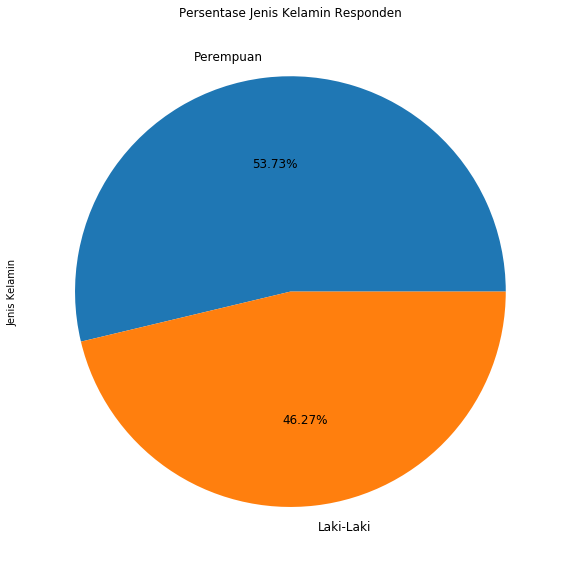

In [106]:
dp1 = df150["Jenis Kelamin"].value_counts()
ax = dp1.plot(kind = "pie", title = "Persentase Jenis Kelamin Responden", figsize=[8,8], autopct = "%.2f%%", fontsize = 12)
plt.tight_layout()
plt.show()

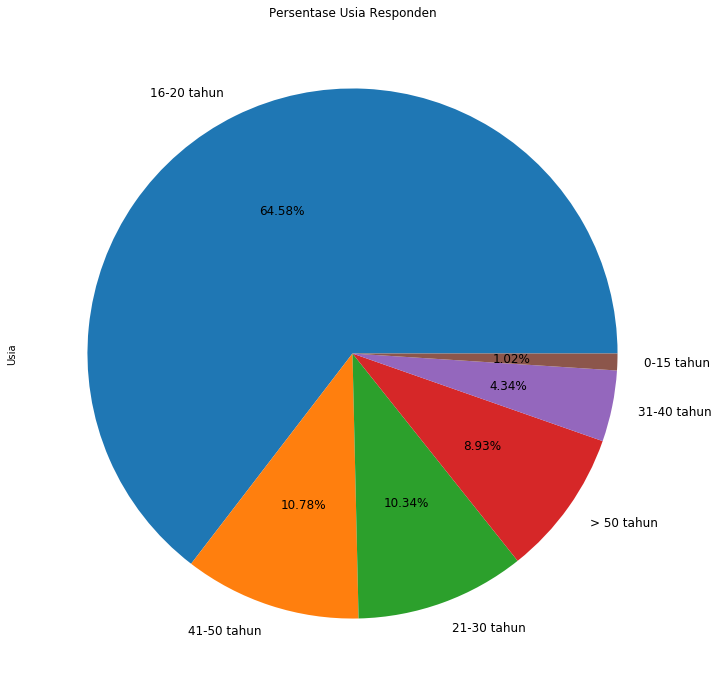

In [107]:
dp2 = df150["Usia"].value_counts()
ax = dp2.plot(kind = "pie", title = "Persentase Usia Responden", figsize=[10,10], autopct = "%.2f%%", fontsize = 12)
plt.tight_layout()
plt.show()

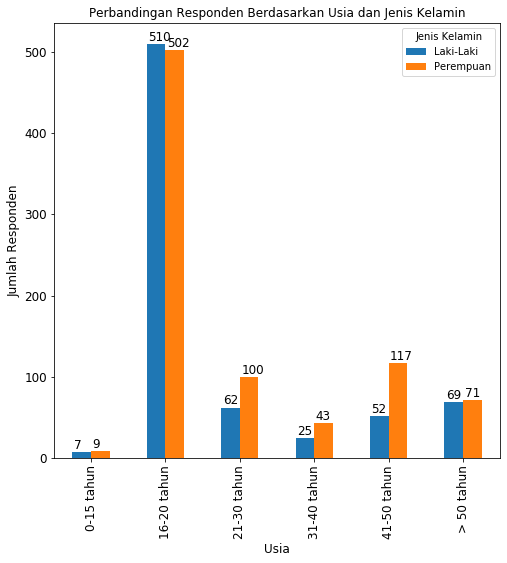

In [108]:
dp1 = df150.groupby(["Usia"])["Jenis Kelamin"].value_counts().unstack()
ax = dp1.plot(kind = "bar", title = "Perbandingan Responden Berdasarkan Usia dan Jenis Kelamin", figsize=[8,8], fontsize = 12)
plt.xlabel("Usia", fontsize = 12)
plt.ylabel("Jumlah Responden", fontsize = 12)
for i in ax.patches:
    ax.text(i.get_x() +.02, i.get_height() + 4, str(round((i.get_height()), 2)), fontsize = 12, color = 'black', rotation = 0)

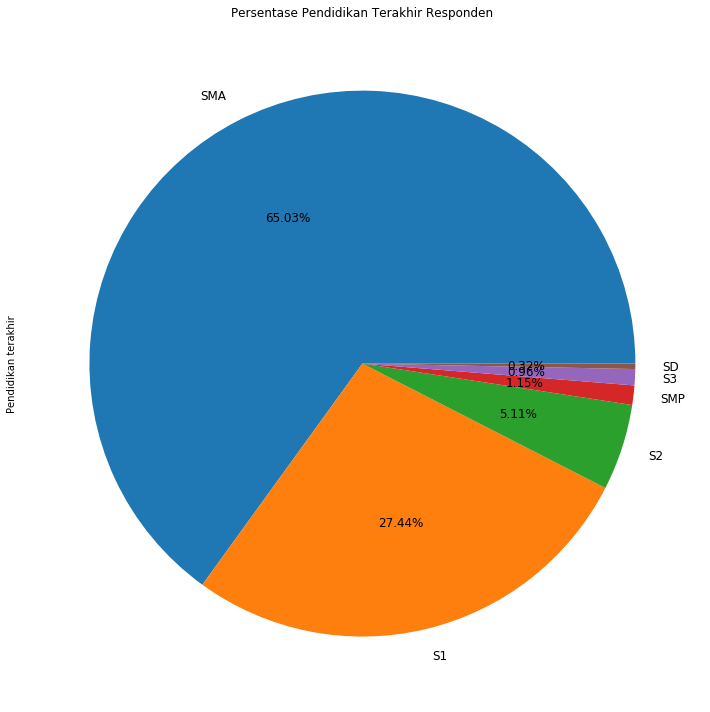

In [109]:
dp2 = df150["Pendidikan terakhir"].value_counts()
ax = dp2.plot(kind = "pie", title = "Persentase Pendidikan Terakhir Responden", figsize=[10,10], autopct = "%.2f%%", fontsize = 12)
plt.tight_layout()
plt.show()

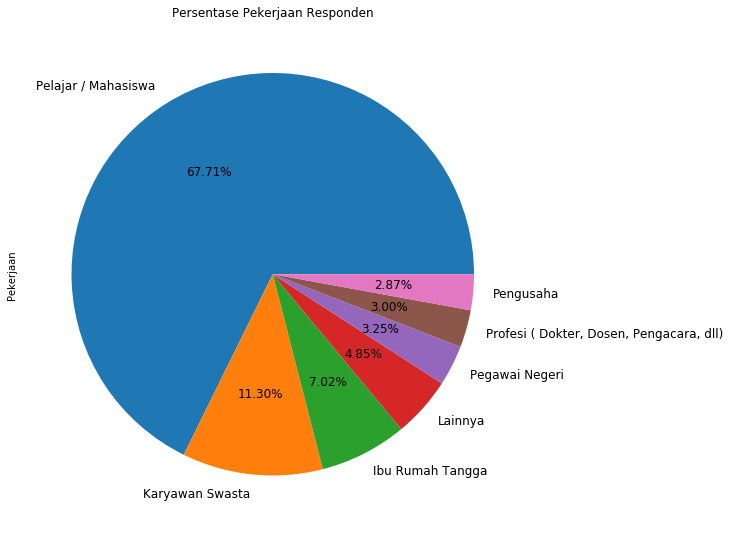

In [110]:
dp3 = df150["Pekerjaan"].value_counts()
ax = dp3.plot(kind = "pie", title = "Persentase Pekerjaan Responden", figsize=[10,10], autopct = "%.2f%%", fontsize = 12)
plt.tight_layout()
plt.show()

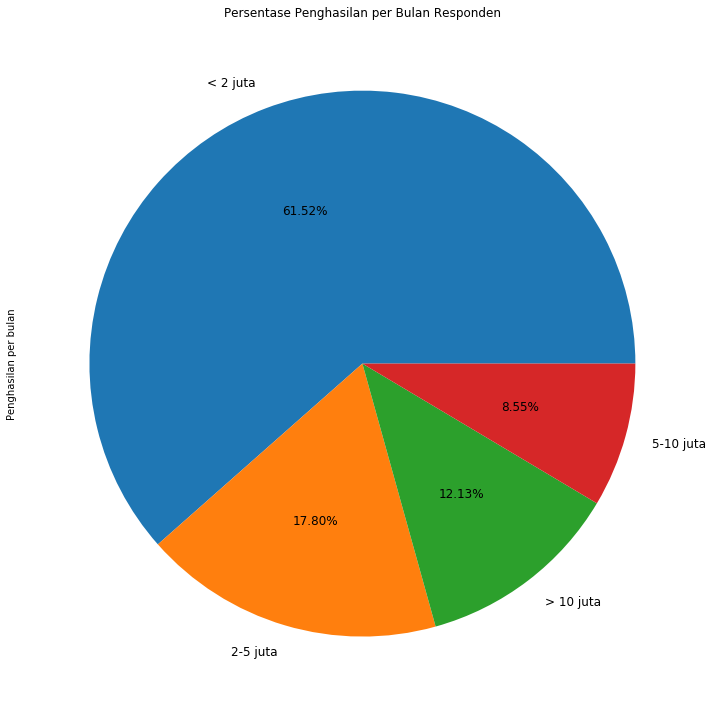

In [111]:
dp4 = df150["Penghasilan per bulan"].value_counts()
ax = dp4.plot(kind = "pie", title = "Persentase Penghasilan per Bulan Responden", figsize=[10,10], autopct = "%.2f%%", fontsize = 12)
plt.tight_layout()
plt.show()

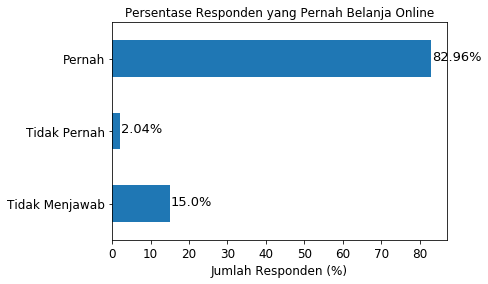

In [112]:
dp5 = df150["Pernah_Belanja_Online"].value_counts()/1567*100
dp5.index = pd.CategoricalIndex(dp5.index, categories = ["Pernah", "Tidak Pernah", "Tidak Menjawab"])
dp5a = dp5.sort_index(ascending = False)
ax = dp5a.plot(kind = "barh", title = "Persentase Responden yang Pernah Belanja Online", fontsize = 12)
plt.xlabel("Jumlah Responden (%)", fontsize = 12)
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.23, str(round((i.get_width()), 2))+'%', fontsize = 13, color ='black')

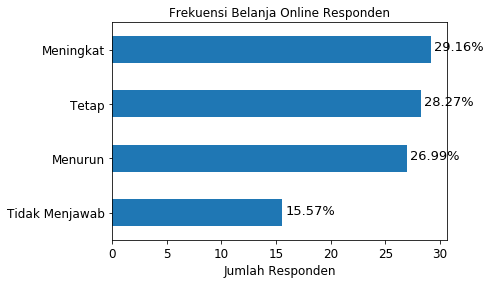

In [113]:
dp8 = df150["Frekuensi_Belanja_Online"].value_counts()/1567*100
dp8.index = pd.CategoricalIndex(dp8.index, categories = ["Meningkat", "Tetap", "Menurun", "Tidak Menjawab"])
dp8a = dp8.sort_index(ascending = False)
ax = dp8a.plot(kind = "barh", title = "Frekuensi Belanja Online Responden", fontsize = 12)
plt.xlabel("Jumlah Responden", fontsize = 12)
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.23, str(round((i.get_width()), 2))+'%', fontsize = 13, color ='black')

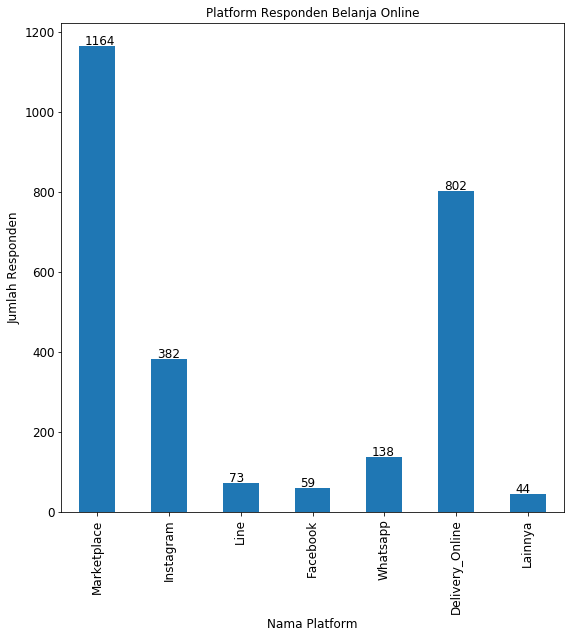

In [114]:
dp9a = df150.Platform_Belanja_Online.str.contains(r'Marketplace')
dp9b = df150.Platform_Belanja_Online.str.contains(r'Instagram')
dp9c = df150.Platform_Belanja_Online.str.contains(r'Line')
dp9d = df150.Platform_Belanja_Online.str.contains(r'Facebook')
dp9e = df150.Platform_Belanja_Online.str.contains(r'Whatsapp')
dp9f = df150.Platform_Belanja_Online.str.contains(r'Delivery_Online')
dp9g = df150.Platform_Belanja_Online.str.contains(r'Lainnya')
dp9h = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(dp9a, dp9b, left_index = True, right_index = True), dp9c, left_index = True, right_index = True), dp9d, left_index = True, right_index = True), dp9e, left_index = True, right_index = True), dp9f, left_index = True, right_index = True), dp9g, left_index = True, right_index = True)
dp9h.columns = ["Marketplace", "Instagram", "Line", "Facebook", "Whatsapp", "Delivery_Online", "Lainnya"]
dp9i = dp9h[["Marketplace", "Instagram", "Line", "Facebook", "Whatsapp", "Delivery_Online", "Lainnya"]].sum().astype(int)

ax = dp9i.plot(kind = "bar", title = "Platform Responden Belanja Online", figsize=[9,9], fontsize = 12)
plt.xlabel("Nama Platform", fontsize = 12)
plt.ylabel("Jumlah Responden", fontsize = 12)
for i in ax.patches:
    ax.text(i.get_x() +.08, i.get_height() + 4, str(round((i.get_height()), 2)), fontsize = 12, color = 'black', rotation = 0)

,Marketplace,Instagram,Line,Facebook,Whatsapp,Delivery_Online,Lainnya
Usia,,,,,,,
0-15 tahun,12,1,1,0,2,6,0
16-20 tahun,779,267,61,18,56,566,17
21-30 tahun,124,47,6,10,15,78,9
31-40 tahun,55,16,2,3,14,37,5
41-50 tahun,108,35,2,18,32,69,7
> 50 tahun,86,16,1,10,19,46,6


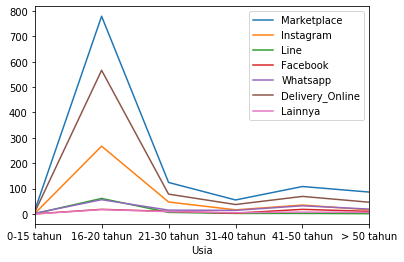

In [115]:
dp10a = df150.Platform_Belanja_Online.str.contains(r'Marketplace') 
dp10b = df150.Platform_Belanja_Online.str.contains(r'Instagram')
dp10c = df150.Platform_Belanja_Online.str.contains(r'Line')
dp10d = df150.Platform_Belanja_Online.str.contains(r'Facebook')
dp10e = df150.Platform_Belanja_Online.str.contains(r'Whatsapp')
dp10f = df150.Platform_Belanja_Online.str.contains(r'Delivery_Online')
dp10g = df150.Platform_Belanja_Online.str.contains(r'Lainnya')
dp10h = df150[['Usia']]
dp10i = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(dp10h, dp10a, left_index = True, right_index = True), dp10b, left_index = True, right_index = True), dp10c, left_index = True, right_index = True), dp10d, left_index = True, right_index = True), dp10e, left_index = True, right_index = True), dp10f, left_index = True, right_index = True), dp10g, left_index = True, right_index = True)
dp10i.columns = ["Usia", "Marketplace", "Instagram", "Line", "Facebook", "Whatsapp", "Delivery_Online", "Lainnya"]
dp10j = dp10i.groupby('Usia')[["Marketplace", "Instagram", "Line", "Facebook", "Whatsapp", "Delivery_Online", "Lainnya"]].sum().astype(int)
dp10j.plot(kind="line")

dp10j

2662

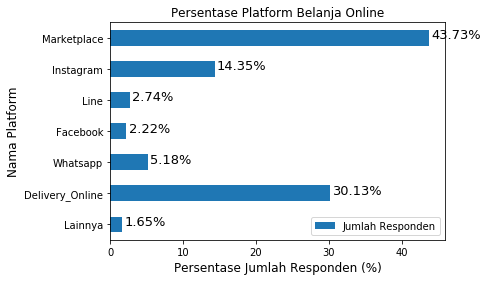

In [116]:
dp11a = (df150.Platform_Belanja_Online.str.contains(r'Marketplace')).sum() 
dp11b = (df150.Platform_Belanja_Online.str.contains(r'Instagram')).sum()
dp11c = (df150.Platform_Belanja_Online.str.contains(r'Line')).sum()
dp11d = (df150.Platform_Belanja_Online.str.contains(r'Facebook')).sum()
dp11e = (df150.Platform_Belanja_Online.str.contains(r'Whatsapp')).sum()
dp11f = (df150.Platform_Belanja_Online.str.contains(r'Delivery_Online')).sum()
dp11g = (df150.Platform_Belanja_Online.str.contains(r'Lainnya')).sum()
dptot = dp11a + dp11b + dp11c + dp11d + dp11e + dp11f + dp11g
dplat = {'Platform Belanja Online':["Marketplace", "Instagram", "Line", "Facebook", "Whatsapp", "Delivery_Online", "Lainnya"], 'Jumlah Responden':[dp11a/dptot*100,dp11b/dptot*100,dp11c/dptot*100,dp11d/dptot*100,dp11e/dptot*100,dp11f/dptot*100,dp11g/dptot*100]} 
dplatf = pd.DataFrame(dplat)
dplatfsort = dplatf.sort_index(ascending = False)
ax = dplatfsort.plot(kind="barh", title = "Persentase Platform Belanja Online", x = "Platform Belanja Online", stacked = True)
plt.ylabel("Nama Platform", fontsize = 12)
plt.xlabel("Persentase Jumlah Responden (%)", fontsize = 12)
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.23, str(round((i.get_width()), 2))+'%', fontsize = 13, color ='black')
dptot

2426

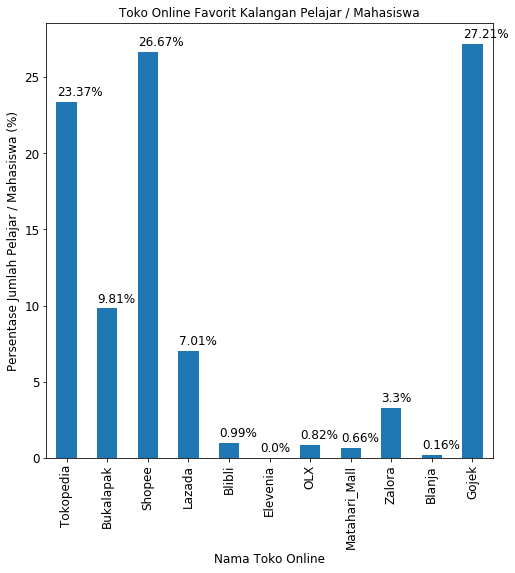

In [117]:
df12l = df150.loc[df150['Pekerjaan'] == 'Pelajar / Mahasiswa']
dp12a = (df12l.Toko_Online_Favorit.str.contains(r'Tokopedia'))
dp12b = (df12l.Toko_Online_Favorit.str.contains(r'Bukalapak'))
dp12c = (df12l.Toko_Online_Favorit.str.contains(r'Shopee'))
dp12d = (df12l.Toko_Online_Favorit.str.contains(r'Lazada'))
dp12e = (df12l.Toko_Online_Favorit.str.contains(r'Blibli'))
dp12f = (df12l.Toko_Online_Favorit.str.contains(r'Elevenia'))
dp12g = (df12l.Toko_Online_Favorit.str.contains(r'OLX'))
dp12h = (df12l.Toko_Online_Favorit.str.contains(r'Matahari_Mall'))
dp12i = (df12l.Toko_Online_Favorit.str.contains(r'Zalora'))
dp12j = (df12l.Toko_Online_Favorit.str.contains(r'Blanja'))
dp12k = (df12l.Toko_Online_Favorit.str.contains(r'Gojek'))
dptot = dp12a.sum() + dp12b.sum() + dp12c.sum() + dp12d.sum() + dp12e.sum() + dp12f.sum() + dp12g.sum() + dp12h.sum() + dp12i.sum() + dp12j.sum() + dp12k.sum()
dp12o = df12l['Pekerjaan']
dp12m = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(dp12o, dp12a, left_index = True, right_index = True), dp12b, left_index = True, right_index = True), dp12c, left_index = True, right_index = True), dp12d, left_index = True, right_index = True), dp12e, left_index = True, right_index = True), dp12f, left_index = True, right_index = True), dp12g, left_index = True, right_index = True), dp12h, left_index = True, right_index = True), dp12i, left_index = True, right_index = True), dp12j, left_index = True, right_index = True), dp12k, left_index = True, right_index = True)
dp12m.columns = ["Pekerjaan", "Tokopedia", "Bukalapak", "Shopee", "Lazada", "Blibli", "Elevenia", "OLX", "Matahari_Mall", "Zalora", "Blanja", "Gojek"]
dp12n = (dp12m[["Tokopedia", "Bukalapak", "Shopee", "Lazada", "Blibli", "Elevenia", "OLX", "Matahari_Mall", "Zalora", "Blanja", "Gojek"]].sum()/dptot*100)

ax = dp12n.plot(kind = "bar", title = "Toko Online Favorit Kalangan Pelajar / Mahasiswa", figsize=[8,8], fontsize = 12)
plt.xlabel("Nama Toko Online", fontsize = 12)
plt.ylabel("Persentase Jumlah Pelajar / Mahasiswa (%)", fontsize = 12)
for i in ax.patches:
    ax.text(i.get_x() +.01, i.get_height() + .4, str(round((i.get_height()), 2))+'%', fontsize = 12, color = 'black', rotation = 0)
dptot

3529

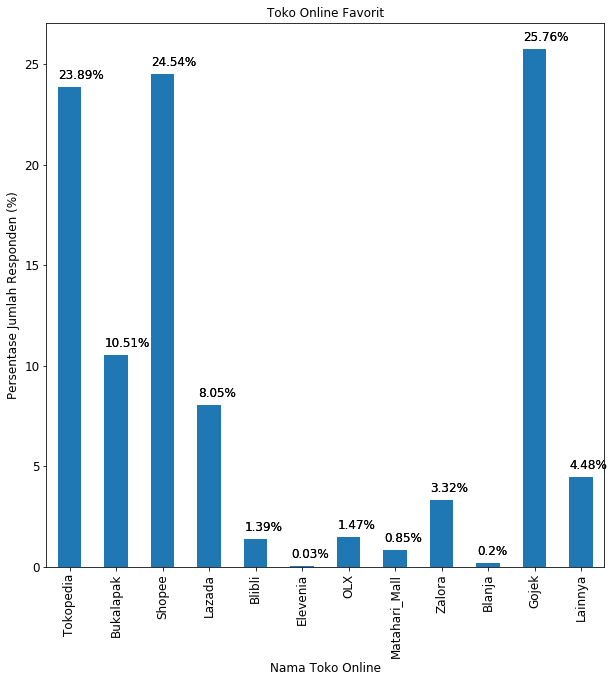

In [118]:
dp13a = df150.Toko_Online_Favorit.str.contains(r'Tokopedia')
dp13b = df150.Toko_Online_Favorit.str.contains(r'Bukalapak')
dp13c = df150.Toko_Online_Favorit.str.contains(r'Shopee')
dp13d = df150.Toko_Online_Favorit.str.contains(r'Lazada')
dp13e = df150.Toko_Online_Favorit.str.contains(r'Blibli')
dp13f = df150.Toko_Online_Favorit.str.contains(r'Elevenia')
dp13g = df150.Toko_Online_Favorit.str.contains(r'OLX')
dp13h = df150.Toko_Online_Favorit.str.contains(r'Matahari_Mall')
dp13i = df150.Toko_Online_Favorit.str.contains(r'Zalora')
dp13j = df150.Toko_Online_Favorit.str.contains(r'Blanja')
dp13k = df150.Toko_Online_Favorit.str.contains(r'Gojek')
dp13o = df150.Toko_Online_Favorit.str.contains(r'Lainnya')
dp13l = df150[['Pekerjaan']]
dptot = dp13a.sum() + dp13b.sum() + dp13c.sum() + dp13d.sum() + dp13e.sum() + dp13f.sum() + dp13g.sum() + dp13h.sum() + dp13i.sum() + dp13j.sum() + dp13k.sum()
dp13m = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(dp13l, dp13a, left_index = True, right_index = True), dp13b, left_index = True, right_index = True), dp13c, left_index = True, right_index = True), dp13d, left_index = True, right_index = True), dp13e, left_index = True, right_index = True), dp13f, left_index = True, right_index = True), dp13g, left_index = True, right_index = True), dp13h, left_index = True, right_index = True), dp13i, left_index = True, right_index = True), dp13j, left_index = True, right_index = True), dp13k, left_index = True, right_index = True), dp13o, left_index = True, right_index = True)
dp13m.columns = ["Pekerjaan", "Tokopedia", "Bukalapak", "Shopee", "Lazada", "Blibli", "Elevenia", "OLX", "Matahari_Mall", "Zalora", "Blanja", "Gojek", "Lainnya"]
dp13n = (dp13m[["Tokopedia", "Bukalapak", "Shopee", "Lazada", "Blibli", "Elevenia", "OLX", "Matahari_Mall", "Zalora", "Blanja", "Gojek", "Lainnya"]].sum()/dptot*100)
dp13n.plot(kind="bar", figsize=[10,10])
ax = dp13n.plot(kind = "bar", title = "Toko Online Favorit", figsize=[10,10], fontsize = 12)
plt.xlabel("Nama Toko Online", fontsize = 12)
plt.ylabel("Persentase Jumlah Responden (%)", fontsize = 12)
for i in ax.patches:
    ax.text(i.get_x() +.01, i.get_height() + .4, str(round((i.get_height()), 2))+'%', fontsize = 12, color = 'black', rotation = 0)
dptot

,Toko Online,Laki-Laki,Laki-Laki (%),Perempuan,Perempuan (%),Total
0,Tokopedia,463,54.922894,380,45.077106,843
1,Bukalapak,252,67.924528,119,32.075472,371
2,Shopee,305,35.219400,561,64.780600,866
3,Lazada,122,42.957746,162,57.042254,284
4,Blibli,33,67.346939,16,32.653061,49
5,Elevenia,0,0.000000,1,100.000000,1
6,OLX,41,78.846154,11,21.153846,52
7,Matahari_Mall,8,26.666667,22,73.333333,30
8,Zalora,35,29.914530,82,70.085470,117
9,Blanja,2,28.571429,5,71.428571,7


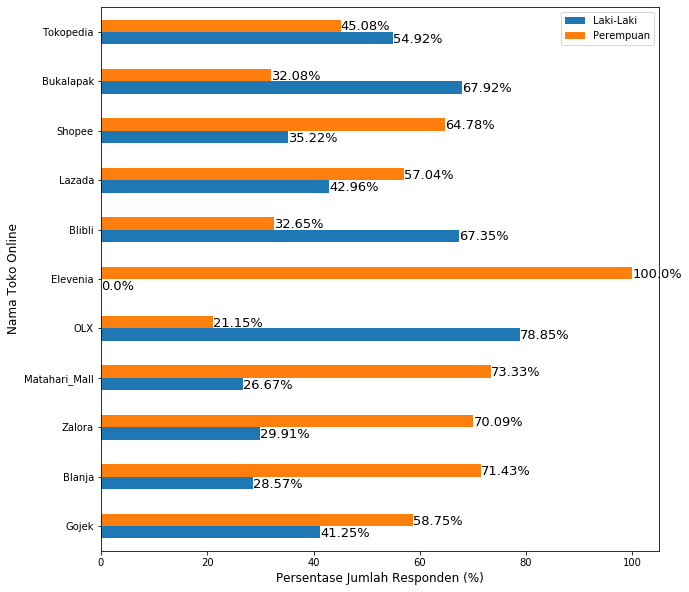

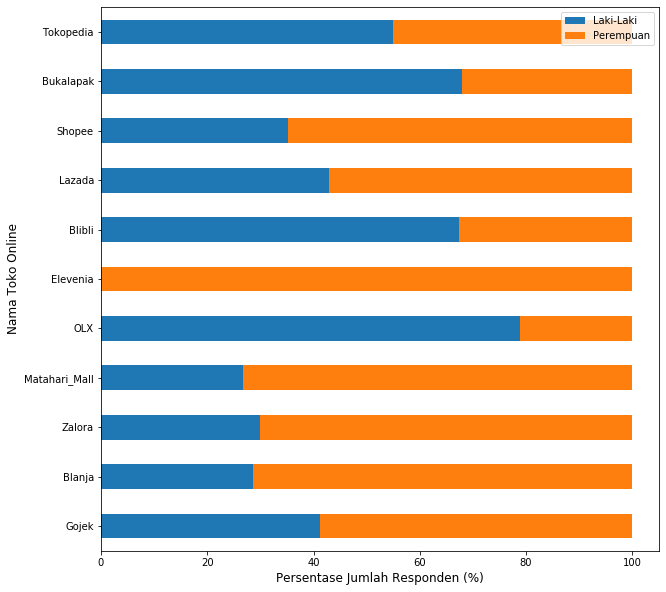

In [119]:
dfwoman = df150.loc[df150["Jenis Kelamin"] == 'Perempuan']
dfman = df150.loc[df150["Jenis Kelamin"] == 'Laki-Laki']
d14a = (dfwoman.Toko_Online_Favorit.str.contains(r'Tokopedia')).sum() 
d14b = (dfwoman.Toko_Online_Favorit.str.contains(r'Bukalapak')).sum()
d14c = (dfwoman.Toko_Online_Favorit.str.contains(r'Shopee')).sum()
d14d = (dfwoman.Toko_Online_Favorit.str.contains(r'Lazada')).sum()
d14e = (dfwoman.Toko_Online_Favorit.str.contains(r'Blibli')).sum()
d14f = (dfwoman.Toko_Online_Favorit.str.contains(r'Elevenia')).sum()
d14g = (dfwoman.Toko_Online_Favorit.str.contains(r'OLX')).sum()
d14h = (dfwoman.Toko_Online_Favorit.str.contains(r'Matahari_Mall')).sum()
d14i = (dfwoman.Toko_Online_Favorit.str.contains(r'Zalora')).sum()
d14j = (dfwoman.Toko_Online_Favorit.str.contains(r'Blanja')).sum()
d14k = (dfwoman.Toko_Online_Favorit.str.contains(r'Gojek')).sum()
d15a = (dfman.Toko_Online_Favorit.str.contains(r'Tokopedia')).sum() 
d15b = (dfman.Toko_Online_Favorit.str.contains(r'Bukalapak')).sum()
d15c = (dfman.Toko_Online_Favorit.str.contains(r'Shopee')).sum()
d15d = (dfman.Toko_Online_Favorit.str.contains(r'Lazada')).sum()
d15e = (dfman.Toko_Online_Favorit.str.contains(r'Blibli')).sum()
d15f = (dfman.Toko_Online_Favorit.str.contains(r'Elevenia')).sum()
d15g = (dfman.Toko_Online_Favorit.str.contains(r'OLX')).sum()
d15h = (dfman.Toko_Online_Favorit.str.contains(r'Matahari_Mall')).sum()
d15i = (dfman.Toko_Online_Favorit.str.contains(r'Zalora')).sum()
d15j = (dfman.Toko_Online_Favorit.str.contains(r'Blanja')).sum()
d15k = (dfman.Toko_Online_Favorit.str.contains(r'Gojek')).sum()
d16a = d14a + d15a
d16b = d14b + d15b
d16c = d14c + d15c
d16d = d14d + d15d
d16e = d14e + d15e
d16f = d14f + d15f
d16g = d14g + d15g
d16h = d14h + d15h
d16i = d14i + d15i
d16j = d14j + d15j
d16k = d14k + d15k

dbolwmx = {'Toko Online':['Tokopedia', 'Bukalapak', "Shopee", "Lazada", "Blibli", "Elevenia", "OLX", "Matahari_Mall", "Zalora", "Blanja", "Gojek"], 'Laki-Laki':[d15a*100/d16a,d15b*100/d16b,d15c*100/d16c,d15d*100/d16d,d15e*100/d16e,d15f*100/d16f,d15g*100/d16g,d15h*100/d16h,d15i*100/d16i,d15j*100/d16j,d15k*100/d16k], 'Perempuan':[d14a*100/d16a,d14b*100/d16b,d14c*100/d16c,d14d*100/d16d,d14e*100/d16e,d14f*100/d16f,d14g*100/d16g,d14h*100/d16h,d14i*100/d16i,d14j*100/d16j,d14k*100/d16k]} 
dbolwm = pd.DataFrame(dbolwmx)
dbolwmsort = dbolwm.sort_index(ascending = False)
dbolwmfull = {'Toko Online':['Tokopedia', 'Bukalapak', "Shopee", "Lazada", "Blibli", "Elevenia", "OLX", "Matahari_Mall", "Zalora", "Blanja", "Gojek"], 'Laki-Laki':[d15a,d15b,d15c,d15d,d15e,d15f,d15g,d15h,d15i,d15j,d15k], 'Laki-Laki (%)':[d15a*100/d16a,d15b*100/d16b,d15c*100/d16c,d15d*100/d16d,d15e*100/d16e,d15f*100/d16f,d15g*100/d16g,d15h*100/d16h,d15i*100/d16i,d15j*100/d16j,d15k*100/d16k], 'Perempuan':[d14a,d14b,d14c,d14d,d14e,d14f,d14g,d14h,d14i,d14j,d14k], 'Perempuan (%)':[d14a*100/d16a,d14b*100/d16b,d14c*100/d16c,d14d*100/d16d,d14e*100/d16e,d14f*100/d16f,d14g*100/d16g,d14h*100/d16h,d14i*100/d16i,d14j*100/d16j,d14k*100/d16k], "Total" : [d16a, d16b, d16c, d16d, d16e, d16f, d16g, d16h, d16i, d16j, d16k]} 
dbolwmf = pd.DataFrame(dbolwmfull)

ax1 = dbolwmsort.plot(kind="barh", x = "Toko Online", stacked = False, figsize = [10,10])
for i in ax1.patches:
    ax1.text(i.get_width(), i.get_y()+.03, str(round((i.get_width()), 2))+'%', fontsize = 13, color ='black')
plt.ylabel("Nama Toko Online", fontsize = 12)
plt.xlabel("Persentase Jumlah Responden (%)", fontsize = 12)

ax2 = dbolwmsort.plot(kind="barh", x = "Toko Online", stacked = True, figsize = [10,10])
plt.ylabel("Nama Toko Online", fontsize = 12)
plt.xlabel("Persentase Jumlah Responden (%)", fontsize = 12)

dbolwmf

3064

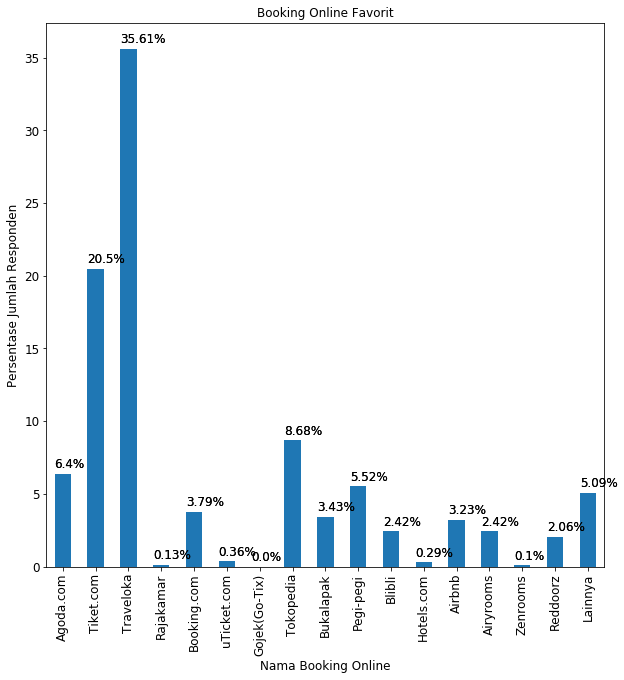

In [120]:
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')
dp15a = df150.Booking_Online_Favorit.str.contains(r'Agoda.com') 
dp15b = df150.Booking_Online_Favorit.str.contains(r'Tiket.com')
dp15c = df150.Booking_Online_Favorit.str.contains(r'Traveloka')
dp15d = df150.Booking_Online_Favorit.str.contains(r'Rajakamar')
dp15e = df150.Booking_Online_Favorit.str.contains(r'Booking.com')
dp15f = df150.Booking_Online_Favorit.str.contains(r'uTicket.com')
dp15g = df150.Booking_Online_Favorit.str.contains(r'Gojek(Go-Tix)')
dp15h = df150.Booking_Online_Favorit.str.contains(r'Tokopedia')
dp15i = df150.Booking_Online_Favorit.str.contains(r'Bukalapak')
dp15j = df150.Booking_Online_Favorit.str.contains(r'Pegi-pegi')
dp15k = df150.Booking_Online_Favorit.str.contains(r'Blibli')
dp15l = df150.Booking_Online_Favorit.str.contains(r'Hotels.com')
dp15m = df150.Booking_Online_Favorit.str.contains(r'Airbnb')
dp15n = df150.Booking_Online_Favorit.str.contains(r'Airyrooms')
dp15o = df150.Booking_Online_Favorit.str.contains(r'Zenrooms')
dp15p = df150.Booking_Online_Favorit.str.contains(r'Reddoorz')
dp15q = df150.Booking_Online_Favorit.str.contains(r'Lainnya')
dp15r = df150[['Pekerjaan']]
dptot = dp15a.sum() + dp15b.sum() +dp15c.sum() +dp15d.sum() +dp15e.sum() +dp15f.sum() +dp15g.sum() +dp15h.sum() +dp15i.sum() +dp15j.sum() +dp15k.sum() +dp15l.sum() +dp15m.sum() +dp15n.sum() +dp15o.sum() +dp15p.sum() +dp15q.sum() 
dp15s = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(dp15r, dp15a, left_index = True, right_index = True), dp15b, left_index = True, right_index = True), dp15c, left_index = True, right_index = True), dp15d, left_index = True, right_index = True), dp15e, left_index = True, right_index = True), dp15f, left_index = True, right_index = True), dp15g, left_index = True, right_index = True), dp15h, left_index = True, right_index = True), dp15i, left_index = True, right_index = True), dp15j, left_index = True, right_index = True), dp15k, left_index = True, right_index = True), dp15l, left_index = True, right_index = True), dp15m, left_index = True, right_index = True), dp15n, left_index = True, right_index = True), dp15o, left_index = True, right_index = True), dp15p, left_index = True, right_index = True), dp15q, left_index = True, right_index = True)
dp15s.columns = ["Pekerjaan", "Agoda.com", "Tiket.com", "Traveloka", "Rajakamar", "Booking.com", "uTicket.com", "Gojek(Go-Tix)", "Tokopedia", "Bukalapak", "Pegi-pegi", "Blibli", "Hotels.com", "Airbnb", "Airyrooms", "Zenrooms", "Reddoorz", "Lainnya"]
dp15t = (dp15s[["Agoda.com", "Tiket.com", "Traveloka", "Rajakamar", "Booking.com", "uTicket.com", "Gojek(Go-Tix)", "Tokopedia", "Bukalapak", "Pegi-pegi", "Blibli", "Hotels.com", "Airbnb", "Airyrooms", "Zenrooms", "Reddoorz", "Lainnya"]].sum()/dptot*100)
dp15t.plot(kind="bar", figsize=[10,10])
ax = dp15t.plot(kind = "bar", title = "Booking Online Favorit", figsize=[10,10], fontsize = 12)
plt.xlabel("Nama Booking Online", fontsize = 12)
plt.ylabel("Persentase Jumlah Responden", fontsize = 12)
for i in ax.patches:
    ax.text(i.get_x() -.0001, i.get_height() + .4, str(round((i.get_height()), 2))+'%', fontsize = 12, color = 'black', rotation = 0)
dptot

,Jenis,Online,Online (%),Offline,Offline (%),Total
0,Fashion & Mode,346,29.371817,832,70.628183,1178
1,Groceries,107,9.083192,1071,90.916808,1178
2,Handphone,191,16.213922,987,83.786078,1178
3,Laptop/Komputer,144,12.224109,1034,87.775891,1178
4,Alat Elektronik,265,22.495756,913,77.504244,1178
5,Kosmetik,441,37.436333,737,62.563667,1178
6,"Buku, Hobi, & Koleksi",626,53.140917,552,46.859083,1178
7,Pulsa,934,79.286927,244,20.713073,1178
8,Makanan & Minuman,488,41.426146,690,58.573854,1178


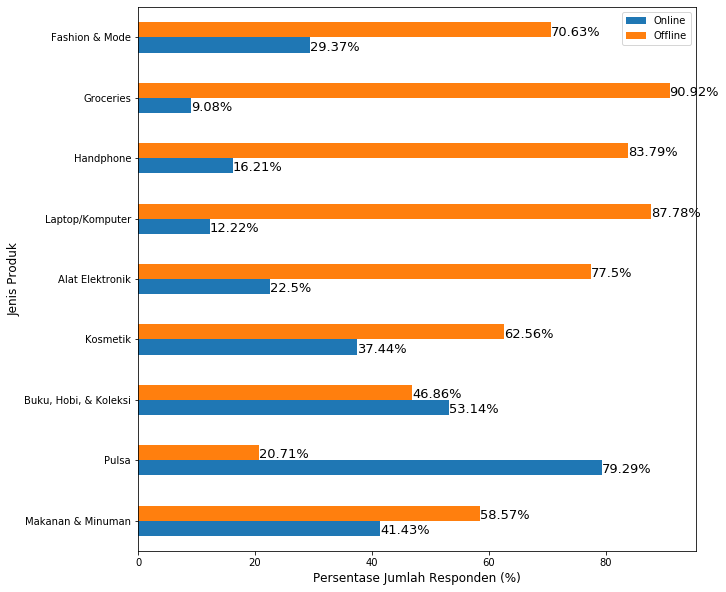

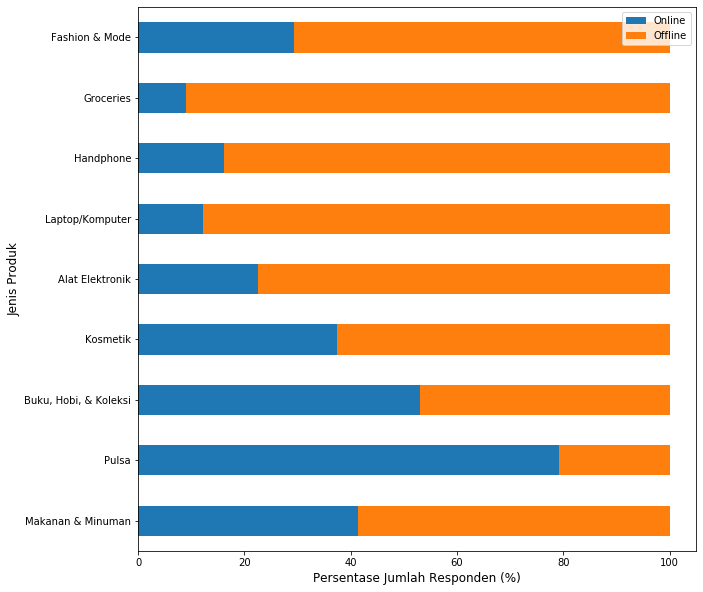

In [121]:
dp16a1 = len(df150.loc[df150["Fashion & Mode - Online / Offline"] == 'Online'])
dp16b1 = len(df150.loc[df150["Fashion & Mode - Online / Offline"] == 'Offline'])
dp16a2 = len(df150.loc[df150["Groceries - Online / Offline"] == 'Online'])
dp16b2 = len(df150.loc[df150["Groceries - Online / Offline"] == 'Offline'])
dp16a3 = len(df150.loc[df150["Handphone - Online / Offline"] == 'Online'])
dp16b3 = len(df150.loc[df150["Handphone - Online / Offline"] == 'Offline'])
dp16a4 = len(df150.loc[df150["Laptop / Komputer - Online / Offline"] == 'Online'])
dp16b4 = len(df150.loc[df150["Laptop / Komputer - Online / Offline"] == 'Offline'])
dp16a5 = len(df150.loc[df150["Alat Elektronik Rumah Tangga - Online / Offline"] == 'Online'])
dp16b5 = len(df150.loc[df150["Alat Elektronik Rumah Tangga - Online / Offline"] == 'Offline'])
dp16a6 = len(df150.loc[df150["Kosmetik - Online / Offline"] == 'Online'])
dp16b6 = len(df150.loc[df150["Kosmetik - Online / Offline"] == 'Offline'])
dp16a7 = len(df150.loc[df150["Buku, Hobi, & Koleksi - Online / Offline"] == 'Online'])
dp16b7 = len(df150.loc[df150["Buku, Hobi, & Koleksi - Online / Offline"] == 'Offline'])
dp16a8 = len(df150.loc[df150["Pulsa (Data & Komunikasi) - Online / Offline"] == 'Online'])
dp16b8 = len(df150.loc[df150["Pulsa (Data & Komunikasi) - Online / Offline"] == 'Offline'])
dp16a9 = len(df150.loc[df150["Makanan & Minuman - Online / Offline"] == 'Online'])
dp16b9 = len(df150.loc[df150["Makanan & Minuman - Online / Offline"] == 'Offline'])

dp161 = dp16a1 + dp16b1
dp162 = dp16a2 + dp16b2
dp163 = dp16a3 + dp16b3
dp164 = dp16a4 + dp16b4
dp165 = dp16a5 + dp16b5
dp166 = dp16a6 + dp16b6
dp167 = dp16a7 + dp16b7
dp168 = dp16a8 + dp16b8
dp169 = dp16a9 + dp16b9

dmet = {'Jenis':['Fashion & Mode', 'Groceries', "Handphone", "Laptop/Komputer", "Alat Elektronik", "Kosmetik", "Buku, Hobi, & Koleksi", "Pulsa", "Makanan & Minuman"], 'Online':[dp16a1*100/dp161,dp16a2*100/dp162,dp16a3*100/dp163,dp16a4*100/dp164,dp16a5*100/dp165,dp16a6*100/dp166,dp16a7*100/dp167,dp16a8*100/dp168,dp16a9*100/dp169], 'Offline':[dp16b1*100/dp161,dp16b2*100/dp162,dp16b3*100/dp163,dp16b4*100/dp164,dp16b5*100/dp165,dp16b6*100/dp166,dp16b7*100/dp167,dp16b8*100/dp168,dp16b9*100/dp169]}
dmetf = pd.DataFrame(dmet)
dmetfsort = dmetf.sort_index(ascending = False)

dmetx = {'Jenis':['Fashion & Mode', 'Groceries', "Handphone", "Laptop/Komputer", "Alat Elektronik", "Kosmetik", "Buku, Hobi, & Koleksi", "Pulsa", "Makanan & Minuman"], 'Online':[dp16a1,dp16a2,dp16a3,dp16a4,dp16a5,dp16a6,dp16a7,dp16a8,dp16a9],'Online (%)':[dp16a1*100/dp161,dp16a2*100/dp162,dp16a3*100/dp163,dp16a4*100/dp164,dp16a5*100/dp165,dp16a6*100/dp166,dp16a7*100/dp167,dp16a8*100/dp168,dp16a9*100/dp169], 'Offline':[dp16b1,dp16b2,dp16b3,dp16b4,dp16b5,dp16b6,dp16b7,dp16b8,dp16b9],'Offline (%)':[dp16b1*100/dp161,dp16b2*100/dp162,dp16b3*100/dp163,dp16b4*100/dp164,dp16b5*100/dp165,dp16b6*100/dp166,dp16b7*100/dp167,dp16b8*100/dp168,dp16b9*100/dp169], 'Total' : [dp161, dp162, dp163, dp164, dp165, dp166, dp167, dp168, dp169]} 
dmetxf = pd.DataFrame(dmetx)

ax1 = dmetfsort.plot(kind="barh", x = "Jenis", stacked = False, figsize = [10,10])
for i in ax1.patches:
    ax1.text(i.get_width(), i.get_y()+.03, str(round((i.get_width()), 2))+'%', fontsize = 13, color ='black')
plt.ylabel("Jenis Produk", fontsize = 12)
plt.xlabel("Persentase Jumlah Responden (%)", fontsize = 12)

ax2 = dmetfsort.plot(kind="barh", x = "Jenis", stacked = True, figsize = [10,10])
plt.ylabel("Jenis Produk", fontsize = 12)
plt.xlabel("Persentase Jumlah Responden (%)", fontsize = 12)

dmetxf

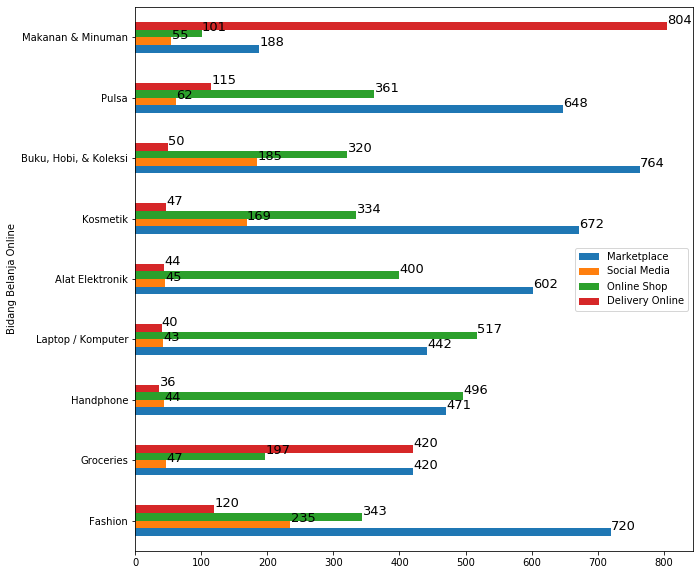

In [122]:
#dfwoman = df150.loc[df150["Jenis Kelamin"] == 'Perempuan']

dp17a1 = (df150.Metode_Online_Fashion.str.contains(r'Marketplace')).sum() 
dp17b1 = (df150.Metode_Online_Fashion.str.contains(r'Social_Media')).sum()
dp17c1 = (df150.Metode_Online_Fashion.str.contains(r'Online_Shop')).sum()
dp17d1 = (df150.Metode_Online_Fashion.str.contains(r'Delivery_Online')).sum()
dp17a2 = (df150.Metode_Online_Groceries.str.contains(r'Marketplace')).sum() 
dp17b2 = (df150.Metode_Online_Groceries.str.contains(r'Social_Media')).sum()
dp17c2 = (df150.Metode_Online_Groceries.str.contains(r'Online_Shop')).sum()
dp17d2 = (df150.Metode_Online_Groceries.str.contains(r'Delivery_Online')).sum()
dp17a3 = (df150.Metode_Online_Handphone.str.contains(r'Marketplace')).sum() 
dp17b3 = (df150.Metode_Online_Handphone.str.contains(r'Social_Media')).sum()
dp17c3 = (df150.Metode_Online_Handphone.str.contains(r'Online_Shop')).sum()
dp17d3 = (df150.Metode_Online_Handphone.str.contains(r'Delivery_Online')).sum()
dp17a4 = (df150.Metode_Online_Laptop_Komputer.str.contains(r'Marketplace')).sum() 
dp17b4 = (df150.Metode_Online_Laptop_Komputer.str.contains(r'Social_Media')).sum()
dp17c4 = (df150.Metode_Online_Laptop_Komputer.str.contains(r'Online_Shop')).sum()
dp17d4 = (df150.Metode_Online_Laptop_Komputer.str.contains(r'Delivery_Online')).sum()
dp17a5 = (df150.Metode_Online_Alat_Elektronik_Rumah_Tangga.str.contains(r'Marketplace')).sum() 
dp17b5 = (df150.Metode_Online_Alat_Elektronik_Rumah_Tangga.str.contains(r'Social_Media')).sum()
dp17c5 = (df150.Metode_Online_Alat_Elektronik_Rumah_Tangga.str.contains(r'Online_Shop')).sum()
dp17d5 = (df150.Metode_Online_Alat_Elektronik_Rumah_Tangga.str.contains(r'Delivery_Online')).sum()
dp17a6 = (df150.Metode_Online_Kosmetik.str.contains(r'Marketplace')).sum() 
dp17b6 = (df150.Metode_Online_Kosmetik.str.contains(r'Social_Media')).sum()
dp17c6 = (df150.Metode_Online_Kosmetik.str.contains(r'Online_Shop')).sum()
dp17d6 = (df150.Metode_Online_Kosmetik.str.contains(r'Delivery_Online')).sum()
dp17a7 = (df150.Metode_Online_Buku_Hobi_Koleksi.str.contains(r'Marketplace')).sum() 
dp17b7 = (df150.Metode_Online_Buku_Hobi_Koleksi.str.contains(r'Social_Media')).sum()
dp17c7 = (df150.Metode_Online_Buku_Hobi_Koleksi.str.contains(r'Online_Shop')).sum()
dp17d7 = (df150.Metode_Online_Buku_Hobi_Koleksi.str.contains(r'Delivery_Online')).sum()
dp17a8 = (df150.Metode_Online_Pulsa_Data_Komunikasi.str.contains(r'Marketplace')).sum() 
dp17b8 = (df150.Metode_Online_Pulsa_Data_Komunikasi.str.contains(r'Social_Media')).sum()
dp17c8 = (df150.Metode_Online_Pulsa_Data_Komunikasi.str.contains(r'Online_Shop')).sum()
dp17d8 = (df150.Metode_Online_Pulsa_Data_Komunikasi.str.contains(r'Delivery_Online')).sum()
dp17a9 = (df150.Metode_Online_Makanan_Minuman.str.contains(r'Marketplace')).sum() 
dp17b9 = (df150.Metode_Online_Makanan_Minuman.str.contains(r'Social_Media')).sum()
dp17c9 = (df150.Metode_Online_Makanan_Minuman.str.contains(r'Online_Shop')).sum()
dp17d9 = (df150.Metode_Online_Makanan_Minuman.str.contains(r'Delivery_Online')).sum()
dbolwm = {'Bidang Belanja Online':['Fashion', 'Groceries', 'Handphone', 'Laptop / Komputer', 'Alat Elektronik', 'Kosmetik', 'Buku, Hobi, & Koleksi', 'Pulsa', 'Makanan & Minuman'], 'Marketplace':[dp17a1,dp17a2,dp17a3,dp17a4,dp17a5,dp17a6,dp17a7,dp17a8,dp17a9], 'Social Media' :[dp17b1,dp17b2,dp17b3,dp17b4,dp17b5,dp17b6,dp17b7,dp17b8,dp17b9], 'Online Shop' : [dp17c1,dp17c2,dp17c3,dp17c4,dp17c5,dp17c6,dp17c7,dp17c8,dp17c9], 'Delivery Online' : [dp17d1,dp17d2,dp17d3,dp17d4,dp17d5,dp17d6,dp17d7,dp17d8,dp17d9]} 
dbolwmf = pd.DataFrame(dbolwm)
ax = dbolwmf.plot(kind="barh", x = "Bidang Belanja Online", figsize = [10,10])
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.1, str(round((i.get_width()), 2)), fontsize = 13, color ='black')

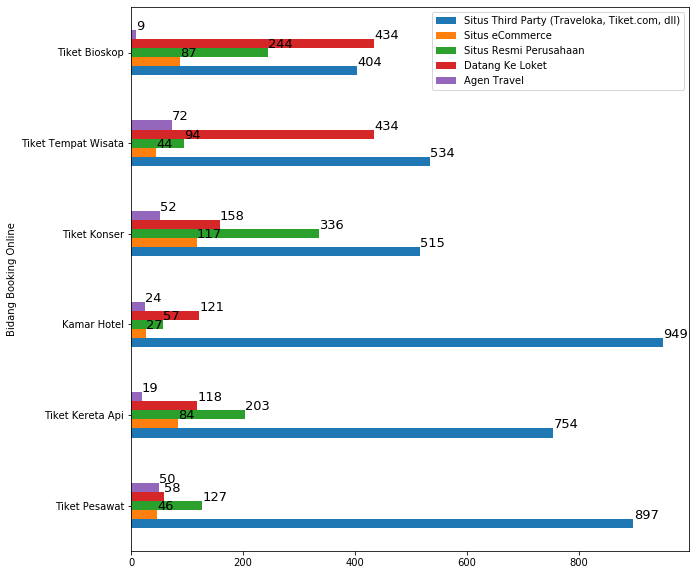

In [123]:
dp18a1 = (df150.Metode_Online_Tiket_Pesawat.str.contains(r'Situs_Third_Party_Traveloka_Tiket_com_dll')).sum() 
dp18b1 = (df150.Metode_Online_Tiket_Pesawat.str.contains(r'Situs_eCommerce')).sum()
dp18c1 = (df150.Metode_Online_Tiket_Pesawat.str.contains(r'Situs_Resmi_Perusahaan')).sum()
dp18d1 = (df150.Metode_Online_Tiket_Pesawat.str.contains(r'Datang_Ke_Loket')).sum()
dp18e1 = (df150.Metode_Online_Tiket_Pesawat.str.contains(r'Agen_Travel')).sum()

dp18a2 = (df150.Metode_Online_Tiket_Kereta.str.contains(r'Situs_Third_Party_Traveloka_Tiket_com_dll')).sum() 
dp18b2 = (df150.Metode_Online_Tiket_Kereta.str.contains(r'Situs_eCommerce')).sum()
dp18c2 = (df150.Metode_Online_Tiket_Kereta.str.contains(r'Situs_Resmi_Perusahaan')).sum()
dp18d2 = (df150.Metode_Online_Tiket_Kereta.str.contains(r'Datang_Ke_Loket')).sum()
dp18e2 = (df150.Metode_Online_Tiket_Kereta.str.contains(r'Agen_Travel')).sum()

dp18a3 = (df150.Metode_Online_Kamar_Hotel.str.contains(r'Situs_Third_Party_Traveloka_Tiket_com_dll')).sum() 
dp18b3 = (df150.Metode_Online_Kamar_Hotel.str.contains(r'Situs_eCommerce')).sum()
dp18c3 = (df150.Metode_Online_Kamar_Hotel.str.contains(r'Situs_Resmi_Perusahaan')).sum()
dp18d3 = (df150.Metode_Online_Kamar_Hotel.str.contains(r'Datang_Ke_Loket')).sum()
dp18e3 = (df150.Metode_Online_Kamar_Hotel.str.contains(r'Agen_Travel')).sum()

dp18a4 = (df150.Metode_Online_Tiket_Konser.str.contains(r'Situs_Third_Party_Traveloka_Tiket_com_dll')).sum() 
dp18b4 = (df150.Metode_Online_Tiket_Konser.str.contains(r'Situs_eCommerce')).sum()
dp18c4 = (df150.Metode_Online_Tiket_Konser.str.contains(r'Situs_Resmi_Perusahaan')).sum()
dp18d4 = (df150.Metode_Online_Tiket_Konser.str.contains(r'Datang_Ke_Loket')).sum()
dp18e4 = (df150.Metode_Online_Tiket_Konser.str.contains(r'Agen_Travel')).sum()

dp18a5 = (df150.Metode_Online_Tiket_Tempat_Wisata.str.contains(r'Situs_Third_Party_Traveloka_Tiket_com_dll')).sum() 
dp18b5 = (df150.Metode_Online_Tiket_Tempat_Wisata.str.contains(r'Situs_eCommerce')).sum()
dp18c5 = (df150.Metode_Online_Tiket_Tempat_Wisata.str.contains(r'Situs_Resmi_Perusahaan')).sum()
dp18d5 = (df150.Metode_Online_Tiket_Tempat_Wisata.str.contains(r'Datang_Ke_Loket')).sum()
dp18e5 = (df150.Metode_Online_Tiket_Tempat_Wisata.str.contains(r'Agen_Travel')).sum()

dp18a6 = (df150.Metode_Online_Tiket_Bioskop.str.contains(r'Situs_Third_Party_Traveloka_Tiket_com_dll')).sum() 
dp18b6 = (df150.Metode_Online_Tiket_Bioskop.str.contains(r'Situs_eCommerce')).sum()
dp18c6 = (df150.Metode_Online_Tiket_Bioskop.str.contains(r'Situs_Resmi_Perusahaan')).sum()
dp18d6 = (df150.Metode_Online_Tiket_Bioskop.str.contains(r'Datang_Ke_Loket')).sum()
dp18e6 = (df150.Metode_Online_Tiket_Bioskop.str.contains(r'Agen_Travel')).sum()

dbolwm = {'Bidang Booking Online':['Tiket Pesawat', 'Tiket Kereta Api', 'Kamar Hotel', 'Tiket Konser', 'Tiket Tempat Wisata', 'Tiket Bioskop'], 'Situs Third Party (Traveloka, Tiket.com, dll)':[dp18a1,dp18a2,dp18a3,dp18a4,dp18a5,dp18a6], 'Situs eCommerce' :[dp18b1,dp18b2,dp18b3,dp18b4,dp18b5,dp18b6], 'Situs Resmi Perusahaan' : [dp18c1,dp18c2,dp18c3,dp18c4,dp18c5,dp18c6], 'Datang Ke Loket' : [dp18d1,dp18d2,dp18d3,dp18d4,dp18d5,dp18d6], 'Agen Travel' : [dp18e1,dp18e2,dp18e3,dp18e4,dp18e5,dp18e6]} 
dbolwmf = pd.DataFrame(dbolwm)
ax = dbolwmf.plot(kind="barh", x = "Bidang Booking Online", figsize = [10,10])
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.1, str(round((i.get_width()), 2)), fontsize = 13, color ='black')

3752

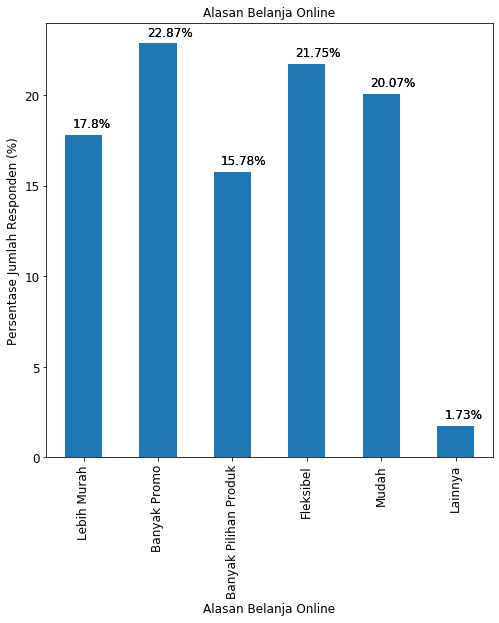

In [124]:
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')
dp19a = df150.Alasan_Belanja_Online.str.contains(r'Lebih_Murah') 
dp19b = df150.Alasan_Belanja_Online.str.contains(r'Banyak_Promo')
dp19c = df150.Alasan_Belanja_Online.str.contains(r'Banyak_Pilihan_Produk')
dp19d = df150.Alasan_Belanja_Online.str.contains(r'Fleksibel')
dp19e = df150.Alasan_Belanja_Online.str.contains(r'Mudah')
dp19f = df150.Alasan_Belanja_Online.str.contains(r'Lainnya')
dptot = dp19a.sum() + dp19b.sum() +dp19c.sum() +dp19d.sum() +dp19e.sum() +dp19f.sum()
dp19g = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(dp19a, dp19b, left_index = True, right_index = True), dp19c, left_index = True, right_index = True), dp19d, left_index = True, right_index = True), dp19e, left_index = True, right_index = True), dp19f, left_index = True, right_index = True)
dp19g.columns = ["Lebih Murah", "Banyak Promo", "Banyak Pilihan Produk", "Fleksibel", "Mudah", "Lainnya"]
dp19t = ((dp19g[["Lebih Murah", "Banyak Promo", "Banyak Pilihan Produk", "Fleksibel", "Mudah", "Lainnya"]].sum()*100)/dptot)
dp19t.plot(kind="bar", figsize=[10,10])
ax = dp19t.plot(kind = "bar", title = "Alasan Belanja Online", figsize=[8,8], fontsize = 12)
plt.xlabel("Alasan Belanja Online", fontsize = 12)
plt.ylabel("Persentase Jumlah Responden (%)", fontsize = 12)

for i in ax.patches:
    ax.text(i.get_x() +.1, i.get_height() + .4, str(round((i.get_height()), 2))+'%', fontsize = 12, color = 'black', rotation = 0)
dptot

3783

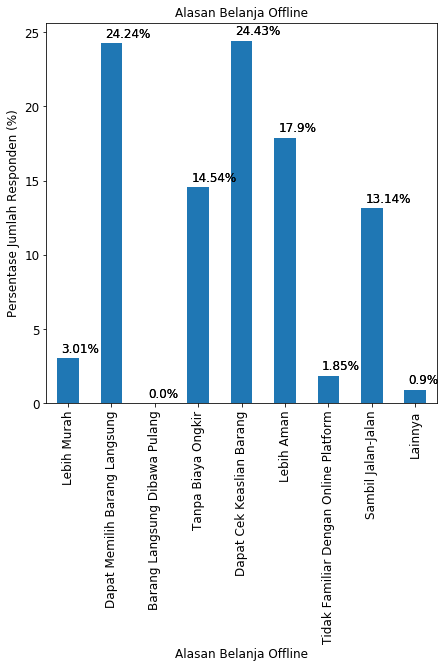

In [125]:
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')
dp20a = df150.Alasan_Belanja_Offline.str.contains(r'Lebih_Murah') 
dp20b = df150.Alasan_Belanja_Offline.str.contains(r'Dapat_Memilih_Barang_Langsung')
dp20c = df150.Alasan_Belanja_Offline.str.contains(r'Barang Langsung Dibawa Pulang')
dp20d = df150.Alasan_Belanja_Offline.str.contains(r'Tanpa_Biaya_Ongkir')
dp20e = df150.Alasan_Belanja_Offline.str.contains(r'Dapat_Cek_Keaslian')
dp20f = df150.Alasan_Belanja_Offline.str.contains(r'Lebih_Aman')
dp20g = df150.Alasan_Belanja_Offline.str.contains(r'Tidak_Familiar_Dengan_Online_Platform')
dp20h = df150.Alasan_Belanja_Offline.str.contains(r'Sambil_Jalan-Jalan')
dp20i = df150.Alasan_Belanja_Offline.str.contains(r'Lainnya')
dptot = dp20a.sum() + dp20b.sum() + dp20c.sum() + dp20d.sum() + dp20e.sum() + dp20f.sum() + dp20g.sum() + dp20h.sum() + dp20i.sum()
dp20j = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(dp20a, dp20b, left_index = True, right_index = True), dp20c, left_index = True, right_index = True), dp20d, left_index = True, right_index = True), dp20e, left_index = True, right_index = True), dp20f, left_index = True, right_index = True), dp20g, left_index = True, right_index = True), dp20h, left_index = True, right_index = True), dp20i, left_index = True, right_index = True)
dp20j.columns = ["Lebih Murah", "Dapat Memilih Barang Langsung", "Barang Langsung Dibawa Pulang", "Tanpa Biaya Ongkir", "Dapat Cek Keaslian Barang", "Lebih Aman", "Tidak Familiar Dengan Online Platform", "Sambil Jalan-Jalan", "Lainnya"]
dp20t = (dp20j[["Lebih Murah", "Dapat Memilih Barang Langsung", "Barang Langsung Dibawa Pulang", "Tanpa Biaya Ongkir", "Dapat Cek Keaslian Barang", "Lebih Aman", "Tidak Familiar Dengan Online Platform", "Sambil Jalan-Jalan", "Lainnya"]].sum()/dptot*100)
dp20t.plot(kind="bar", figsize=[10,10])
ax = dp20t.plot(kind = "bar", title = "Alasan Belanja Offline", figsize=[7,7], fontsize = 12)
plt.xlabel("Alasan Belanja Offline", fontsize = 12)
plt.ylabel("Persentase Jumlah Responden (%)", fontsize = 12)
for i in ax.patches:
    ax.text(i.get_x() +.1, i.get_height() + .4, str(round((i.get_height()), 2)) + '%', fontsize = 12, color = 'black', rotation = 0)
dptot

,Pengeluaran Fashion (Online),Pengeluaran Fashion (Offline)
Tidak Menjawab,29.929802,28.142948
> 3 juta,1.914486,3.637524
1 juta - 3 juta,3.063178,6.955967
500 ribu - 1 juta,7.275048,10.019145
300 ribu - 500 ribu,10.593491,15.315890
100 ribu - 300 ribu,18.570517,20.931717
< 100 ribu,28.653478,14.996809


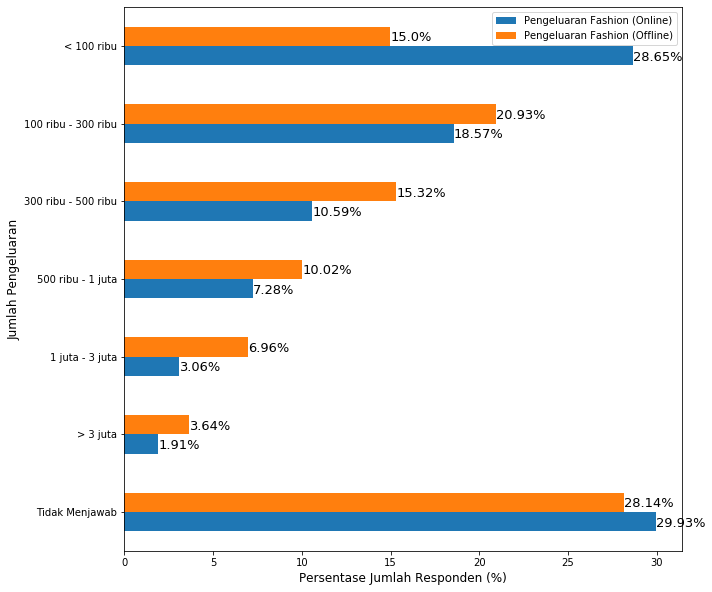

In [126]:
dp21a = df150["Pengeluaran Fashion (Online)"].value_counts()/len(df150)*100
dp21b = df150["Pengeluaran Fashion (Offline)"].value_counts()/len(df150)*100
dp21c = [dp21a, dp21b]
dp21d = pd.concat(dp21c, sort = True, axis = 1)
dp21d.index = pd.CategoricalIndex(dp21d.index, categories = ["< 100 ribu", "100 ribu - 300 ribu", "300 ribu - 500 ribu", "500 ribu - 1 juta", "1 juta - 3 juta", "> 3 juta","Tidak Menjawab"])
dp21e = dp21d.sort_index(ascending = False)
ax = dp21e.plot(kind="barh", figsize = [10,10])
plt.ylabel("Jumlah Pengeluaran", fontsize = 12)
plt.xlabel("Persentase Jumlah Responden (%)", fontsize = 12)
for i in ax.patches:
    ax.text(i.get_width(), i.get_y()+.06, str(round((i.get_width()), 2))+'%', fontsize = 13, color ='black')
dp21e

,Pengeluaran Groceries (Online),Pengeluaran Groceries (Offline)
Tidak Menjawab,36.311423,26.675175
> 3 juta,0.957243,2.488832
1 juta - 3 juta,1.531589,5.807275
500 ribu - 1 juta,2.744097,10.019145
300 ribu - 500 ribu,5.169113,15.571155
100 ribu - 300 ribu,10.529675,27.951500
< 100 ribu,42.756860,11.486918


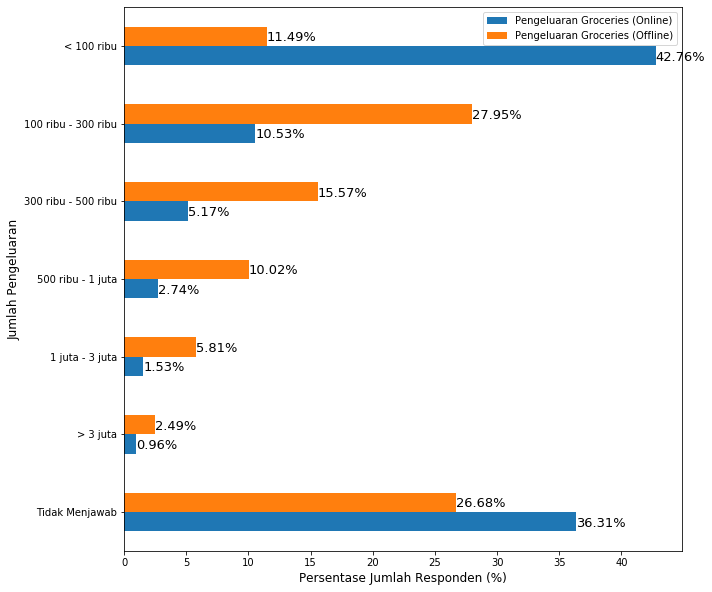

In [127]:
dp22a = df150["Pengeluaran Groceries (Online)"].value_counts()/len(df150)*100
dp22b = df150["Pengeluaran Groceries (Offline)"].value_counts()/len(df150)*100
dp22c = [dp22a, dp22b]
dp22d = pd.concat(dp22c, sort = True, axis = 1)
dp22d.index = pd.CategoricalIndex(dp22d.index, categories = ["< 100 ribu", "100 ribu - 300 ribu", "300 ribu - 500 ribu", "500 ribu - 1 juta", "1 juta - 3 juta", "> 3 juta","Tidak Menjawab"])
dp22e = dp22d.sort_index(ascending = False)
ax = dp22e.plot(kind="barh", figsize = [10,10])
plt.ylabel("Jumlah Pengeluaran", fontsize = 12)
plt.xlabel("Persentase Jumlah Responden (%)", fontsize = 12)
for i in ax.patches:
    ax.text(i.get_width(), i.get_y()+.06, str(round((i.get_width()), 2))+'%', fontsize = 13, color ='black')
dp22e

,Pengeluaran Handphone (Online),Pengeluaran Handphone (Offline)
Tidak Menjawab,43.012125,30.057435
> 13 juta,1.148692,3.765156
9 juta - 13 juta,1.723038,5.360562
5 juta - 9 juta,2.361200,8.232291
3 juta - 5 juta,5.807275,17.932355
1 juta - 3 juta,9.380983,21.123165
< 1 juta,36.566688,13.529036


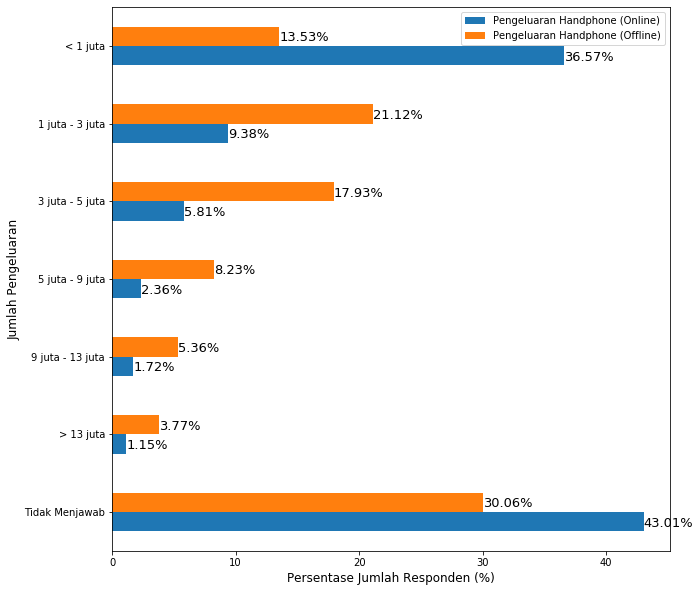

In [128]:
dp23a = df150["Pengeluaran Handphone (Online)"].value_counts()/len(df150)*100
dp23b = df150["Pengeluaran Handphone (Offline)"].value_counts()/len(df150)*100
dp23c = [dp23a, dp23b]
dp23d = pd.concat(dp23c, sort = True, axis = 1)
dp23d.index = pd.CategoricalIndex(dp23d.index, categories = ["< 1 juta", "1 juta - 3 juta", "3 juta - 5 juta", "5 juta - 9 juta", "9 juta - 13 juta", "> 13 juta","Tidak Menjawab"])
dp23e = dp23d.sort_index(ascending = False)
ax = dp23e.plot(kind="barh", figsize = [10,10])
plt.ylabel("Jumlah Pengeluaran", fontsize = 12)
plt.xlabel("Persentase Jumlah Responden (%)", fontsize = 12)
for i in ax.patches:
    ax.text(i.get_width(), i.get_y()+.06, str(round((i.get_width()), 2))+'%', fontsize = 13, color ='black')
dp23e

,Pengeluaran Laptop (Online),Pengeluaran Laptop (Offline)
Tidak Menjawab,46.522017,30.248883
> 10 juta,2.680281,15.315890
"7,5 juta - 10 juta",2.552648,10.912572
"5 juta - 7,5 juta",4.339502,14.550096
"2,5 juta - 5 juta",4.722399,13.720485
"< 2,5 juta",39.183153,15.252074


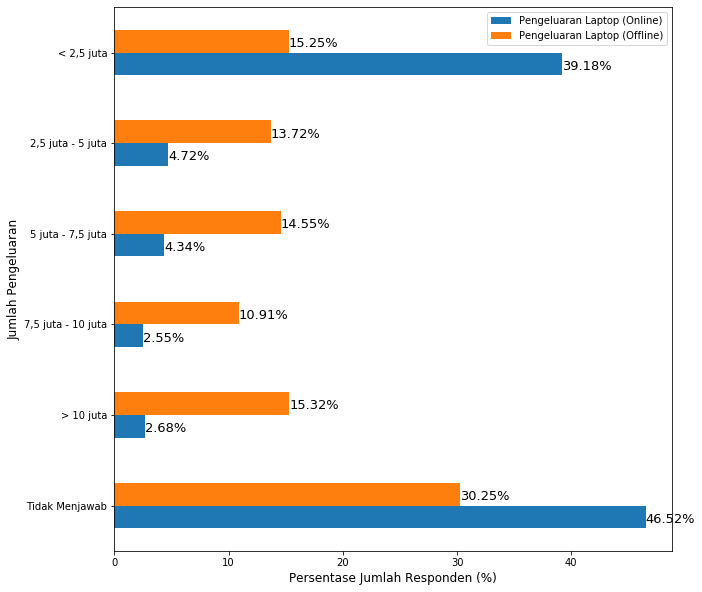

In [129]:
dp24a = df150["Pengeluaran Laptop (Online)"].value_counts()/len(df150)*100
dp24b = df150["Pengeluaran Laptop (Offline)"].value_counts()/len(df150)*100
dp24c = [dp24a, dp24b]
dp24d = pd.concat(dp24c, sort = True, axis = 1)
dp24d.index = pd.CategoricalIndex(dp24d.index, categories = ["< 2,5 juta", "2,5 juta - 5 juta", "5 juta - 7,5 juta", "7,5 juta - 10 juta", "> 10 juta","Tidak Menjawab"])
dp24e = dp24d.sort_index(ascending = False)
ax = dp24e.plot(kind="barh", figsize = [10,10])
plt.ylabel("Jumlah Pengeluaran", fontsize = 12)
plt.xlabel("Persentase Jumlah Responden (%)", fontsize = 12)
for i in ax.patches:
    ax.text(i.get_width(), i.get_y()+.06, str(round((i.get_width()), 2))+'%', fontsize = 13, color ='black')
dp24e

,Pengeluaran Alat Elektronik (Online),Pengeluaran Alat Elektronik (Offline)
Tidak Menjawab,45.500957,33.503510
> 8 juta,1.467773,5.360562
5 juta - 8 juta,2.169751,5.934907
3 juta - 5 juta,2.744097,9.955329
1 juta - 3 juta,5.998724,12.507977
< 1 juta,42.118698,32.737715


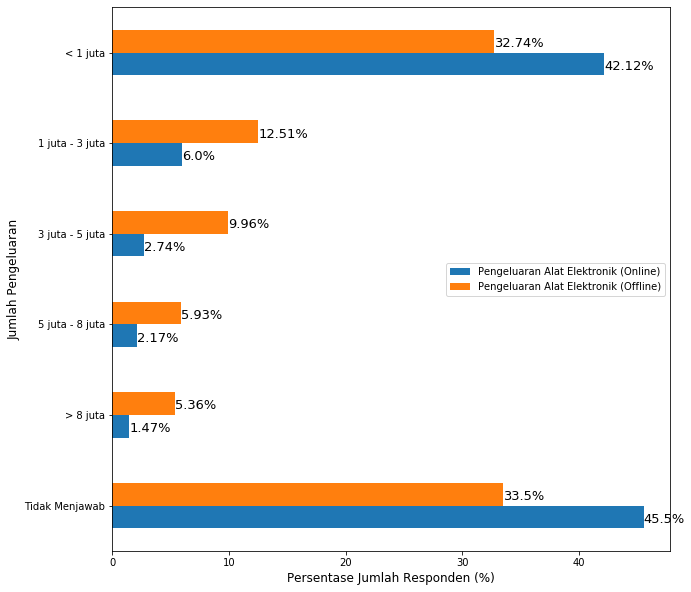

In [130]:
dp25a = df150["Pengeluaran Alat Elektronik (Online)"].value_counts()/len(df150)*100
dp25b = df150["Pengeluaran Alat Elektronik (Offline)"].value_counts()/len(df150)*100
dp25c = [dp25a, dp25b]
dp25d = pd.concat(dp25c, sort = True, axis = 1)
dp25d.index = pd.CategoricalIndex(dp25d.index, categories = ["< 1 juta", "1 juta - 3 juta", "3 juta - 5 juta", "5 juta - 8 juta", "> 8 juta", "Tidak Menjawab"])
dp25e = dp25d.sort_index(ascending = False)
ax = dp25e.plot(kind="barh", figsize = [10,10])
plt.ylabel("Jumlah Pengeluaran", fontsize = 12)
plt.xlabel("Persentase Jumlah Responden (%)", fontsize = 12)
for i in ax.patches:
    ax.text(i.get_width(), i.get_y()+.06, str(round((i.get_width()), 2))+'%', fontsize = 13, color ='black')
dp25e

,Pengeluaran Kosmetik (Online),Pengeluaran Kosmetik (Offline)
Tidak Menjawab,39.566050,30.695597
> 1 juta,1.021059,2.552648
500 ribu - 1 juta,1.850670,2.488832
300 ribu - 500 ribu,4.530951,5.998724
100 ribu - 300 ribu,12.954690,16.847479
50 ribu - 100 ribu,10.274410,18.761966
< 50 ribu,29.802170,22.654754


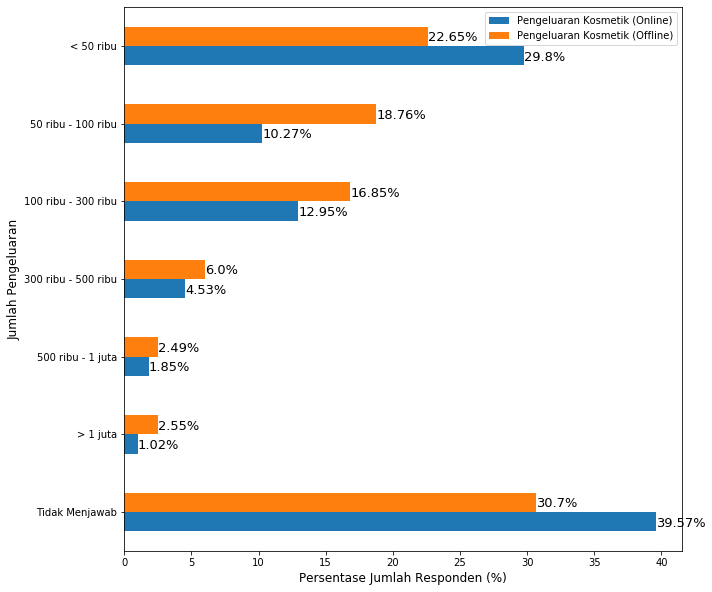

In [131]:
dp26a = df150["Pengeluaran Kosmetik (Online)"].value_counts()/len(df150)*100
dp26b = df150["Pengeluaran Kosmetik (Offline)"].value_counts()/len(df150)*100
dp26c = [dp26a, dp26b]
dp26d = pd.concat(dp26c, sort = True, axis = 1)
dp26d.index = pd.CategoricalIndex(dp26d.index, categories = ["< 50 ribu", "50 ribu - 100 ribu", "100 ribu - 300 ribu", "300 ribu - 500 ribu", "500 ribu - 1 juta", "> 1 juta","Tidak Menjawab"])
dp26e = dp26d.sort_index(ascending = False)
ax = dp26e.plot(kind="barh", figsize = [10,10])
plt.ylabel("Jumlah Pengeluaran", fontsize = 12)
plt.xlabel("Persentase Jumlah Responden (%)", fontsize = 12)
for i in ax.patches:
    ax.text(i.get_width(), i.get_y()+.06, str(round((i.get_width()), 2))+'%', fontsize = 13, color ='black')
dp26e

,"Pengeluaran Buku, Hobi, & Koleksi (Online)","Pengeluaran Buku, Hobi, & Koleksi (Offline)"
Tidak Menjawab,37.460115,33.120613
> 1 juta,2.999362,2.999362
500 ribu - 1 juta,4.084237,3.828973
300 ribu - 500 ribu,6.700702,9.061902
100 ribu - 300 ribu,16.911295,23.165284
< 100 ribu,31.844288,27.823867


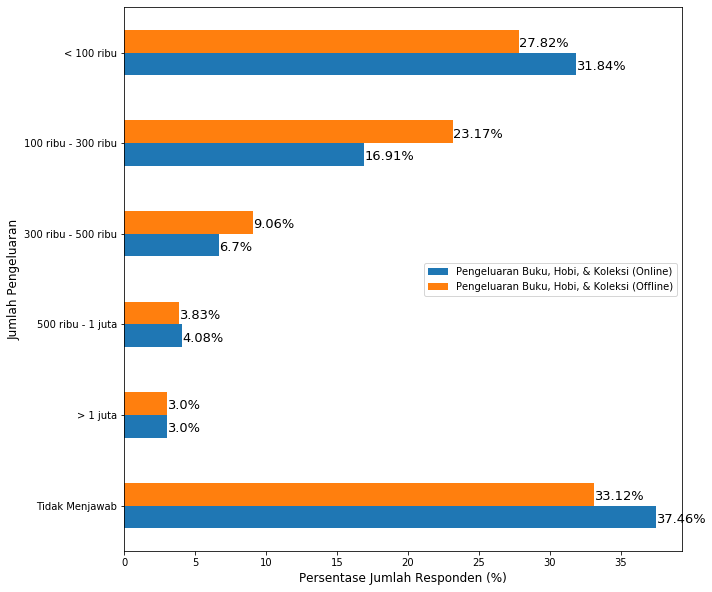

In [132]:
dp27a = df150["Pengeluaran Buku, Hobi, & Koleksi (Online)"].value_counts()/len(df150)*100
dp27b = df150["Pengeluaran Buku, Hobi, & Koleksi (Offline)"].value_counts()/len(df150)*100
dp27c = [dp27a, dp27b]
dp27d = pd.concat(dp27c, sort = True, axis = 1)
dp27d.index = pd.CategoricalIndex(dp27d.index, categories = ["< 100 ribu", "100 ribu - 300 ribu", "300 ribu - 500 ribu", "500 ribu - 1 juta", "> 1 juta","Tidak Menjawab"])
dp27e = dp27d.sort_index(ascending = False)
ax = dp27e.plot(kind="barh", figsize = [10,10])
plt.ylabel("Jumlah Pengeluaran", fontsize = 12)
plt.xlabel("Persentase Jumlah Responden (%)", fontsize = 12)
for i in ax.patches:
    ax.text(i.get_width(), i.get_y()+.06, str(round((i.get_width()), 2))+'%', fontsize = 13, color ='black')
dp27e

,Pengeluaran Pulsa Komunikasi - Data (Online),Pengeluaran Pulsa Komunikasi - Data (Offline)
Tidak Menjawab,32.291002,41.735801
> 500 ribu,2.042119,1.212508
300 ribu - 500 ribu,3.318443,1.084876
100 ribu - 300 ribu,17.804722,5.998724
50 ribu - 100 ribu,30.312699,16.783663
< 50 ribu,14.231015,33.184429


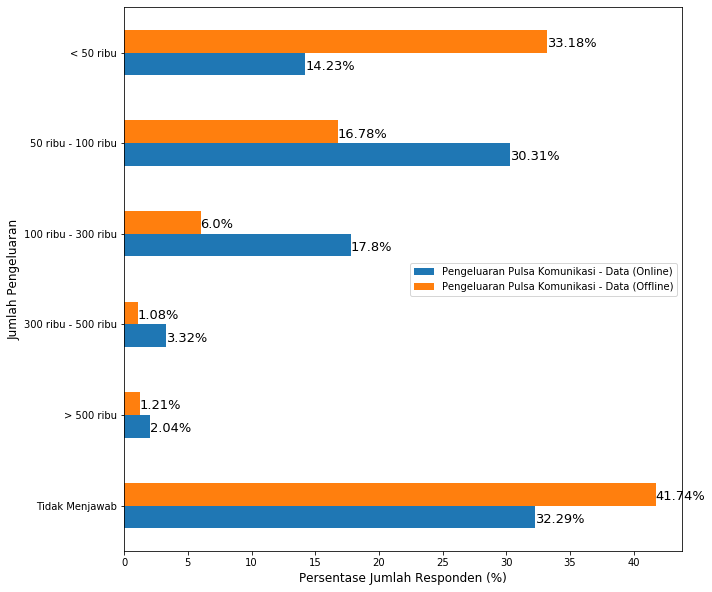

In [133]:
dp28a = df150["Pengeluaran Pulsa Komunikasi - Data (Online)"].value_counts()/len(df150)*100
dp28b = df150["Pengeluaran Pulsa Komunikasi - Data (Offline)"].value_counts()/len(df150)*100
dp28c = [dp28a, dp28b]
dp28d = pd.concat(dp28c, sort = True, axis = 1)
dp28d.index = pd.CategoricalIndex(dp28d.index, categories = ["< 50 ribu", "50 ribu - 100 ribu", "100 ribu - 300 ribu", "300 ribu - 500 ribu", "> 500 ribu","Tidak Menjawab"])
dp28e = dp28d.sort_index(ascending = False)
ax = dp28e.plot(kind="barh", figsize = [10,10])
plt.ylabel("Jumlah Pengeluaran", fontsize = 12)
plt.xlabel("Persentase Jumlah Responden (%)", fontsize = 12)
for i in ax.patches:
    ax.text(i.get_width(), i.get_y()+.06, str(round((i.get_width()), 2))+'%', fontsize = 13, color ='black')
dp28e

,Pengeluaran Pulsa Non Data - Telepon & SMS (Online),Pengeluaran Pulsa Non Data - Telepon & SMS (Offline)
Tidak Menjawab,34.141672,41.799617
> 500 ribu,1.659221,0.765795
300 ribu - 500 ribu,2.105935,1.021059
100 ribu - 300 ribu,8.104659,3.509892
50 ribu - 100 ribu,19.910657,11.486918
< 50 ribu,34.077856,41.416720


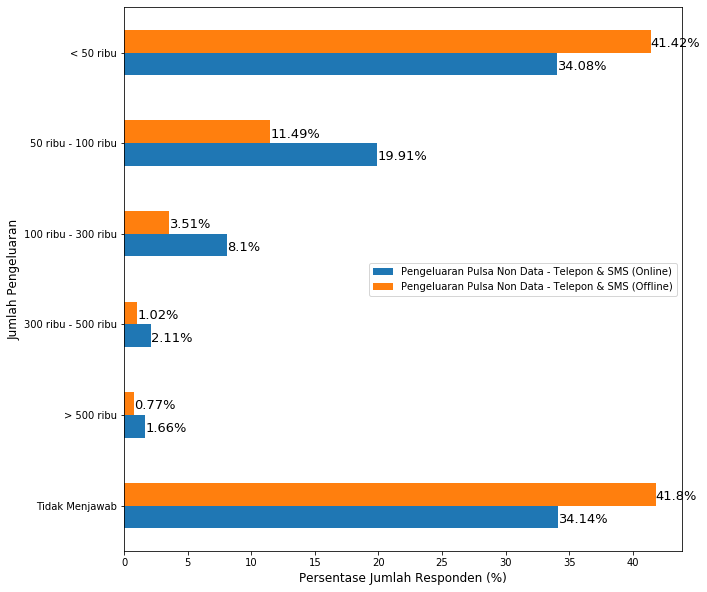

In [134]:
dp29a = df150["Pengeluaran Pulsa Non Data - Telepon & SMS (Online)"].value_counts()/len(df150)*100
dp29b = df150["Pengeluaran Pulsa Non Data - Telepon & SMS (Offline)"].value_counts()/len(df150)*100
dp29c = [dp29a, dp29b]
dp29d = pd.concat(dp29c, sort = True, axis = 1)
dp29d.index = pd.CategoricalIndex(dp29d.index, categories = ["< 50 ribu", "50 ribu - 100 ribu", "100 ribu - 300 ribu", "300 ribu - 500 ribu", "> 500 ribu","Tidak Menjawab"])
dp29e = dp29d.sort_index(ascending = False)
ax = dp29e.plot(kind="barh", figsize = [10,10])
plt.ylabel("Jumlah Pengeluaran", fontsize = 12)
plt.xlabel("Persentase Jumlah Responden (%)", fontsize = 12)
for i in ax.patches:
    ax.text(i.get_width(), i.get_y()+.06, str(round((i.get_width()), 2))+'%', fontsize = 13, color ='black')
dp29e

,Pengeluaran Makanan & Minuman (Online),Pengeluaran Makanan & Minuman (Langsung Di Tempat)
Tidak Menjawab,33.503510,27.440970
> 500 ribu,8.679004,22.208041
300 ribu - 500 ribu,10.402042,14.805361
100 ribu - 300 ribu,19.463944,20.421187
50 ribu - 100 ribu,13.592853,10.338226
< 50 ribu,14.358647,4.786216


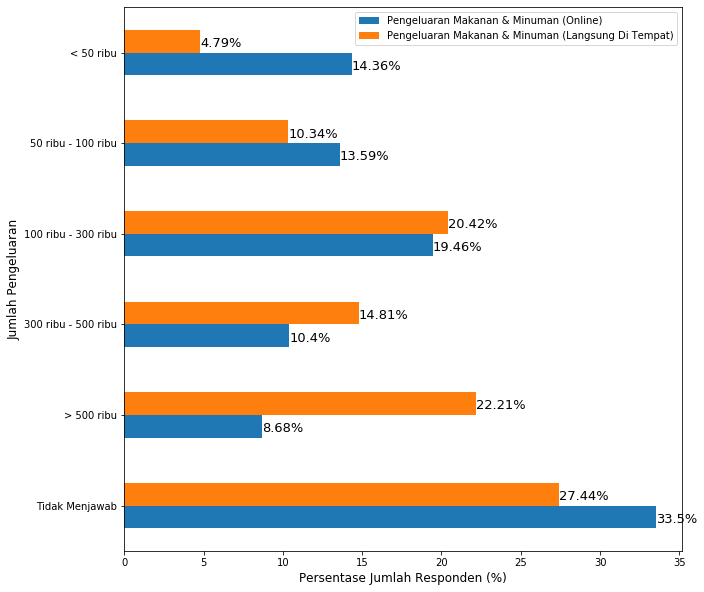

In [135]:
dp30a = df150["Pengeluaran Makanan & Minuman (Online)"].value_counts()/len(df150)*100
dp30b = df150["Pengeluaran Makanan & Minuman (Langsung Di Tempat)"].value_counts()/len(df150)*100
dp30c = [dp30a, dp30b]
dp30d = pd.concat(dp30c, sort = True, axis = 1)
dp30d.index = pd.CategoricalIndex(dp30d.index, categories = ["< 50 ribu", "50 ribu - 100 ribu", "100 ribu - 300 ribu", "300 ribu - 500 ribu", "> 500 ribu","Tidak Menjawab"])
dp30e = dp30d.sort_index(ascending = False)
ax = dp30e.plot(kind="barh", figsize = [10,10])
plt.ylabel("Jumlah Pengeluaran", fontsize = 12)
plt.xlabel("Persentase Jumlah Responden (%)", fontsize = 12)
for i in ax.patches:
    ax.text(i.get_width(), i.get_y()+.06, str(round((i.get_width()), 2))+'%', fontsize = 13, color ='black')
dp30e

,Pengeluaran Tiket Pesawat (Online),Pengeluaran Tiket Pesawat (Offline)
Tidak Menjawab,35.673261,47.160179
> 3 juta,11.933631,3.190810
2 juta - 3 juta,7.019783,1.978302
1 juta - 2 juta,11.295469,3.765156
500 ribu - 1 juta,7.657945,5.041481
< 500 ribu,26.419911,38.864071


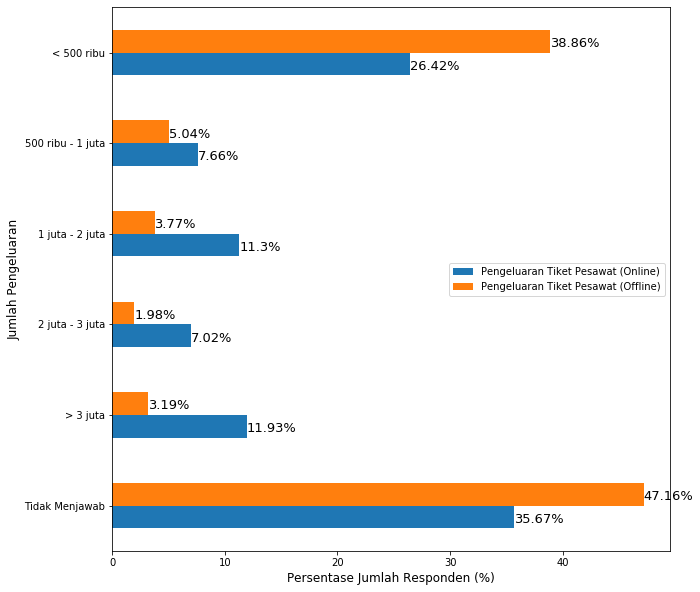

In [136]:
dp31a = df150["Pengeluaran Tiket Pesawat (Online)"].value_counts()/len(df150)*100
dp31b = df150["Pengeluaran Tiket Pesawat (Offline)"].value_counts()/len(df150)*100
dp31c = [dp31a, dp31b]
dp31d = pd.concat(dp31c, sort = True, axis = 1)
dp31d.index = pd.CategoricalIndex(dp31d.index, categories = ["< 500 ribu", "500 ribu - 1 juta", "1 juta - 2 juta", "2 juta - 3 juta", "> 3 juta","Tidak Menjawab"])
dp31e = dp31d.sort_index(ascending = False)
ax = dp31e.plot(kind="barh", figsize = [10,10])
plt.ylabel("Jumlah Pengeluaran", fontsize = 12)
plt.xlabel("Persentase Jumlah Responden (%)", fontsize = 12)
for i in ax.patches:
    ax.text(i.get_width(), i.get_y()+.06, str(round((i.get_width()), 2))+'%', fontsize = 13, color ='black')
dp31e

,Pengeluaran Tiket Kereta Api (Online),Pengeluaran Tiket Kereta Api (Offline)
Tidak Menjawab,35.354180,46.458200
> 3 juta,0.701978,0.319081
2 juta - 3 juta,1.850670,0.638162
1 juta - 2 juta,6.253989,1.531589
500 ribu - 1 juta,14.996809,5.105297
< 500 ribu,40.842374,45.947671


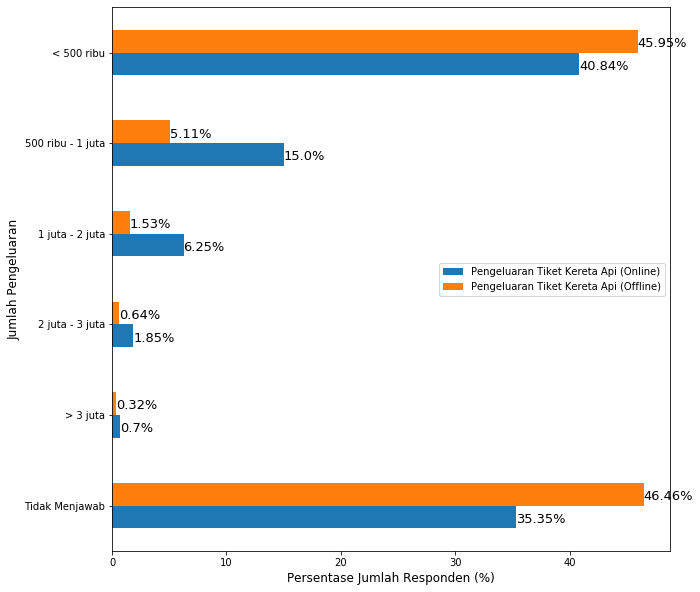

In [137]:
dp32a = df150["Pengeluaran Tiket Kereta Api (Online)"].value_counts()/len(df150)*100
dp32b = df150["Pengeluaran Tiket Kereta Api (Offline)"].value_counts()/len(df150)*100
dp32c = [dp32a, dp32b]
dp32d = pd.concat(dp32c, sort = True, axis = 1)
dp32d.index = pd.CategoricalIndex(dp32d.index, categories = ["< 500 ribu", "500 ribu - 1 juta", "1 juta - 2 juta", "2 juta - 3 juta", "> 3 juta","Tidak Menjawab"])
dp32e = dp32d.sort_index(ascending = False)
ax = dp32e.plot(kind="barh", figsize = [10,10])
plt.ylabel("Jumlah Pengeluaran", fontsize = 12)
plt.xlabel("Persentase Jumlah Responden (%)", fontsize = 12)
for i in ax.patches:
    ax.text(i.get_width(), i.get_y()+.06, str(round((i.get_width()), 2))+'%', fontsize = 13, color ='black')
dp32e

2853

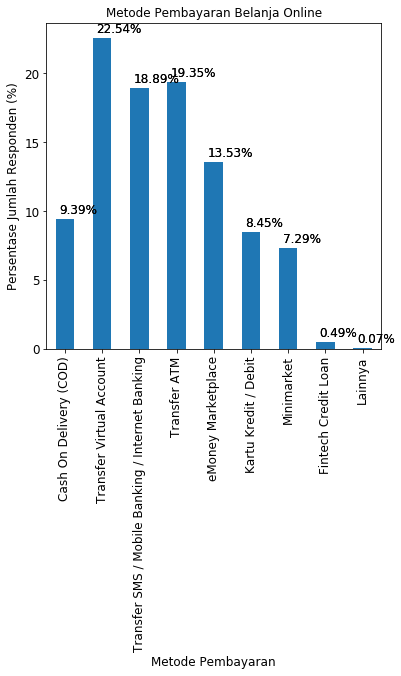

In [138]:
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')
dp33a = df150.Metode_Pembayaran_Belanja_Online.str.contains(r'Cash_On_Delivery_COD') 
dp33b = df150.Metode_Pembayaran_Belanja_Online.str.contains(r'Transfer_Virtual_Account')
dp33c = df150.Metode_Pembayaran_Belanja_Online.str.contains(r'Transfer_SMS_Mobile_Banking_Internet_Banking')
dp33d = df150.Metode_Pembayaran_Belanja_Online.str.contains(r'Transfer_ATM')
dp33e = df150.Metode_Pembayaran_Belanja_Online.str.contains(r'eMoney_Marketplace')
dp33f = df150.Metode_Pembayaran_Belanja_Online.str.contains(r'Kartu_Kredit_Debit')
dp33g = df150.Metode_Pembayaran_Belanja_Online.str.contains(r'Minimarket')
dp33h = df150.Metode_Pembayaran_Belanja_Online.str.contains(r'Fintech_Credit_Loan')
dp33i = df150.Metode_Pembayaran_Belanja_Online.str.contains(r'Lainnya')
dptot = dp33a.sum() + dp33b.sum() +dp33c.sum() +dp33d.sum() +dp33e.sum() +dp33f.sum() +dp33g.sum() +dp33h.sum() +dp33i.sum() 
dp33j = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(dp33a, dp33b, left_index = True, right_index = True), dp33c, left_index = True, right_index = True), dp33d, left_index = True, right_index = True), dp33e, left_index = True, right_index = True), dp33f, left_index = True, right_index = True), dp33g, left_index = True, right_index = True), dp33h, left_index = True, right_index = True), dp33i, left_index = True, right_index = True)
dp33j.columns = ["Cash On Delivery (COD)", "Transfer Virtual Account", "Transfer SMS / Mobile Banking / Internet Banking", "Transfer ATM", "eMoney Marketplace", "Kartu Kredit / Debit", "Minimarket", "Fintech Credit Loan", "Lainnya"]
dp33t = (dp33j[["Cash On Delivery (COD)", "Transfer Virtual Account", "Transfer SMS / Mobile Banking / Internet Banking", "Transfer ATM", "eMoney Marketplace", "Kartu Kredit / Debit", "Minimarket", "Fintech Credit Loan", "Lainnya"]].sum()/dptot*100)
dp33t.plot(kind="bar", figsize=[10,10])
ax = dp33t.plot(kind = "bar", title = "Metode Pembayaran Belanja Online", figsize=[6,6], fontsize = 12)
plt.xlabel("Metode Pembayaran", fontsize = 12)
plt.ylabel("Persentase Jumlah Responden (%)", fontsize = 12)
for i in ax.patches:
    ax.text(i.get_x() +.1, i.get_height() + .4, str(round((i.get_height()), 2))+'%', fontsize = 12, color = 'black', rotation = 0)
dptot

2594

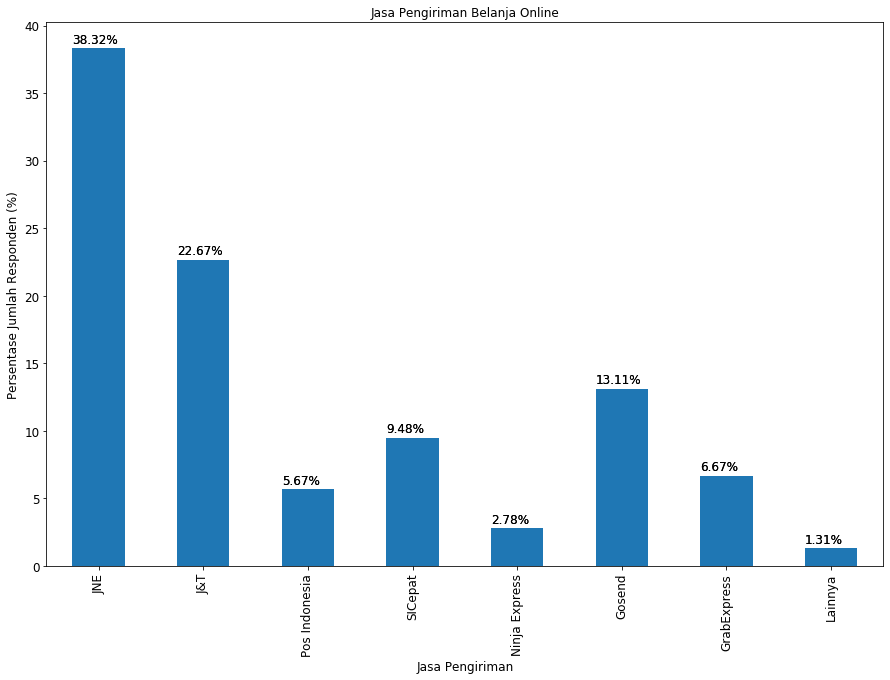

In [139]:
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')
dp34a = df150.Jasa_Pengiriman_Belanja_Online.str.contains(r'JNE') 
dp34b = df150.Jasa_Pengiriman_Belanja_Online.str.contains(r'J_N_T')
dp34c = df150.Jasa_Pengiriman_Belanja_Online.str.contains(r'POS_Indonesia')
dp34d = df150.Jasa_Pengiriman_Belanja_Online.str.contains(r'SICepat')
dp34e = df150.Jasa_Pengiriman_Belanja_Online.str.contains(r'Ninja_Express')
dp34f = df150.Jasa_Pengiriman_Belanja_Online.str.contains(r'Gosend')
dp34g = df150.Jasa_Pengiriman_Belanja_Online.str.contains(r'GrabExpress')
dp34i = df150.Jasa_Pengiriman_Belanja_Online.str.contains(r'Lainnya')
dptot = dp34a.sum() + dp34b.sum() + dp34c.sum() + dp34d.sum() + dp34e.sum() + dp34f.sum() + dp34g.sum() + dp34i.sum()

dp34j = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(dp34a, dp34b, left_index = True, right_index = True), dp34c, left_index = True, right_index = True), dp34d, left_index = True, right_index = True), dp34e, left_index = True, right_index = True), dp34f, left_index = True, right_index = True), dp34g, left_index = True, right_index = True), dp34i, left_index = True, right_index = True)
dp34j.columns = ["JNE", "J&T", "Pos Indonesia", "SICepat", "Ninja Express", "Gosend", "GrabExpress", "Lainnya"]
dp34t = dp34j[["JNE", "J&T", "Pos Indonesia", "SICepat", "Ninja Express", "Gosend", "GrabExpress", "Lainnya"]].sum()/dptot*100
dp34t.plot(kind="bar", figsize=[8,8])
ax = dp34t.plot(kind = "bar", title = "Jasa Pengiriman Belanja Online", figsize=[15,10], fontsize = 12)
plt.xlabel("Jasa Pengiriman", fontsize = 12)
plt.ylabel("Persentase Jumlah Responden (%)", fontsize = 12)
for i in ax.patches:
    ax.text(i.get_x() +.001, i.get_height() + .4, str(round((i.get_height()), 2)) +'%', fontsize = 12, color = 'black', rotation = 0)
dptot

1674

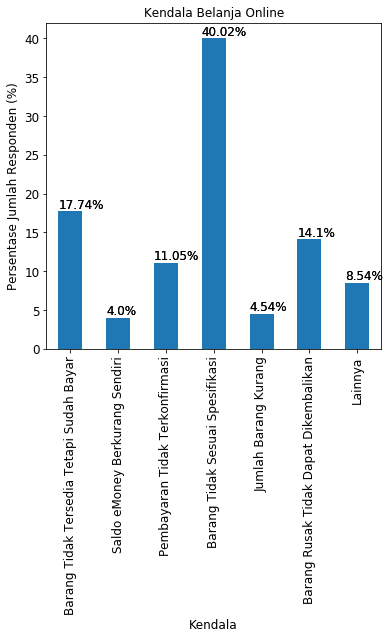

In [140]:
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')
dp35a = df150.Kendala_Belanja_Online.str.contains(r'Barang_Tidak_Tersedia_Tetapi_Sudah_Bayar') 
dp35b = df150.Kendala_Belanja_Online.str.contains(r'Saldo_eMoney_Berkurang_Sendiri')
dp35c = df150.Kendala_Belanja_Online.str.contains(r'Pembayaran_Tidak_Terkonfirmasi')
dp35d = df150.Kendala_Belanja_Online.str.contains(r'Barang_Tidak_Sesuai_Spesifikasi')
dp35e = df150.Kendala_Belanja_Online.str.contains(r'Jumlah_Barang_Kurang')
dp35f = df150.Kendala_Belanja_Online.str.contains(r'Barang_Rusak_Tidak_Dapat_Dikembalikan')
dp35i = df150.Kendala_Belanja_Online.str.contains(r'Lainnya')
dptot = dp35a.sum() + dp35b.sum() +dp35c.sum() +dp35d.sum() +dp35e.sum() +dp35f.sum() +dp35i.sum() 
dp35j = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(dp35a, dp35b, left_index = True, right_index = True), dp35c, left_index = True, right_index = True), dp35d, left_index = True, right_index = True), dp35e, left_index = True, right_index = True), dp35f, left_index = True, right_index = True), dp35i, left_index = True, right_index = True)
dp35j.columns = ["Barang Tidak Tersedia Tetapi Sudah Bayar", "Saldo eMoney Berkurang Sendiri", "Pembayaran Tidak Terkonfirmasi", "Barang Tidak Sesuai Spesifikasi", "Jumlah Barang Kurang", "Barang Rusak Tidak Dapat Dikembalikan", "Lainnya"]
dp35t = dp35j[["Barang Tidak Tersedia Tetapi Sudah Bayar", "Saldo eMoney Berkurang Sendiri", "Pembayaran Tidak Terkonfirmasi", "Barang Tidak Sesuai Spesifikasi", "Jumlah Barang Kurang", "Barang Rusak Tidak Dapat Dikembalikan", "Lainnya"]].sum()/dptot*100
dp35t.plot(kind="bar")
ax = dp35t.plot(kind = "bar", title = "Kendala Belanja Online", figsize=[6,6], fontsize = 12)
plt.xlabel("Kendala", fontsize = 12)
plt.ylabel("Persentase Jumlah Responden (%)", fontsize = 12)
for i in ax.patches:
    ax.text(i.get_x(), i.get_height() + .4, str(round((i.get_height()), 2))+'%', fontsize = 12, color = 'black', rotation = 0)
dptot

1871

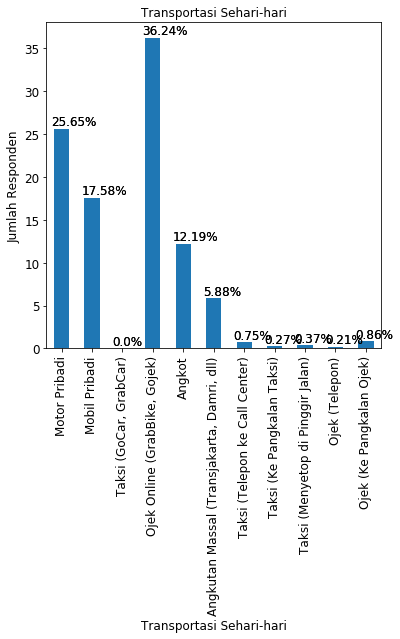

In [141]:
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')
dp36a = df150.Transportasi_Sehari_hari.str.contains(r'Motor_Pribadi') 
dp36b = df150.Transportasi_Sehari_hari.str.contains(r'Mobil_Pribadi')
dp36c = df150.Transportasi_Sehari_hari.str.contains(r'Taksi (GoCar, GrabCar)')
dp36d = df150.Transportasi_Sehari_hari.str.contains(r'Ojek_Online_GrabBike_Gojek')
dp36e = df150.Transportasi_Sehari_hari.str.contains(r'Angkot')
dp36f = df150.Transportasi_Sehari_hari.str.contains(r'Angkutan_Massal_Transjakarta_Damri_dll')
dp36g = df150.Transportasi_Sehari_hari.str.contains(r'Taksi_Telepon_Ke_Call_Center')
dp36h = df150.Transportasi_Sehari_hari.str.contains(r'Taksi_Ke_Pangkalan_Taksi')
dp36i = df150.Transportasi_Sehari_hari.str.contains(r'Taksi_Menyetop_Di_Pinggir_Jalan')
dp36j = df150.Transportasi_Sehari_hari.str.contains(r'Ojek_Telepon')
dp36k = df150.Transportasi_Sehari_hari.str.contains(r'Ojek_Ke_Pangkalan_Ojek')
dptot = dp36a.sum() +dp36b.sum() +dp36c.sum() +dp36d.sum() +dp36e.sum() +dp36f.sum() +dp36g.sum() +dp36h.sum() +dp36i.sum() +dp36j.sum() +dp36k.sum() 
dp36l = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(dp36a, dp36b, left_index = True, right_index = True), dp36c, left_index = True, right_index = True), dp36d, left_index = True, right_index = True), dp36e, left_index = True, right_index = True), dp36f, left_index = True, right_index = True), dp36g, left_index = True, right_index = True), dp36h, left_index = True, right_index = True), dp36i, left_index = True, right_index = True), dp36j, left_index = True, right_index = True), dp36k, left_index = True, right_index = True)
dp36l.columns = ["Motor Pribadi", "Mobil Pribadi", "Taksi (GoCar, GrabCar)", "Ojek Online (GrabBike, Gojek)", "Angkot", "Angkutan Massal (Transjakarta, Damri, dll)", "Taksi (Telepon ke Call Center)", "Taksi (Ke Pangkalan Taksi)", "Taksi (Menyetop di Pinggir Jalan)", "Ojek (Telepon)", "Ojek (Ke Pangkalan Ojek)"]
dp36t = dp36l[["Motor Pribadi", "Mobil Pribadi", "Taksi (GoCar, GrabCar)", "Ojek Online (GrabBike, Gojek)", "Angkot", "Angkutan Massal (Transjakarta, Damri, dll)","Taksi (Telepon ke Call Center)", "Taksi (Ke Pangkalan Taksi)","Taksi (Menyetop di Pinggir Jalan)","Ojek (Telepon)", "Ojek (Ke Pangkalan Ojek)"]].sum()/dptot*100
dp36t.plot(kind="bar")
ax = dp36t.plot(kind = "bar", title = "Transportasi Sehari-hari", figsize=[6,6], fontsize = 12)
plt.xlabel("Transportasi Sehari-hari", fontsize = 12)
plt.ylabel("Jumlah Responden", fontsize = 12)
for i in ax.patches:
    ax.text(i.get_x() -.1, i.get_height() + .4, str(round((i.get_height()), 2))+'%', fontsize = 12, color = 'black', rotation = 0)
dptot

3257

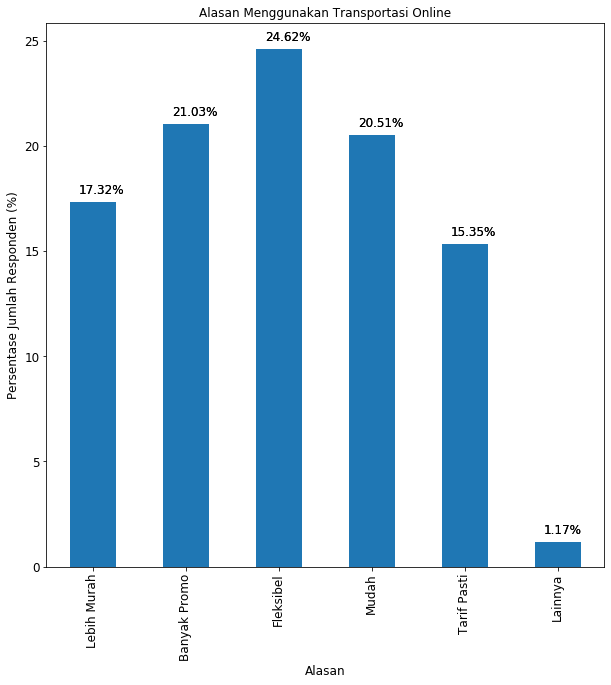

In [142]:
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')
dp37a = df150.Alasan_Menggunakan_Transportasi_Online.str.contains(r'Lebih_Murah') 
dp37b = df150.Alasan_Menggunakan_Transportasi_Online.str.contains(r'Banyak_Promo')
dp37c = df150.Alasan_Menggunakan_Transportasi_Online.str.contains(r'Fleksibel')
dp37d = df150.Alasan_Menggunakan_Transportasi_Online.str.contains(r'Mudah')
dp37e = df150.Alasan_Menggunakan_Transportasi_Online.str.contains(r'Tarif_Pasti')
dp37f = df150.Alasan_Menggunakan_Transportasi_Online.str.contains(r'Lainnya')
dptot = dp37a.sum()+dp37b.sum()+dp37c.sum()+dp37d.sum()+dp37e.sum()+dp37f.sum()
dp37l = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(dp37a, dp37b, left_index = True, right_index = True), dp37c, left_index = True, right_index = True), dp37d, left_index = True, right_index = True), dp37e, left_index = True, right_index = True), dp37f, left_index = True, right_index = True)
dp37l.columns = ["Lebih Murah", "Banyak Promo", "Fleksibel", "Mudah", "Tarif Pasti", "Lainnya"]
dp37t = dp37l[["Lebih Murah", "Banyak Promo", "Fleksibel", "Mudah", "Tarif Pasti", "Lainnya"]].sum()/dptot*100
dp37t.plot(kind="bar", figsize=[10,10])
ax = dp37t.plot(kind = "bar", title = "Alasan Menggunakan Transportasi Online", figsize=[10,10], fontsize = 12)
plt.xlabel("Alasan", fontsize = 12)
plt.ylabel("Persentase Jumlah Responden (%)", fontsize = 12)
for i in ax.patches:
    ax.text(i.get_x() +.1, i.get_height() + .4, str(round((i.get_height()), 2))+'%', fontsize = 12, color = 'black', rotation = 0)
dptot

921

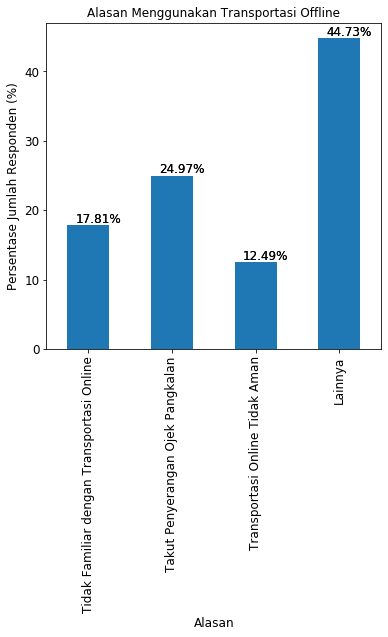

In [143]:
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')
dp38a = df150.Alasan_Menggunakan_Transportasi_Offline.str.contains(r'Tidak_Familiar_Transportasi_Online') 
dp38b = df150.Alasan_Menggunakan_Transportasi_Offline.str.contains(r'Takut_Penyerangan_Ojek_Pangkalan')
dp38c = df150.Alasan_Menggunakan_Transportasi_Offline.str.contains(r'Transportasi_Online_Tidak_Aman')
dp38d = df150.Alasan_Menggunakan_Transportasi_Offline.str.contains(r'Lainnya')
dptot = dp38a.sum()+dp38b.sum()+dp38c.sum()+dp38d.sum()
dp38l = pd.merge(pd.merge(pd.merge(dp38a, dp38b, left_index = True, right_index = True), dp38c, left_index = True, right_index = True), dp38d, left_index = True, right_index = True)
dp38l.columns = ["Tidak Familiar dengan Transportasi Online", "Takut Penyerangan Ojek Pangkalan", "Transportasi Online Tidak Aman","Lainnya"]
dp38t = dp38l[["Tidak Familiar dengan Transportasi Online", "Takut Penyerangan Ojek Pangkalan", "Transportasi Online Tidak Aman","Lainnya"]].sum()/dptot*100
dp38t.plot(kind="bar", figsize=[10,10])
ax = dp38t.plot(kind = "bar", title = "Alasan Menggunakan Transportasi Offline", figsize=[6,6], fontsize = 12)
plt.xlabel("Alasan", fontsize = 12)
plt.ylabel("Persentase Jumlah Responden (%)", fontsize = 12)
for i in ax.patches:
    ax.text(i.get_x() +.1, i.get_height() + .4, str(round((i.get_height()), 2))+'%', fontsize = 12, color = 'black', rotation = 0)
dptot

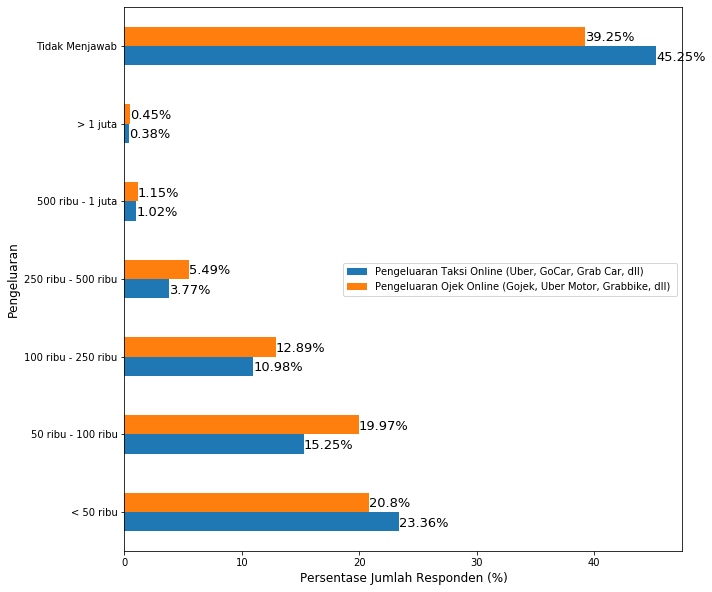

In [144]:
dp39a = df150["Pengeluaran Taksi Online (Uber, GoCar, Grab Car, dll)"].value_counts()/len(df150)*100
dp39b = df150["Pengeluaran Ojek Online (Gojek, Uber Motor, Grabbike, dll) "].value_counts()/len(df150)*100
dp39i = [dp39a, dp39b]
dp39j = pd.concat(dp39i, sort = True, axis = 1)
dp39j.index = pd.CategoricalIndex(dp39j.index, categories = ["< 50 ribu", "50 ribu - 100 ribu", "100 ribu - 250 ribu", "250 ribu - 500 ribu", "500 ribu - 1 juta", "> 1 juta", "Tidak Menjawab"])
dp39k = dp39j.sort_index(ascending = True)
ax = dp39k.plot(kind="barh", figsize = [10,10])
plt.ylabel("Pengeluaran", fontsize = 12)
plt.xlabel("Persentase Jumlah Responden (%)", fontsize = 12)
for i in ax.patches:
    ax.text(i.get_width(), i.get_y()+.06, str(round((i.get_width()), 2))+'%', fontsize = 13, color ='black')

,Frekuensi Penggunaan Taksi / Mobil Online,Frekuensi Penggunaan Ojek Online
Tidak Menjawab,36.502872,31.461391
Tidak Pernah,5.998724,4.722399
Hanya ketika memerlukan / Tidak tentu,32.865348,21.569879
Hanya beberapa kali dalam sebulan,8.040842,6.828334
1-3 kali seminggu,6.381621,6.190172
4-6 kali seminggu,4.467135,12.380345
1-2 hari sekali,5.743459,16.847479


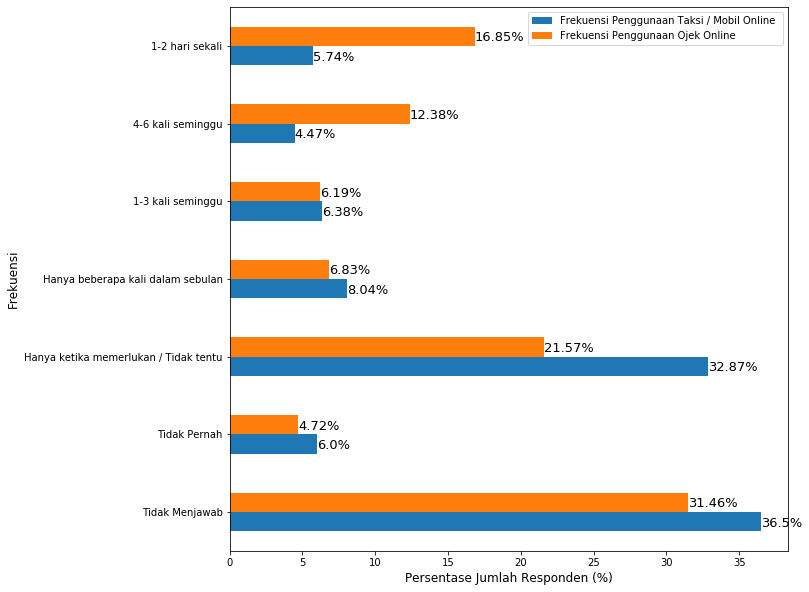

In [145]:
dp40a = df150["Frekuensi Penggunaan Taksi / Mobil Online "].value_counts()/len(df150)*100
dp40b = df150["Frekuensi Penggunaan Ojek Online "].value_counts()/len(df150)*100
dp40i = [dp40a, dp40b]
dp40j = pd.concat(dp40i, sort = True, axis = 1)
dp40j.index = pd.CategoricalIndex(dp40j.index, categories = ['1-2 hari sekali', '4-6 kali seminggu', '1-3 kali seminggu', 'Hanya beberapa kali dalam sebulan', 'Hanya ketika memerlukan / Tidak tentu', 'Tidak Pernah', 'Tidak Menjawab'])
dp40k = dp40j.sort_index(ascending = False)
ax = dp40k.plot(kind="barh", figsize = [10,10])
plt.ylabel("Frekuensi", fontsize = 12)
plt.xlabel("Persentase Jumlah Responden (%)", fontsize = 12)
for i in ax.patches:
    ax.text(i.get_width(), i.get_y()+.06, str(round((i.get_width()), 2))+'%', fontsize = 13, color ='black')
dp40k

2245

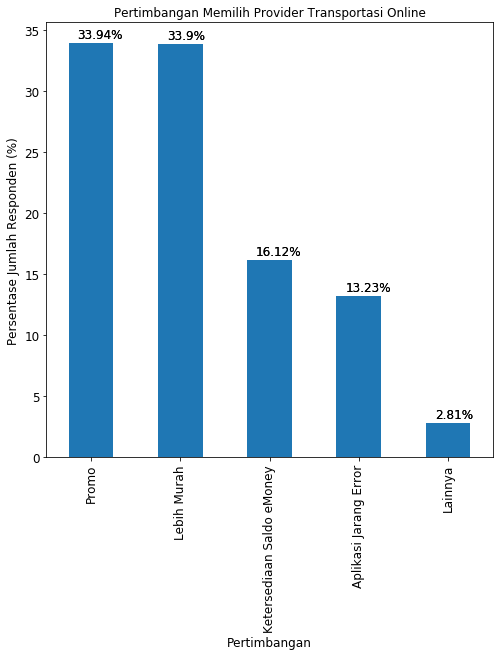

In [146]:
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')
dp41a = df150.Pertimbangan_Memilih_Provider_Transportasi_Online.str.contains(r'Promo') 
dp41b = df150.Pertimbangan_Memilih_Provider_Transportasi_Online.str.contains(r'Lebih_Murah')
dp41c = df150.Pertimbangan_Memilih_Provider_Transportasi_Online.str.contains(r'Ketersediaan_Saldo_eMoney')
dp41d = df150.Pertimbangan_Memilih_Provider_Transportasi_Online.str.contains(r'Aplikasi_Jarang_Error')
dp41e = df150.Pertimbangan_Memilih_Provider_Transportasi_Online.str.contains(r'Lainnya')
dptot = dp41a.sum()+dp41b.sum()+dp41c.sum()+dp41d.sum()+dp41e.sum()
dp41l = pd.merge(pd.merge(pd.merge(pd.merge(dp41a, dp41b, left_index = True, right_index = True), dp41c, left_index = True, right_index = True), dp41d, left_index = True, right_index = True), dp41e, left_index = True, right_index = True)
dp41l.columns = ["Promo", "Lebih Murah", "Ketersediaan Saldo eMoney","Aplikasi Jarang Error","Lainnya"]
dp41t = dp41l[["Promo", "Lebih Murah", "Ketersediaan Saldo eMoney","Aplikasi Jarang Error","Lainnya"]].sum()/dptot*100
dp41t.plot(kind="bar", figsize=[10,10])
ax = dp41t.plot(kind = "bar", title = "Pertimbangan Memilih Provider Transportasi Online", figsize=[8,8], fontsize = 12)
plt.xlabel("Pertimbangan", fontsize = 12)
plt.ylabel("Persentase Jumlah Responden (%)", fontsize = 12)
for i in ax.patches:
    ax.text(i.get_x() +.1, i.get_height() + .4, str(round((i.get_height()), 2))+'%', fontsize = 12, color = 'black', rotation = 0)
dptot

,Preferensi Ojek Online,Preferensi Taksi Online,Preferensi Pengiriman Barang
Tidak Menjawab,30.631780,30.950862,32.418634
Sama Saja,23.101468,25.654116,28.908743
Grab,18.698149,24.186343,9.955329
Gojek,27.568602,19.208679,28.717294


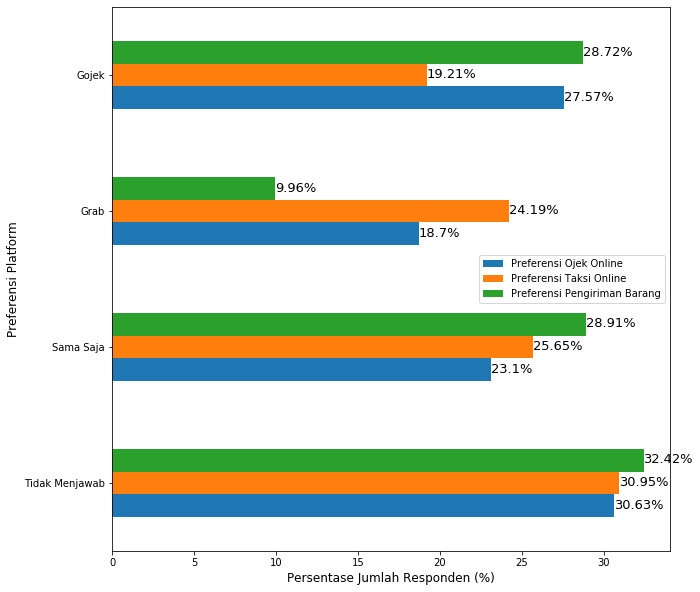

In [147]:
dp42a = df150["Preferensi Ojek Online"].value_counts()/len(df150)*100
dp42b = df150["Preferensi Taksi Online"].value_counts()/len(df150)*100
dp42c = df150["Preferensi Pengiriman Barang"].value_counts()/len(df150)*100
dp42i = [dp42a, dp42b, dp42c]
dp42j = pd.concat(dp42i, sort = True, axis = 1)
dp42j.index = pd.CategoricalIndex(dp42j.index, categories = ['Gojek', 'Grab', 'Sama Saja', 'Tidak Menjawab'])
dp42k = dp42j.sort_index(ascending = False)
ax = dp42k.plot(kind="barh", figsize = [10,10])
plt.ylabel("Preferensi Platform", fontsize = 12)
plt.xlabel("Persentase Jumlah Responden (%)", fontsize = 12)
for i in ax.patches:
    ax.text(i.get_width(), i.get_y()+.06, str(round((i.get_width()), 2))+'%', fontsize = 13, color ='black')
dp42k

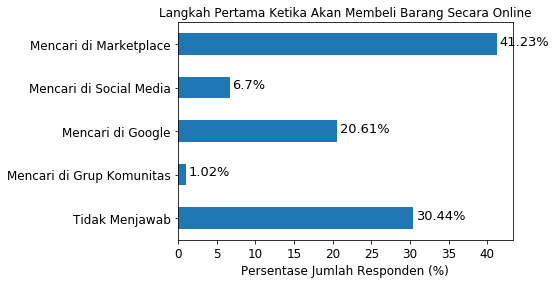

In [148]:
dp43a = df150["Langkah Pertama Ketika Akan Membeli Barang Secara Online"].value_counts()/len(df150)*100
dp43a.index = pd.CategoricalIndex(dp43a.index, categories = ['Mencari di Marketplace', 'Mencari di Social Media', 'Mencari di Google', 'Mencari di Grup Komunitas', 'Tidak Menjawab'])
dp43b = dp43a.sort_index(ascending = False)
ax = dp43b.plot(kind = "barh", title = "Langkah Pertama Ketika Akan Membeli Barang Secara Online", fontsize = 12)
plt.xlabel("Persentase Jumlah Responden (%)", fontsize = 12)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.23, str(round((i.get_width()), 2))+'%', fontsize = 13, color ='black')


1390

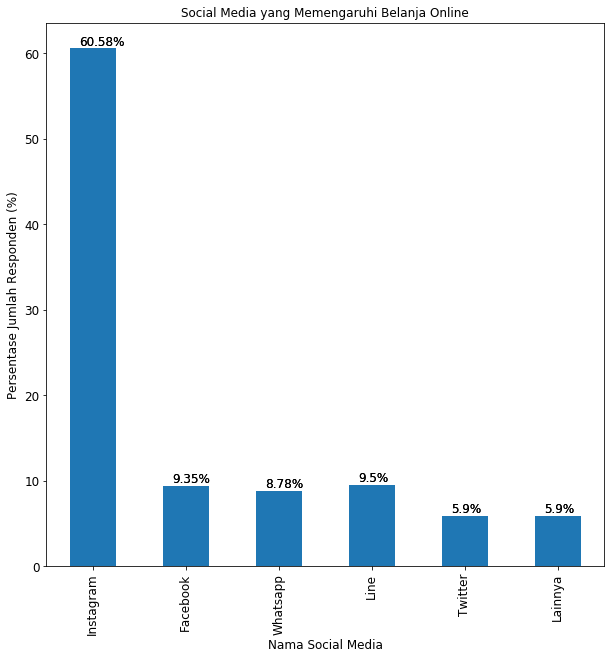

In [149]:
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')
dp44a = df150.Social_Media_Yang_Memengaruhi_Belanja_Online.str.contains(r'Instagram') 
dp44b = df150.Social_Media_Yang_Memengaruhi_Belanja_Online.str.contains(r'Facebook')
dp44c = df150.Social_Media_Yang_Memengaruhi_Belanja_Online.str.contains(r'Whatsapp')
dp44d = df150.Social_Media_Yang_Memengaruhi_Belanja_Online.str.contains(r'Line')
dp44e = df150.Social_Media_Yang_Memengaruhi_Belanja_Online.str.contains(r'Twitter')
dp44f = df150.Social_Media_Yang_Memengaruhi_Belanja_Online.str.contains(r'Lainnya')
dptot = dp44a.sum() +  dp44b.sum() + dp44c.sum() + dp44d.sum() + dp44e.sum() + dp44f.sum()
dp44l = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(dp44a, dp44b, left_index = True, right_index = True), dp44c, left_index = True, right_index = True), dp44d, left_index = True, right_index = True), dp44e, left_index = True, right_index = True), dp44f, left_index = True, right_index = True)
dp44l.columns = ["Instagram", "Facebook", "Whatsapp","Line","Twitter","Lainnya"]
dp44t = dp44l[["Instagram", "Facebook", "Whatsapp","Line","Twitter","Lainnya"]].sum()/dptot*100
dp44t.plot(kind="bar", figsize=[10,10])
ax = dp44t.plot(kind = "bar", title = "Social Media yang Memengaruhi Belanja Online", figsize=[10,10], fontsize = 12)
plt.xlabel("Nama Social Media", fontsize = 12)
plt.ylabel("Persentase Jumlah Responden (%)", fontsize = 12)
for i in ax.patches:
    ax.text(i.get_x() +.1, i.get_height() + .4, str(round((i.get_height()), 2))+'%', fontsize = 12, color = 'black', rotation = 0)
dptot

,Social Media,< 30 tahun,< 30 tahun (%),> 30 tahun,> 30 tahun (%),Total
0,Instagram,616,73.159145,226,26.840855,842
1,Facebook,43,33.076923,87,66.923077,130
2,Whatsapp,41,33.606557,81,66.393443,122
3,Line,118,89.393939,14,10.606061,132
4,Twitter,75,91.463415,7,8.536585,82
5,Lainnya,47,57.317073,35,42.682927,82


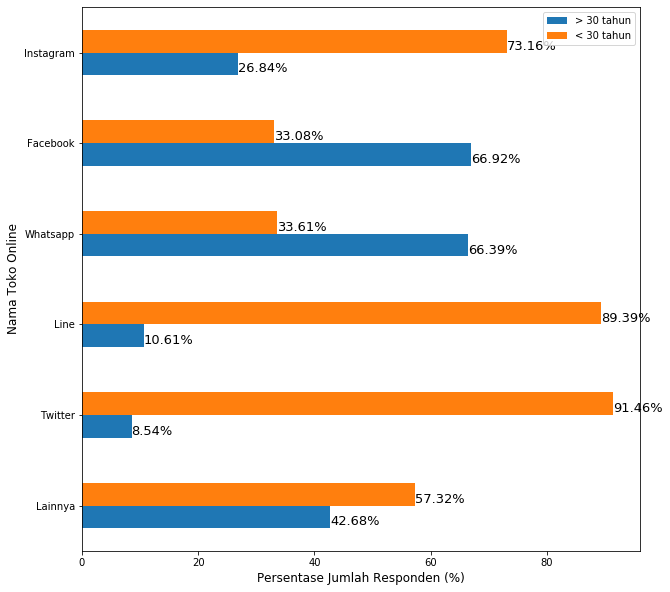

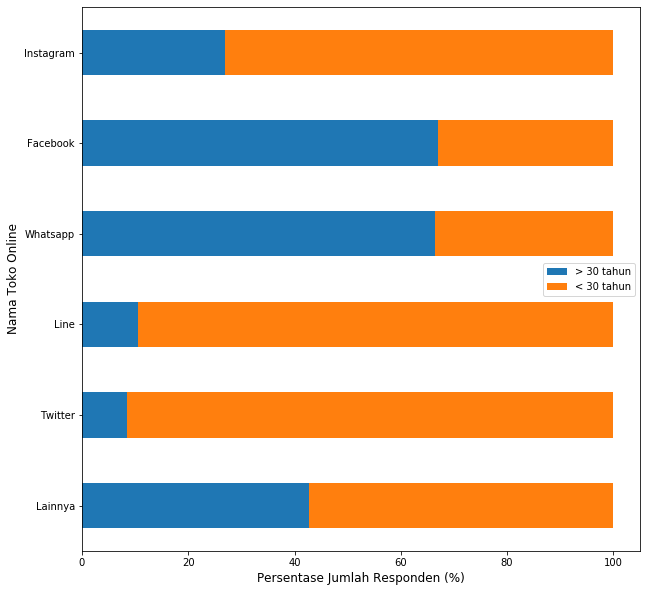

In [150]:
dfu20 = df150.loc[(df150["Usia"] == '0-15 tahun') | (df150["Usia"] == '16-20 tahun')]
dfa20 = df150.loc[(df150["Usia"] != '0-15 tahun') & (df150["Usia"] != '16-20 tahun')]
d14a = (dfu20.Social_Media_Yang_Memengaruhi_Belanja_Online.str.contains(r'Instagram')).sum() 
d14b = (dfu20.Social_Media_Yang_Memengaruhi_Belanja_Online.str.contains(r'Facebook')).sum()
d14c = (dfu20.Social_Media_Yang_Memengaruhi_Belanja_Online.str.contains(r'Whatsapp')).sum()
d14d = (dfu20.Social_Media_Yang_Memengaruhi_Belanja_Online.str.contains(r'Line')).sum()
d14e = (dfu20.Social_Media_Yang_Memengaruhi_Belanja_Online.str.contains(r'Twitter')).sum()
d14f = (dfu20.Social_Media_Yang_Memengaruhi_Belanja_Online.str.contains(r'Lainnya')).sum()
d15a = (dfa20.Social_Media_Yang_Memengaruhi_Belanja_Online.str.contains(r'Instagram')).sum() 
d15b = (dfa20.Social_Media_Yang_Memengaruhi_Belanja_Online.str.contains(r'Facebook')).sum()
d15c = (dfa20.Social_Media_Yang_Memengaruhi_Belanja_Online.str.contains(r'Whatsapp')).sum()
d15d = (dfa20.Social_Media_Yang_Memengaruhi_Belanja_Online.str.contains(r'Line')).sum()
d15e = (dfa20.Social_Media_Yang_Memengaruhi_Belanja_Online.str.contains(r'Twitter')).sum()
d15f = (dfa20.Social_Media_Yang_Memengaruhi_Belanja_Online.str.contains(r'Lainnya')).sum()
d16a = d14a + d15a
d16b = d14b + d15b
d16c = d14c + d15c
d16d = d14d + d15d
d16e = d14e + d15e
d16f = d14f + d15f

dbolwmx = {'Social Media':['Instagram', 'Facebook', "Whatsapp", "Line", "Twitter", "Lainnya"], '> 30 tahun':[d15a*100/d16a,d15b*100/d16b,d15c*100/d16c,d15d*100/d16d,d15e*100/d16e,d15f*100/d16f], '< 30 tahun':[d14a*100/d16a,d14b*100/d16b,d14c*100/d16c,d14d*100/d16d,d14e*100/d16e,d14f*100/d16f]} 
dbolwm = pd.DataFrame(dbolwmx)
dbolwmsort = dbolwm.sort_index(ascending = False)
dbolwmfull = {'Social Media':['Instagram', 'Facebook', "Whatsapp", "Line", "Twitter", "Lainnya"], '< 30 tahun':[d14a,d14b,d14c,d14d,d14e,d14f], '< 30 tahun (%)':[d14a*100/d16a,d14b*100/d16b,d14c*100/d16c,d14d*100/d16d,d14e*100/d16e,d14f*100/d16f], '> 30 tahun':[d15a,d15b,d15c,d15d,d15e,d15f], '> 30 tahun (%)':[d15a*100/d16a,d15b*100/d16b,d15c*100/d16c,d15d*100/d16d,d15e*100/d16e,d15f*100/d16f],  "Total" : [d16a, d16b, d16c, d16d, d16e, d16f]} 
dbolwmf = pd.DataFrame(dbolwmfull)

ax1 = dbolwmsort.plot(kind="barh", x = "Social Media", stacked = False, figsize = [10,10])
for i in ax1.patches:
    ax1.text(i.get_width(), i.get_y()+.03, str(round((i.get_width()), 2))+'%', fontsize = 13, color ='black')
plt.ylabel("Nama Toko Online", fontsize = 12)
plt.xlabel("Persentase Jumlah Responden (%)", fontsize = 12)

ax2 = dbolwmsort.plot(kind="barh", x = "Social Media", stacked = True, figsize = [10,10])
plt.ylabel("Nama Toko Online", fontsize = 12)
plt.xlabel("Persentase Jumlah Responden (%)", fontsize = 12)

dbolwmf

,Social Media,Laki-Laki,Laki-Laki (%),Perempuan,Perempuan(%),Total
0,Instagram,351,41.686461,491,58.313539,842
1,Facebook,81,62.307692,49,37.692308,130
2,Whatsapp,56,45.901639,66,54.098361,122
3,Line,77,58.333333,55,41.666667,132
4,Twitter,22,26.829268,60,73.170732,82
5,Lainnya,49,59.756098,33,40.243902,82


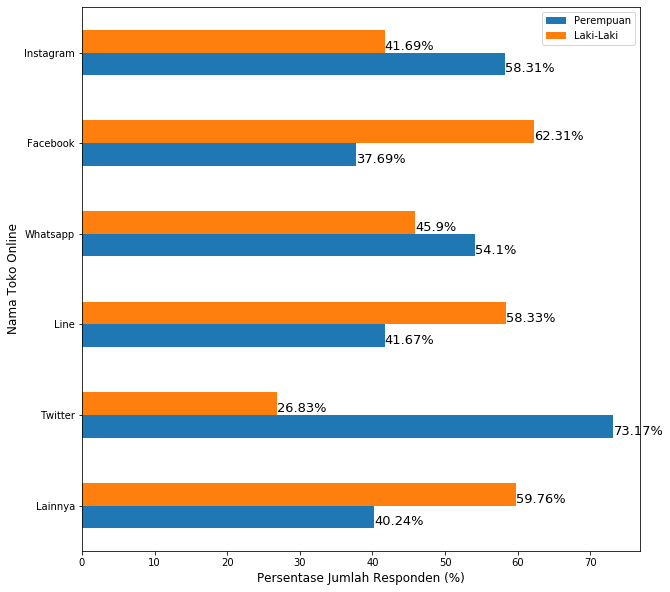

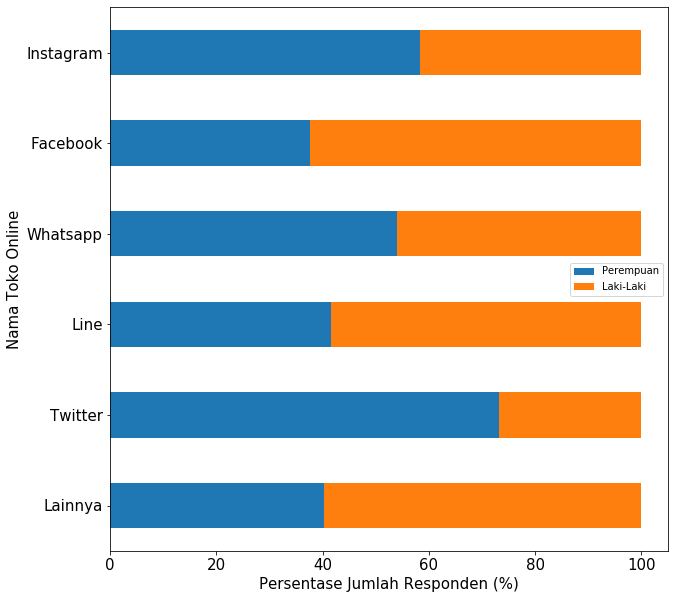

In [203]:
dfu20 = df150.loc[(df150["Jenis Kelamin"] == 'Laki-Laki')]
dfa20 = df150.loc[(df150["Jenis Kelamin"] == 'Perempuan')]
d14a = (dfu20.Social_Media_Yang_Memengaruhi_Belanja_Online.str.contains(r'Instagram')).sum() 
d14b = (dfu20.Social_Media_Yang_Memengaruhi_Belanja_Online.str.contains(r'Facebook')).sum()
d14c = (dfu20.Social_Media_Yang_Memengaruhi_Belanja_Online.str.contains(r'Whatsapp')).sum()
d14d = (dfu20.Social_Media_Yang_Memengaruhi_Belanja_Online.str.contains(r'Line')).sum()
d14e = (dfu20.Social_Media_Yang_Memengaruhi_Belanja_Online.str.contains(r'Twitter')).sum()
d14f = (dfu20.Social_Media_Yang_Memengaruhi_Belanja_Online.str.contains(r'Lainnya')).sum()
d15a = (dfa20.Social_Media_Yang_Memengaruhi_Belanja_Online.str.contains(r'Instagram')).sum() 
d15b = (dfa20.Social_Media_Yang_Memengaruhi_Belanja_Online.str.contains(r'Facebook')).sum()
d15c = (dfa20.Social_Media_Yang_Memengaruhi_Belanja_Online.str.contains(r'Whatsapp')).sum()
d15d = (dfa20.Social_Media_Yang_Memengaruhi_Belanja_Online.str.contains(r'Line')).sum()
d15e = (dfa20.Social_Media_Yang_Memengaruhi_Belanja_Online.str.contains(r'Twitter')).sum()
d15f = (dfa20.Social_Media_Yang_Memengaruhi_Belanja_Online.str.contains(r'Lainnya')).sum()
d16a = d14a + d15a
d16b = d14b + d15b
d16c = d14c + d15c
d16d = d14d + d15d
d16e = d14e + d15e
d16f = d14f + d15f

dbolwmx = {'Social Media':['Instagram', 'Facebook', "Whatsapp", "Line", "Twitter", "Lainnya"], 'Perempuan':[d15a*100/d16a,d15b*100/d16b,d15c*100/d16c,d15d*100/d16d,d15e*100/d16e,d15f*100/d16f], 'Laki-Laki':[d14a*100/d16a,d14b*100/d16b,d14c*100/d16c,d14d*100/d16d,d14e*100/d16e,d14f*100/d16f]} 
dbolwm = pd.DataFrame(dbolwmx)
dbolwmsort = dbolwm.sort_index(ascending = False)
dbolwmfull = {'Social Media':['Instagram', 'Facebook', "Whatsapp", "Line", "Twitter", "Lainnya"], 'Laki-Laki':[d14a,d14b,d14c,d14d,d14e,d14f], 'Laki-Laki (%)':[d14a*100/d16a,d14b*100/d16b,d14c*100/d16c,d14d*100/d16d,d14e*100/d16e,d14f*100/d16f], 'Perempuan':[d15a,d15b,d15c,d15d,d15e,d15f], 'Perempuan(%)':[d15a*100/d16a,d15b*100/d16b,d15c*100/d16c,d15d*100/d16d,d15e*100/d16e,d15f*100/d16f],  "Total" : [d16a, d16b, d16c, d16d, d16e, d16f]} 
dbolwmf = pd.DataFrame(dbolwmfull)

ax1 = dbolwmsort.plot(kind="barh", x = "Social Media", stacked = False, figsize = [10,10])
for i in ax1.patches:
    ax1.text(i.get_width(), i.get_y()+.03, str(round((i.get_width()), 2))+'%', fontsize = 13, color ='black')
plt.ylabel("Nama Toko Online", fontsize = 12)
plt.xlabel("Persentase Jumlah Responden (%)", fontsize = 12)

ax2 = dbolwmsort.plot(kind="barh", x = "Social Media", stacked = True, figsize = [10,10], fontsize = 15)
plt.ylabel("Nama Toko Online", fontsize = 15)
plt.xlabel("Persentase Jumlah Responden (%)", fontsize = 15)

dbolwmf

2081

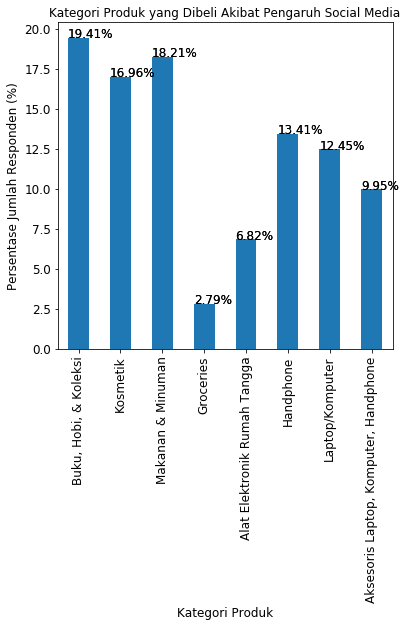

In [152]:
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')
dp45a = df150.Kategori_Produk_Yang_Dibeli_Akibat_Pengaruh_Social_Media.str.contains(r'Buku_Hobi_Koleksi') 
dp45b = df150.Kategori_Produk_Yang_Dibeli_Akibat_Pengaruh_Social_Media.str.contains(r'Kosmetik')
dp45c = df150.Kategori_Produk_Yang_Dibeli_Akibat_Pengaruh_Social_Media.str.contains(r'Makanan_Minuman')
dp45d = df150.Kategori_Produk_Yang_Dibeli_Akibat_Pengaruh_Social_Media.str.contains(r'Groceries')
dp45e = df150.Kategori_Produk_Yang_Dibeli_Akibat_Pengaruh_Social_Media.str.contains(r'Elektronik_Rumah_Tangga')
dp45f = df150.Kategori_Produk_Yang_Dibeli_Akibat_Pengaruh_Social_Media.str.contains(r'Handphone')
dp45g = df150.Kategori_Produk_Yang_Dibeli_Akibat_Pengaruh_Social_Media.str.contains(r'Laptop_Komputer')
dp45h = df150.Kategori_Produk_Yang_Dibeli_Akibat_Pengaruh_Social_Media.str.contains(r'Aksesoris_Laptop_Komputer_Handphone')
dptot = dp45a.sum() + dp45b.sum() +dp45c.sum() +dp45d.sum() +dp45e.sum() +dp45f.sum() +dp45g.sum() +dp45h.sum()
dp45l = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(dp45a, dp45b, left_index = True, right_index = True), dp45c, left_index = True, right_index = True), dp45d, left_index = True, right_index = True), dp45e, left_index = True, right_index = True), dp45f, left_index = True, right_index = True),dp45g, left_index = True, right_index = True),dp45h, left_index = True, right_index = True)
dp45l.columns = ["Buku, Hobi, & Koleksi", "Kosmetik", "Makanan & Minuman","Groceries","Alat Elektronik Rumah Tangga","Handphone", "Laptop/Komputer", "Aksesoris Laptop, Komputer, Handphone"]
dp45t = dp45l[["Buku, Hobi, & Koleksi", "Kosmetik", "Makanan & Minuman","Groceries","Alat Elektronik Rumah Tangga","Handphone", "Laptop/Komputer", "Aksesoris Laptop, Komputer, Handphone"]].sum()/dptot*100
dp45t.plot(kind="bar", figsize=[10,10])
ax = dp45t.plot(kind = "bar", title = "Kategori Produk yang Dibeli Akibat Pengaruh Social Media", figsize=[6,6], fontsize = 12)
plt.xlabel("Kategori Produk", fontsize = 12)
plt.ylabel("Persentase Jumlah Responden (%)", fontsize = 12)
for i in ax.patches:
    ax.text(i.get_x() , i.get_height() + .04, str(round((i.get_height()), 2))+'%', fontsize = 12, color = 'black', rotation = 0)
dptot

,Pernah / Tidak,Pernah,Pernah (%),Tidak Pernah,Tidak Pernah (%),Total
0,Membeli Barang Karena Postingan Di Social Media,710,66.792098,353,33.207902,1063
1,Membeli Barang Karena Melihat Iklan Di Social ...,779,73.214286,285,26.785714,1064
2,Membeli Barang Karena Rekomendasi Teman,940,88.180113,126,11.819887,1066
3,Membagikan Informasi Produk Sebagai Rekomendas...,627,59.206799,432,40.793201,1059


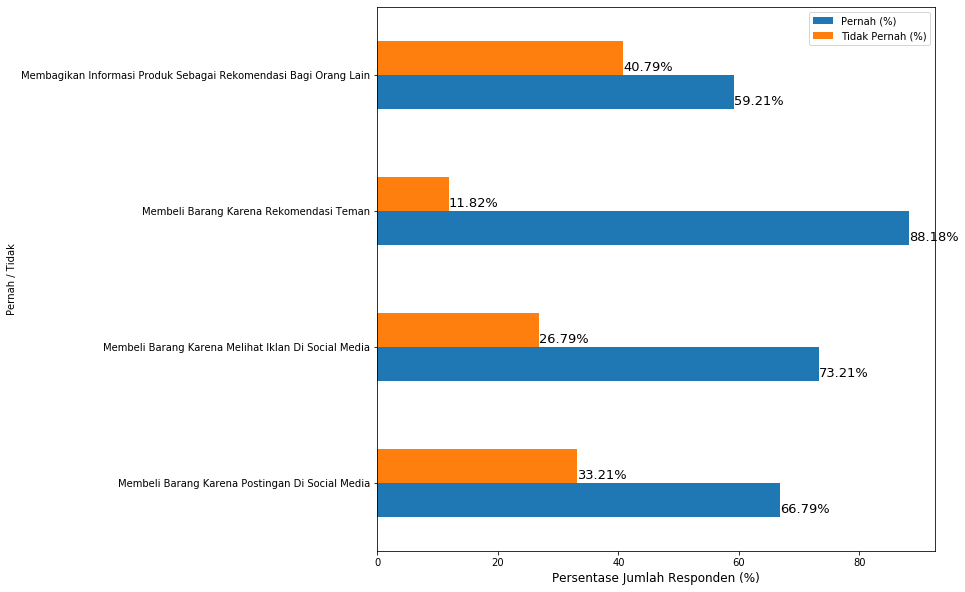

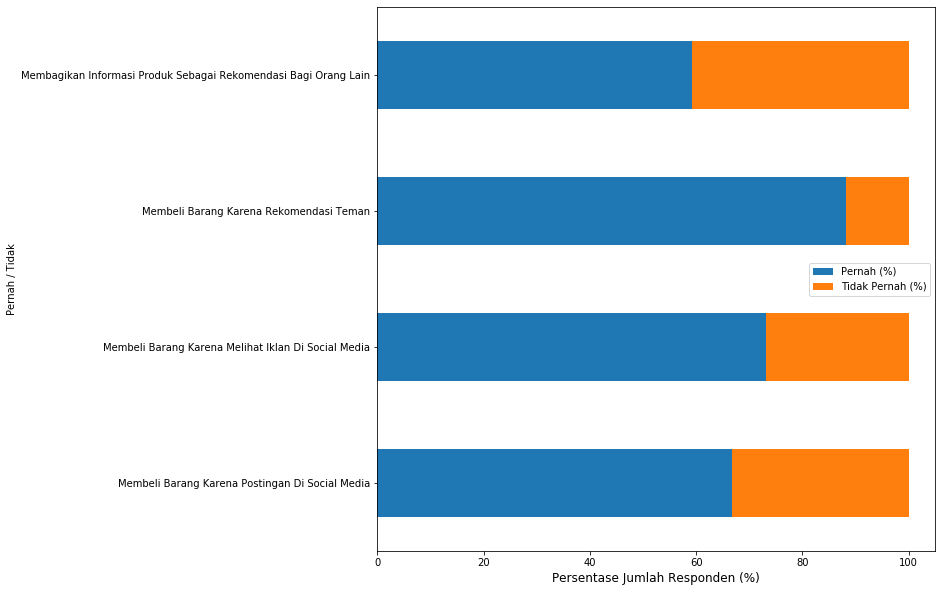

In [153]:
dp45a1 = len(df150.loc[df150["Pernah / Tidak Pernah : Membeli Barang Karena Postingan Di Social Media"] == 'Pernah'])
dp45b1 = len(df150.loc[df150["Pernah / Tidak Pernah : Membeli Barang Karena Postingan Di Social Media"] == 'Tidak Pernah'])
dp45a2 = len(df150.loc[df150["Pernah / Tidak Pernah : Membeli Barang Karena Melihat Iklan Di Social Media"] == 'Pernah'])
dp45b2 = len(df150.loc[df150["Pernah / Tidak Pernah : Membeli Barang Karena Melihat Iklan Di Social Media"] == 'Tidak Pernah'])
dp45a3 = len(df150.loc[df150["Pernah / Tidak Pernah : Membeli Barang Karena Rekomendasi Teman"] == 'Pernah'])
dp45b3 = len(df150.loc[df150["Pernah / Tidak Pernah : Membeli Barang Karena Rekomendasi Teman"] == 'Tidak Pernah'])
dp45a4 = len(df150.loc[df150["Pernah / Tidak Pernah : Membagikan Informasi Produk Sebagai Rekomendasi Bagi Orang Lain"] == 'Pernah'])
dp45b4 = len(df150.loc[df150["Pernah / Tidak Pernah : Membagikan Informasi Produk Sebagai Rekomendasi Bagi Orang Lain"] == 'Tidak Pernah'])

dp451 = dp45a1 + dp45b1
dp452 = dp45a2 + dp45b2
dp453 = dp45a3 + dp45b3
dp454 = dp45a4 + dp45b4

dmet = {'Pernah / Tidak':['Membeli Barang Karena Postingan Di Social Media', 'Membeli Barang Karena Melihat Iklan Di Social Media', "Membeli Barang Karena Rekomendasi Teman", "Membagikan Informasi Produk Sebagai Rekomendasi Bagi Orang Lain"], 'Pernah (%)':[dp45a1/dp451*100,dp45a2/dp452*100,dp45a3/dp453*100,dp45a4/dp454*100], 'Tidak Pernah (%)':[dp45b1/dp451*100,dp45b2/dp452*100,dp45b3/dp453*100,dp45b4/dp454*100]} 
dmets = pd.DataFrame(dmet)
dmetx = {'Pernah / Tidak':['Membeli Barang Karena Postingan Di Social Media', 'Membeli Barang Karena Melihat Iklan Di Social Media', "Membeli Barang Karena Rekomendasi Teman", "Membagikan Informasi Produk Sebagai Rekomendasi Bagi Orang Lain"], 'Pernah':[dp45a1,dp45a2,dp45a3,dp45a4],'Pernah (%)':[dp45a1/dp451*100,dp45a2/dp452*100,dp45a3/dp453*100,dp45a4/dp454*100], 'Tidak Pernah':[dp45b1,dp45b2,dp45b3,dp45b4],'Tidak Pernah (%)':[dp45b1/dp451*100,dp45b2/dp452*100,dp45b3/dp453*100,dp45b4/dp454*100], 'Total' : [dp451, dp452, dp453, dp454]} 
dmetf = pd.DataFrame(dmetx)

ax1 = dmets.plot(kind="barh", x = "Pernah / Tidak", stacked = False, figsize = [10,10])
for i in ax1.patches:
    ax1.text(i.get_width(), i.get_y()+.03, str(round((i.get_width()), 2))+'%', fontsize = 13, color ='black')
plt.xlabel("Persentase Jumlah Responden (%)", fontsize = 12)

ax2 = dmets.plot(kind="barh", x = "Pernah / Tidak", stacked = True, figsize = [10,10])
plt.xlabel("Persentase Jumlah Responden (%)", fontsize = 12)
dmetf

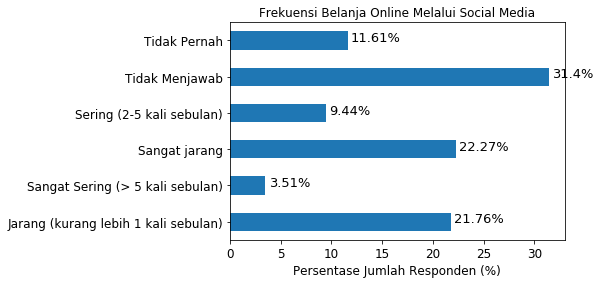

In [154]:
dp46a = df150["Frekuensi Belanja Online Melalui Social Media"].value_counts()/len(df150)*100
dp46 = dp46a.sort_index(ascending = True)
ax = dp46.plot(kind = "barh", title = "Frekuensi Belanja Online Melalui Social Media", fontsize = 12)
plt.xlabel("Persentase Jumlah Responden (%)", fontsize = 12)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.23, str(round((i.get_width()), 2))+'%', fontsize = 13, color ='black')

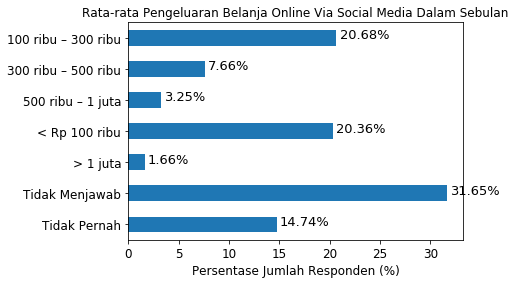

In [155]:
dp47a = df150["Rata-rata Pengeluaran Belanja Online Via Social Media Dalam Sebulan"].value_counts()/len(df150)*100
dp47 = dp47a.sort_index(ascending = False)
ax = dp47.plot(kind = "barh", title = "Rata-rata Pengeluaran Belanja Online Via Social Media Dalam Sebulan", fontsize = 12)
plt.xlabel("Persentase Jumlah Responden (%)", fontsize = 12)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.23, str(round((i.get_width()), 2))+'%', fontsize = 13, color ='black')

1904

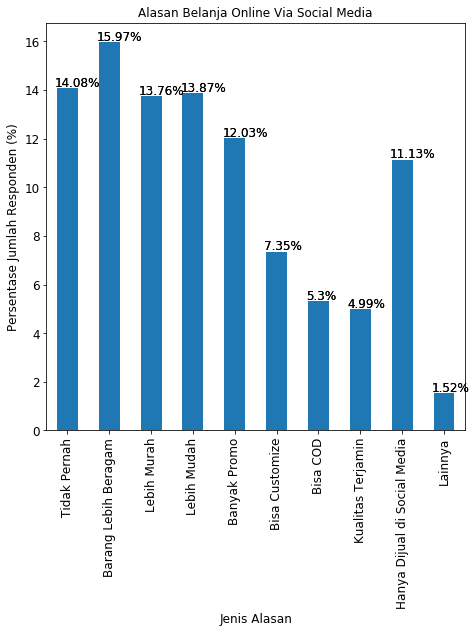

In [156]:
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')
dp46a = df150.Alasan_Belanja_Online_Via_Social_Media.str.contains(r'Tidak_Pernah') 
dp46b = df150.Alasan_Belanja_Online_Via_Social_Media.str.contains(r'Barang_Lebih_Beragam')
dp46c = df150.Alasan_Belanja_Online_Via_Social_Media.str.contains(r'Lebih_Murah')
dp46d = df150.Alasan_Belanja_Online_Via_Social_Media.str.contains(r'Lebih_Mudah')
dp46e = df150.Alasan_Belanja_Online_Via_Social_Media.str.contains(r'Banyak_Promo')
dp46f = df150.Alasan_Belanja_Online_Via_Social_Media.str.contains(r'Bisa_Customize')
dp46g = df150.Alasan_Belanja_Online_Via_Social_Media.str.contains(r'Bisa_CoD')
dp46h = df150.Alasan_Belanja_Online_Via_Social_Media.str.contains(r'Kualitas_Terjamin')
dp46i = df150.Alasan_Belanja_Online_Via_Social_Media.str.contains(r'Hanya_Dijual_Di_Social_Media')
dp46j = df150.Alasan_Belanja_Online_Via_Social_Media.str.contains(r'Lainnya')
dptot = dp46a.sum() + dp46b.sum() + dp46c.sum() +dp46d.sum() +dp46e.sum() +dp46f.sum() +dp46g.sum() +dp46h.sum() +dp46i.sum() +dp46j.sum()
dp46l = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(dp46a, dp46b, left_index = True, right_index = True), dp46c, left_index = True, right_index = True), dp46d, left_index = True, right_index = True), dp46e, left_index = True, right_index = True), dp46f, left_index = True, right_index = True), dp46g, left_index = True, right_index = True), dp46h, left_index = True, right_index = True), dp46i, left_index = True, right_index = True), dp46j, left_index = True, right_index = True)
dp46l.columns = ["Tidak Pernah", "Barang Lebih Beragam", "Lebih Murah", "Lebih Mudah", "Banyak Promo", "Bisa Customize", "Bisa COD", "Kualitas Terjamin", "Hanya Dijual di Social Media", "Lainnya"]
dp46t = dp46l[["Tidak Pernah", "Barang Lebih Beragam", "Lebih Murah", "Lebih Mudah", "Banyak Promo", "Bisa Customize","Bisa COD", "Kualitas Terjamin","Hanya Dijual di Social Media","Lainnya"]].sum()/dptot*100
dp46t.plot(kind="bar", figsize=[10,10])
ax = dp46t.plot(kind = "bar", title = "Alasan Belanja Online Via Social Media", figsize=[7.5,7.5], fontsize = 12)
plt.xlabel("Jenis Alasan", fontsize = 12)
plt.ylabel("Persentase Jumlah Responden (%)", fontsize = 12)
for i in ax.patches:
    ax.text(i.get_x()-.05, i.get_height() + .07, str(round((i.get_height()), 2))+'%', fontsize = 12, color = 'black', rotation = 0)
dptot

1426

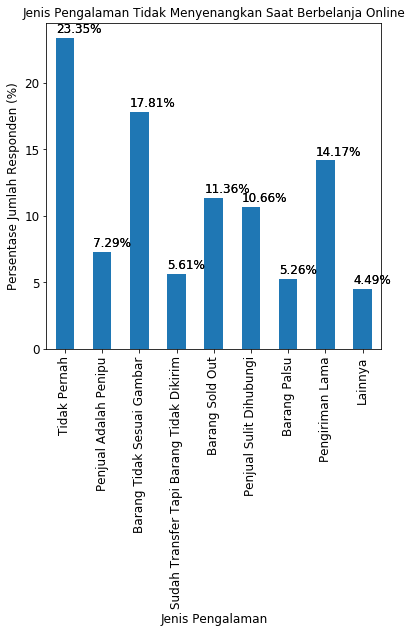

In [157]:
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')
dp47a = df150.Jenis_Pengalaman_Tidak_Menyenangkan.str.contains(r'Tidak_Pernah') 
dp47b = df150.Jenis_Pengalaman_Tidak_Menyenangkan.str.contains(r'Penjual_Adalah_Penipu')
dp47c = df150.Jenis_Pengalaman_Tidak_Menyenangkan.str.contains(r'Barang_Tidak_Sesuai_Gambar')
dp47d = df150.Jenis_Pengalaman_Tidak_Menyenangkan.str.contains(r'Sudah_Transfer_Tapi_Barang_Tidak_Dikirim')
dp47e = df150.Jenis_Pengalaman_Tidak_Menyenangkan.str.contains(r'Barang_Sold_Out')
dp47f = df150.Jenis_Pengalaman_Tidak_Menyenangkan.str.contains(r'Penjual_Sulit_Dihubungi')
dp47g = df150.Jenis_Pengalaman_Tidak_Menyenangkan.str.contains(r'Barang_Palsu')
dp47h = df150.Jenis_Pengalaman_Tidak_Menyenangkan.str.contains(r'Pengiriman_Lama')
dp47i = df150.Jenis_Pengalaman_Tidak_Menyenangkan.str.contains(r'Lainnya')
dptot = dp47a.sum() +  dp47b.sum() + dp47c.sum() + dp47d.sum() + dp47e.sum() + dp47f.sum() + dp47g.sum() + dp47h.sum() + dp47i.sum()
dp47l = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(dp47a, dp47b, left_index = True, right_index = True), dp47c, left_index = True, right_index = True), dp47d, left_index = True, right_index = True), dp47e, left_index = True, right_index = True), dp47f, left_index = True, right_index = True), dp47g, left_index = True, right_index = True), dp47h, left_index = True, right_index = True), dp47i, left_index = True, right_index = True)
dp47l.columns = ["Tidak Pernah", "Penjual Adalah Penipu", "Barang Tidak Sesuai Gambar", "Sudah Transfer Tapi Barang Tidak Dikirim", "Barang Sold Out", "Penjual Sulit Dihubungi", "Barang Palsu", "Pengiriman Lama","Lainnya"]
dp47t = dp47l[["Tidak Pernah", "Penjual Adalah Penipu", "Barang Tidak Sesuai Gambar", "Sudah Transfer Tapi Barang Tidak Dikirim", "Barang Sold Out", "Penjual Sulit Dihubungi","Barang Palsu", "Pengiriman Lama","Lainnya"]].sum()/dptot*100
dp47t.plot(kind="bar", figsize=[10,10])
ax = dp47t.plot(kind = "bar", title = "Jenis Pengalaman Tidak Menyenangkan Saat Berbelanja Online", figsize=[6,6], fontsize = 12)
plt.xlabel("Jenis Pengalaman", fontsize = 12)
plt.ylabel("Persentase Jumlah Responden (%)", fontsize = 12)
for i in ax.patches:
    ax.text(i.get_x() , i.get_height() + .4, str(round((i.get_height()), 2))+'%', fontsize = 12, color = 'black', rotation = 0)
dptot

1102

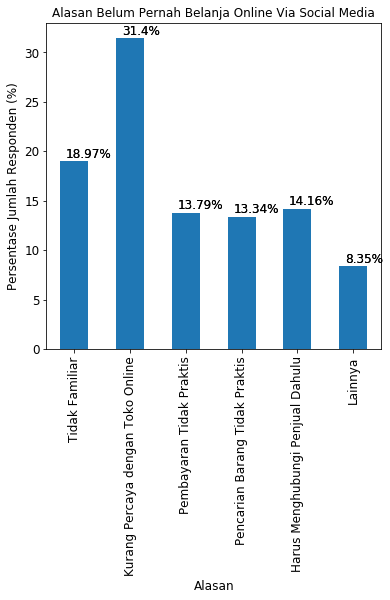

In [158]:
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')
dp47a = df150.Alasan_Belum_Pernah_Belanja_Via_Social_Media.str.contains(r'Tidak_Familiar') 
dp47b = df150.Alasan_Belum_Pernah_Belanja_Via_Social_Media.str.contains(r'Kurang_Percaya_Dengan_Toko_Online')
dp47c = df150.Alasan_Belum_Pernah_Belanja_Via_Social_Media.str.contains(r'Pembayaran_Tidak_Praktis')
dp47d = df150.Alasan_Belum_Pernah_Belanja_Via_Social_Media.str.contains(r'Pencarian_Barang_Tidak_Praktis')
dp47e = df150.Alasan_Belum_Pernah_Belanja_Via_Social_Media.str.contains(r'Harus_Menghubungi_Penjual_Dahulu')
dp47f = df150.Alasan_Belum_Pernah_Belanja_Via_Social_Media.str.contains(r'Lainnya')
dptot = dp47a.sum() + dp47b.sum() + dp47c.sum() + dp47d.sum() + dp47e.sum() + dp47f.sum() 
dp47l = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(dp47a, dp47b, left_index = True, right_index = True), dp47c, left_index = True, right_index = True), dp47d, left_index = True, right_index = True), dp47e, left_index = True, right_index = True), dp47f, left_index = True, right_index = True)
dp47l.columns = ["Tidak Familiar", "Kurang Percaya dengan Toko Online", "Pembayaran Tidak Praktis", "Pencarian Barang Tidak Praktis", "Harus Menghubungi Penjual Dahulu", "Lainnya"]
dp47t = dp47l[["Tidak Familiar", "Kurang Percaya dengan Toko Online", "Pembayaran Tidak Praktis", "Pencarian Barang Tidak Praktis", "Harus Menghubungi Penjual Dahulu", "Lainnya"]].sum()/dptot*100
dp47t.plot(kind="bar", figsize=[10,10])
ax = dp47t.plot(kind = "bar", title = "Alasan Belum Pernah Belanja Online Via Social Media", figsize=[6,6], fontsize = 12)
plt.xlabel("Alasan", fontsize = 12)
plt.ylabel("Persentase Jumlah Responden (%)", fontsize = 12)
for i in ax.patches:
    ax.text(i.get_x() +.1, i.get_height() + .4, str(round((i.get_height()), 2))+'%', fontsize = 12, color = 'black', rotation = 0)
dptot

In [159]:
# Confidence Interval untuk 𝛼 = 0,05 (z = 1,96)

def CI (p, n) :
    z = 1.96
    q = 1 - p
    pbwh = round(p - z*numpy.sqrt(p*q/n), 3)
    patas = round(p + z*numpy.sqrt(p*q/n), 3)
    print (pbwh, " < p < ", patas)

In [160]:
# Confidence Interval untuk Persentase Jenis Kelamin Responden
# Laki-laki
# n = 30
CI (0.4627, 30)
# n = 100
CI (0.4627, 100)
# n = 1567
CI (0.4627, 1567)

# Perempuan
# n = 30
CI (0.5373, 30)
# n = 100
CI (0.5373, 30)
# n = 1567
CI (0.5373, 30)

0.284  < p <  0.641
0.365  < p <  0.56
0.438  < p <  0.487
0.359  < p <  0.716
0.359  < p <  0.716
0.359  < p <  0.716


In [161]:
# Confidence Interval untuk Persentase Usia Responden
# 0-15 tahun
# n = 30
CI (0.0102, 30)
# n = 100
CI (0.0102, 100)
# n = 1567
CI (0.0102, 1567)

# 16-20 tahun
# n = 30
CI (0.6458, 30)
# n = 100
CI (0.6458, 100)
# n = 1567
CI (0.6458, 1567)

# 21-30 tahun
# n = 30
CI (0.1034, 30)
# n = 100
CI (0.1034, 100)
# n = 1567
CI (0.1034, 1567)

# 31-40 tahun
# n = 30
CI (0.0434, 30)
# n = 100
CI (0.0434, 100)
# n = 1567
CI (0.0434, 1567)

# 41-50 tahun
# n = 30
CI (0.1078, 30)
# n = 100
CI (0.1078, 100)
# n = 1567
CI (0.1078, 1567)

# > 50 tahun
# n = 30
CI (0.0893, 30)
# n = 100
CI (0.0893, 100)
# n = 1567
CI (0.0893, 1567)

-0.026  < p <  0.046
-0.009  < p <  0.03
0.005  < p <  0.015
0.475  < p <  0.817
0.552  < p <  0.74
0.622  < p <  0.669
-0.006  < p <  0.212
0.044  < p <  0.163
0.088  < p <  0.118
-0.03  < p <  0.116
0.003  < p <  0.083
0.033  < p <  0.053
-0.003  < p <  0.219
0.047  < p <  0.169
0.092  < p <  0.123
-0.013  < p <  0.191
0.033  < p <  0.145
0.075  < p <  0.103


In [162]:
# Confidence Interval untuk Persentase Pendidikan Terakhir Responden
# SD
# n = 30
CI (0.0032, 30)
# n = 100
CI (0.0032, 100)
# n = 1567
CI (0.0032, 1567)

# SMP
# n = 30
CI (0.0115, 30)
# n = 100
CI (0.0115, 100)
# n = 1567
CI (0.0115, 1567)

# SMA
# n = 30
CI (0.6503, 30)
# n = 100
CI (0.6503, 100)
# n = 1567
CI (0.6503, 1567)

# S1
# n = 30
CI (0.2744, 30)
# n = 100
CI (0.2744, 100)
# n = 1567
CI (0.2744, 1567)

# S2
# n = 30
CI (0.0511, 30)
# n = 100
CI (0.0511, 100)
# n = 1567
CI (0.0511, 1567)

# S3
# n = 30
CI (0.0096, 30)
# n = 100
CI (0.0096, 100)
# n = 1567
CI (0.0096, 1567)

-0.017  < p <  0.023
-0.008  < p <  0.014
0.0  < p <  0.006
-0.027  < p <  0.05
-0.009  < p <  0.032
0.006  < p <  0.017
0.48  < p <  0.821
0.557  < p <  0.744
0.627  < p <  0.674
0.115  < p <  0.434
0.187  < p <  0.362
0.252  < p <  0.296
-0.028  < p <  0.13
0.008  < p <  0.094
0.04  < p <  0.062
-0.025  < p <  0.044
-0.01  < p <  0.029
0.005  < p <  0.014


In [163]:
# Confidence Interval untuk Persentase Pekerjaan Responden
# Pelajar / Mahasiswa
# n = 30
CI (0.6771, 30)
# n = 100
CI (0.6771, 100)
# n = 1567
CI (0.6771, 1567)
print()
# Karyawan Swasta
# n = 30
CI (0.1130, 30)
# n = 100
CI (0.1130, 100)
# n = 1567
CI (0.1130, 1567)
print()
# Ibu Rumah Tangga
# n = 30
CI (0.0702, 30)
# n = 100
CI (0.0702, 100)
# n = 1567
CI (0.0702, 1567)
print()
# Pengusaha
# n = 30
CI (0.0287, 30)
# n = 100
CI (0.0287, 100)
# n = 1567
CI (0.0287, 1567)
print()
# Profesi (Dokter, Dosen, Pengacara, dll)
# n = 30
CI (0.03, 30)
# n = 100
CI (0.03, 100)
# n = 1567
CI (0.03, 1567)
print()
# Pegawai Negeri
# n = 30
CI (0.0325, 30)
# n = 100
CI (0.0325, 100)
# n = 1567
CI (0.0325, 1567)
print()
# Lainnya
# n = 30
CI (0.0485, 30)
# n = 100
CI (0.0485, 100)
# n = 1567
CI (0.0485, 1567)

0.51  < p <  0.844
0.585  < p <  0.769
0.654  < p <  0.7

-0.0  < p <  0.226
0.051  < p <  0.175
0.097  < p <  0.129

-0.021  < p <  0.162
0.02  < p <  0.12
0.058  < p <  0.083

-0.031  < p <  0.088
-0.004  < p <  0.061
0.02  < p <  0.037

-0.031  < p <  0.091
-0.003  < p <  0.063
0.022  < p <  0.038

-0.031  < p <  0.096
-0.002  < p <  0.067
0.024  < p <  0.041

-0.028  < p <  0.125
0.006  < p <  0.091
0.038  < p <  0.059


In [164]:
# Confidence Interval untuk Penghasilan per Bulan Responden
# < 2 juta
# n = 30
CI (0.6152, 30)
# n = 100
CI (0.6152, 100)
# n = 1567
CI (0.6152, 1567)

# 2-5 juta
# n = 30
CI (0.1780, 30)
# n = 100
CI (0.1780, 100)
# n = 1567
CI (0.1780, 1567)

# 5-10 juta
# n = 30
CI (0.0855, 30)
# n = 100
CI (0.0855, 100)
# n = 1567
CI (0.0855, 1567)

# > 10 juta
# n = 30
CI (0.1213, 30)
# n = 100
CI (0.1213, 100)
# n = 1567
CI (0.1213, 1567)

0.441  < p <  0.789
0.52  < p <  0.711
0.591  < p <  0.639
0.041  < p <  0.315
0.103  < p <  0.253
0.159  < p <  0.197
-0.015  < p <  0.186
0.031  < p <  0.14
0.072  < p <  0.099
0.004  < p <  0.238
0.057  < p <  0.185
0.105  < p <  0.137


In [165]:
# Confidence Interval untuk Persentase Responden yang Pernah Belanja Online

# Pernah
# n = 30
CI (0.8296, 30)
# n = 100
CI (0.8296, 100)
# n = 1567
CI (0.8296, 1567)

# Tidak Pernah
# n = 30
CI (0.0204, 30)
# n = 100
CI (0.0204, 100)
# n = 1567
CI (0.0204, 1567)

0.695  < p <  0.964
0.756  < p <  0.903
0.811  < p <  0.848
-0.03  < p <  0.071
-0.007  < p <  0.048
0.013  < p <  0.027


In [166]:
# Confidence Interval untuk Frekuensi Belanja Online Responden
# Meningkat
# n = 30
CI (0.2916, 30)
# n = 100
CI (0.2916, 100)
# n = 1567
CI (0.2916, 1567)

# Tetap
# n = 30
CI (0.2827, 30)
# n = 100
CI (0.2827, 100)
# n = 1567
CI (0.2827, 1567)

# Menurun
# n = 30
CI (0.2699, 30)
# n = 100
CI (0.2699, 100)
# n = 1567
CI (0.2699, 1567)

0.129  < p <  0.454
0.203  < p <  0.381
0.269  < p <  0.314
0.122  < p <  0.444
0.194  < p <  0.371
0.26  < p <  0.305
0.111  < p <  0.429
0.183  < p <  0.357
0.248  < p <  0.292


In [167]:
# Confidence Interval untuk Persentase Platform Belanja Online
# Marketplace
# n = 30
CI (0.4373, 30)
# n = 100
CI (0.4373, 100)
# n = 2662
CI (0.4373, 2662)

# Instagram
# n = 30
CI (0.1435, 30)
# n = 100
CI (0.1435, 100)
# n = 2662
CI (0.1435, 2662)

# Line
# n = 30
CI (0.0274, 30)
# n = 100
CI (0.0274, 100)
# n = 2662
CI (0.0274, 2662)

# Facebook
# n = 30
CI (0.0222, 30)
# n = 100
CI (0.0222, 100)
# n = 2662
CI (0.0222, 2662)

# Whatsapp
# n = 30
CI (0.0518, 30)
# n = 100
CI (0.0518, 100)
# n = 2662
CI (0.0518, 2662)

# Delivery Online
# n = 30
CI (0.3013, 30)
# n = 100
CI (0.3013, 100)
# n = 2662
CI (0.3013, 2662)

# Lainnya
# n = 30
CI (0.0165, 30)
# n = 100
CI (0.0165, 100)
# n = 2662
CI (0.0165, 2662)

0.26  < p <  0.615
0.34  < p <  0.535
0.418  < p <  0.456
0.018  < p <  0.269
0.075  < p <  0.212
0.13  < p <  0.157
-0.031  < p <  0.086
-0.005  < p <  0.059
0.021  < p <  0.034
-0.031  < p <  0.075
-0.007  < p <  0.051
0.017  < p <  0.028
-0.028  < p <  0.131
0.008  < p <  0.095
0.043  < p <  0.06
0.137  < p <  0.465
0.211  < p <  0.391
0.284  < p <  0.319
-0.029  < p <  0.062
-0.008  < p <  0.041
0.012  < p <  0.021


In [168]:
# Confidence Interval untuk Toko Online Favorit
# Tokopedia
# n = 30
CI (0.2389, 30)
# n = 100
CI (0.2389, 100)
# n = 3529
CI (0.2389, 3529)

# Bukalapak
# n = 30
CI (0.1051, 30)
# n = 100
CI (0.1051, 100)
# n = 3529
CI (0.1051, 3529)

# Shopee
# n = 30
CI (0.2454, 30)
# n = 100
CI (0.2454, 100)
# n = 3529
CI (0.2454, 3529)

# Lazada
# n = 30
CI (0.0805, 30)
# n = 100
CI (0.0805, 100)
# n = 3529
CI (0.0805, 3529)

# Blibli
# n = 30
CI (0.0139, 30)
# n = 100
CI (0.0139, 100)
# n = 3529
CI (0.0139, 3529)

# Elevenia
# n = 30
CI (0.0003, 30)
# n = 100
CI (0.0003, 100)
# n = 3529
CI (0.0003, 3529)

# OLX
# n = 30
CI (0.147, 30)
# n = 100
CI (0.147, 100)
# n = 3529
CI (0.147, 3529)

# Matahari Mall
# n = 30
CI (0.0085, 30)
# n = 100
CI (0.0085, 100)
# n = 3529
CI (0.0085, 3529)

# Zalora
# n = 30
CI (0.0332, 30)
# n = 100
CI (0.0332, 100)
# n = 3529
CI (0.0332, 3529)

# Blanja
# n = 30
CI (0.002, 30)
# n = 100
CI (0.002, 100)
# n = 3529
CI (0.002, 3529)

# Gojek
# n = 30
CI (0.2576, 30)
# n = 100
CI (0.2576, 100)
# n = 3529
CI (0.2576, 3529)

# Lainnya
# n = 30
CI (0.0448, 30)
# n = 100
CI (0.0448, 100)
# n = 3529
CI (0.0448, 3529)

0.086  < p <  0.391
0.155  < p <  0.322
0.225  < p <  0.253
-0.005  < p <  0.215
0.045  < p <  0.165
0.095  < p <  0.115
0.091  < p <  0.399
0.161  < p <  0.33
0.231  < p <  0.26
-0.017  < p <  0.178
0.027  < p <  0.134
0.072  < p <  0.089
-0.028  < p <  0.056
-0.009  < p <  0.037
0.01  < p <  0.018
-0.006  < p <  0.006
-0.003  < p <  0.004
-0.0  < p <  0.001
0.02  < p <  0.274
0.078  < p <  0.216
0.135  < p <  0.159
-0.024  < p <  0.041
-0.009  < p <  0.026
0.005  < p <  0.012
-0.031  < p <  0.097
-0.002  < p <  0.068
0.027  < p <  0.039
-0.014  < p <  0.018
-0.007  < p <  0.011
0.001  < p <  0.003
0.101  < p <  0.414
0.172  < p <  0.343
0.243  < p <  0.272
-0.029  < p <  0.119
0.004  < p <  0.085
0.038  < p <  0.052


In [169]:
# Confidence Interval untuk Toko Online Favorit dengan Responden LAKI-LAKI
# Tokopedia
# n = 30
CI (0.5492, 30)
# n = 100
CI (0.5492, 100)
# n = 843
CI (0.5492, 843)

# Bukalapak
# n = 30
CI (0.6792, 30)
# n = 100
CI (0.6792, 100)
# n = 371
CI (0.6792, 371)

# Shopee
# n = 30
CI (0.3522, 30)
# n = 100
CI (0.3522, 100)
# n = 866
CI (0.3522, 866)

# Lazada
# n = 30
CI (0.4296, 30)
# n = 100
CI (0.4296, 100)
# n = 284
CI (0.4296, 284)

# Blibli
# n = 30
CI (0.6735, 30)
# n = 49
CI (0.6735, 49)

# OLX
# n = 30
CI (0.7885, 30)
# n = 52
CI (0.7885, 52)

# Matahari Mall
# n = 30
CI (0.2667, 30)

# Zalora
# n = 30
CI (0.2991, 30)
# n = 100
CI (0.2991, 100)
# n = 117
CI (0.2991, 117)

# Gojek
# n = 30
CI (0.4125, 30)
# n = 100
CI (0.4125, 100)
# n = 909
CI (0.4125, 909)

0.371  < p <  0.727
0.452  < p <  0.647
0.516  < p <  0.583
0.512  < p <  0.846
0.588  < p <  0.771
0.632  < p <  0.727
0.181  < p <  0.523
0.259  < p <  0.446
0.32  < p <  0.384
0.252  < p <  0.607
0.333  < p <  0.527
0.372  < p <  0.487
0.506  < p <  0.841
0.542  < p <  0.805
0.642  < p <  0.935
0.678  < p <  0.899
0.108  < p <  0.425
0.135  < p <  0.463
0.209  < p <  0.389
0.216  < p <  0.382
0.236  < p <  0.589
0.316  < p <  0.509
0.38  < p <  0.445


In [196]:
# Confidence Interval untuk Toko Online Favorit dengan Responden PEREMPUAN
# Tokopedia
# n = 30
CI (0.4508, 30)
# n = 100
CI (0.4508, 100)
# n = 843
CI (0.4508, 843)

# Bukalapak
# n = 30
CI (0.3208, 30)
# n = 100
CI (0.3208, 100)
# n = 371
CI (0.3208, 371)

# Shopee
# n = 30
CI (0.6478, 30)
# n = 100
CI (0.6478, 100)
# n = 866
CI (0.6478, 866)

# Lazada
# n = 30
CI (0.5704, 30)
# n = 100
CI (0.5704, 100)
# n = 284
CI (0.5704, 284)

# Blibli
# n = 30
CI (0.3265, 30)
# n = 49
CI (0.3265, 49)

# OLX
# n = 30
CI (0.2115, 30)
# n = 52
CI (0.2115, 52)

# Matahari Mall
# n = 30
CI (0.7333, 30)

# Zalora
# n = 30
CI (0.7009, 30)
# n = 100
CI (0.7009, 100)
# n = 117
CI (0.7009, 117)

# Gojek
# n = 30
CI (0.5875, 30)
# n = 100
CI (0.5875, 100)
# n = 909
CI (0.5875, 909)

0.273  < p <  0.629
0.353  < p <  0.548
0.417  < p <  0.484
0.154  < p <  0.488
0.229  < p <  0.412
0.273  < p <  0.368
0.477  < p <  0.819
0.554  < p <  0.741
0.616  < p <  0.68
0.393  < p <  0.748
0.473  < p <  0.667
0.513  < p <  0.628
0.159  < p <  0.494
0.195  < p <  0.458
0.065  < p <  0.358
0.101  < p <  0.322
0.575  < p <  0.892
0.537  < p <  0.865
0.611  < p <  0.791
0.618  < p <  0.784
0.411  < p <  0.764
0.491  < p <  0.684
0.555  < p <  0.62


In [187]:
# Confidence Interval untuk Booking Online Favorit

# Tiket.com
# n = 30
CI (0.205, 30)
# n = 100
CI (0.205, 100)
# n = 3064
CI (0.205, 3064)

# Traveloka
# n = 30
CI (0.3561, 30)
# n = 100
CI (0.3561, 100)
# n = 3064
CI (0.3561, 3064)

# Tokopedia
# n = 30
CI (0.0868, 30)
# n = 100
CI (0.0868, 100)
# n = 3064
CI (0.0868, 3064)

0.061  < p <  0.349
0.126  < p <  0.284
0.191  < p <  0.219
0.185  < p <  0.527
0.262  < p <  0.45
0.339  < p <  0.373
-0.014  < p <  0.188
0.032  < p <  0.142
0.077  < p <  0.097


In [188]:
# Confidence Interval untuk Jenis Produk yang Dibeli Secara ONLINE
# Fashion & Mode
# n = 30
CI (0.2937, 30)
# n = 100
CI (0.2937, 100)
# n = 1178
CI (0.2937, 1178)

# Groceries
# n = 30
CI (0.0908, 30)
# n = 100
CI (0.0908, 100)
# n = 1178
CI (0.0908, 1178)

# Handphone
# n = 30
CI (0.1621, 30)
# n = 100
CI (0.1621, 100)
# n = 1178
CI (0.1621, 1178)

# Laptop/Komputer
# n = 30
CI (0.1222, 30)
# n = 100
CI (0.1222, 100)
# n = 1178
CI (0.1222, 1178)

# Alat Elektronik
# n = 30
CI (0.2249, 30)
# n = 100
CI (0.2249, 100)
# n = 1178
CI (0.2249, 1178)

# Kosmetik
# n = 30
CI (0.3744, 30)
# n = 100
CI (0.3744, 100)
# n = 1178
CI (0.3744, 1178)

# Buku, Hobi, & Koleksi
# n = 30
CI (0.5314, 30)
# n = 100
CI (0.5314, 100)
# n = 1178
CI (0.5314, 1178)

# Pulsa
# n = 30
CI (0.7929, 30)
# n = 100
CI (0.7929, 100)
# n = 1178
CI (0.7929, 1178)

# Makanan & Minuman
# n = 30
CI (0.4143, 30)
# n = 100
CI (0.4143, 100)
# n = 1178
CI (0.4143, 1178)


0.131  < p <  0.457
0.204  < p <  0.383
0.268  < p <  0.32
-0.012  < p <  0.194
0.034  < p <  0.147
0.074  < p <  0.107
0.03  < p <  0.294
0.09  < p <  0.234
0.141  < p <  0.183
0.005  < p <  0.239
0.058  < p <  0.186
0.103  < p <  0.141
0.075  < p <  0.374
0.143  < p <  0.307
0.201  < p <  0.249
0.201  < p <  0.548
0.28  < p <  0.469
0.347  < p <  0.402
0.353  < p <  0.71
0.434  < p <  0.629
0.503  < p <  0.56
0.648  < p <  0.938
0.713  < p <  0.872
0.77  < p <  0.816
0.238  < p <  0.591
0.318  < p <  0.511
0.386  < p <  0.442


In [189]:
# Confidence Interval untuk Pengeluaran Ojek Online
# < 50 ribu
# n = 30
CI (0.208, 30)
# n = 100
CI (0.208, 100)
# n = 1567
CI (0.208, 1567)

# 50 ribu - 100 ribu
# n = 30
CI (0.1997, 30)
# n = 100
CI (0.1997, 100)
# n = 1567
CI (0.1997, 1567)

# 100 ribu - 250 ribu
# n = 30
CI (0.1289, 30)
# n = 100
CI (0.1289, 100)
# n = 1567
CI (0.1289, 1567)

# 250 ribu - 500 ribu
# n = 30
CI (0.0549, 30)
# n = 100
CI (0.0549, 100)
# n = 1567
CI (0.0549, 1567)

# 500 ribu - 1 juta
# n = 30
CI (0.0115, 30)
# n = 100
CI (0.0115, 100)
# n = 1567
CI (0.0115, 1567)

# > 1 juta
# n = 30
CI (0.0045, 30)
# n = 100
CI (0.0045, 100)
# n = 1567
CI (0.0045, 1567)


0.063  < p <  0.353
0.128  < p <  0.288
0.188  < p <  0.228
0.057  < p <  0.343
0.121  < p <  0.278
0.18  < p <  0.219
0.009  < p <  0.249
0.063  < p <  0.195
0.112  < p <  0.145
-0.027  < p <  0.136
0.01  < p <  0.1
0.044  < p <  0.066
-0.027  < p <  0.05
-0.009  < p <  0.032
0.006  < p <  0.017
-0.019  < p <  0.028
-0.009  < p <  0.018
0.001  < p <  0.008


In [190]:
# Confidence Interval untuk Pengeluaran Taksi Online
# < 50 ribu
# n = 30
CI (0.2336, 30)
# n = 100
CI (0.2336, 100)
# n = 1567
CI (0.2336, 1567)

# 50 ribu - 100 ribu
# n = 30
CI (0.1525, 30)
# n = 100
CI (0.1525, 100)
# n = 1567
CI (0.1525, 1567)

# 100 ribu - 250 ribu
# n = 30
CI (0.1098, 30)
# n = 100
CI (0.1098, 100)
# n = 1567
CI (0.1098, 1567)

# 250 ribu - 500 ribu
# n = 30
CI (0.0377, 30)
# n = 100
CI (0.0377, 100)
# n = 1567
CI (0.0377, 1567)

# 500 ribu - 1 juta
# n = 30
CI (0.0102, 30)
# n = 100
CI (0.0102, 100)
# n = 1567
CI (0.0102, 1567)

# > 1 juta
# n = 30
CI (0.0038, 30)
# n = 100
CI (0.0038, 100)
# n = 1567
CI (0.0038, 1567)

0.082  < p <  0.385
0.151  < p <  0.317
0.213  < p <  0.255
0.024  < p <  0.281
0.082  < p <  0.223
0.135  < p <  0.17
-0.002  < p <  0.222
0.049  < p <  0.171
0.094  < p <  0.125
-0.03  < p <  0.106
0.0  < p <  0.075
0.028  < p <  0.047
-0.026  < p <  0.046
-0.009  < p <  0.03
0.005  < p <  0.015
-0.018  < p <  0.026
-0.008  < p <  0.016
0.001  < p <  0.007


In [191]:
# Confidence Interval untuk Frekuensi Penggunaan Ojek Online
# Tidak Pernah
# n = 30
CI (0.0472, 30)
# n = 100
CI (0.0472, 100)
# n = 1567
CI (0.0472, 1567)

# Hanya ketika memerlukan / Tidak Tentu
# n = 30
CI (0.2157, 30)
# n = 100
CI (0.2157, 100)
# n = 1567
CI (0.2157, 1567)

# Hanya beberapa kali dalam sebulan
# n = 30
CI (0.0683, 30)
# n = 100
CI (0.0683, 100)
# n = 1567
CI (0.0683, 1567)

# 1-3 kali seminggu
# n = 30
CI (0.0619, 30)
# n = 100
CI (0.0619, 100)
# n = 1567
CI (0.0619, 1567)

# 4-6 kali seminggu
# n = 30
CI (0.1238, 30)
# n = 100
CI (0.1238, 100)
# n = 1567
CI (0.1238, 1567)

# 1-2 hari sekali
# n = 30
CI (0.1685, 30)
# n = 100
CI (0.1685, 100)
# n = 1567
CI (0.1685, 1567)

-0.029  < p <  0.123
0.006  < p <  0.089
0.037  < p <  0.058
0.069  < p <  0.363
0.135  < p <  0.296
0.195  < p <  0.236
-0.022  < p <  0.159
0.019  < p <  0.118
0.056  < p <  0.081
-0.024  < p <  0.148
0.015  < p <  0.109
0.05  < p <  0.074
0.006  < p <  0.242
0.059  < p <  0.188
0.107  < p <  0.14
0.035  < p <  0.302
0.095  < p <  0.242
0.15  < p <  0.187


In [192]:
# Confidence Interval untuk Frekuensi Penggunaan Taksi Online
# Tidak Pernah
# n = 30
CI (0.06, 30)
# n = 100
CI (0.06, 100)
# n = 1567
CI (0.06, 1567)

# Hanya ketika memerlukan / Tidak Tentu
# n = 30
CI (0.3287, 30)
# n = 100
CI (0.3287, 100)
# n = 1567
CI (0.3287, 1567)

# Hanya beberapa kali dalam sebulan
# n = 30
CI (0.0804, 30)
# n = 100
CI (0.0804, 100)
# n = 1567
CI (0.0804, 1567)

# 1-3 kali seminggu
# n = 30
CI (0.0638, 30)
# n = 100
CI (0.0638, 100)
# n = 1567
CI (0.0638, 1567)

# 4-6 kali seminggu
# n = 30
CI (0.0447, 30)
# n = 100
CI (0.0447, 100)
# n = 1567
CI (0.0447, 1567)

# 1-2 hari sekali
# n = 30
CI (0.0574, 30)
# n = 100
CI (0.0574, 100)
# n = 1567
CI (0.0574, 1567)

-0.025  < p <  0.145
0.013  < p <  0.107
0.048  < p <  0.072
0.161  < p <  0.497
0.237  < p <  0.421
0.305  < p <  0.352
-0.017  < p <  0.178
0.027  < p <  0.134
0.067  < p <  0.094
-0.024  < p <  0.151
0.016  < p <  0.112
0.052  < p <  0.076
-0.029  < p <  0.119
0.004  < p <  0.085
0.034  < p <  0.055
-0.026  < p <  0.141
0.012  < p <  0.103
0.046  < p <  0.069


In [193]:
# Confidence Interval untuk Penggunaan Jasa Ojek Online
# Gojek
# n = 30
CI (0.2757, 30)
# n = 100
CI (0.2757, 100)
# n = 1567
CI (0.2757, 1567)

# Grab
# n = 30
CI (0.187, 30)
# n = 100
CI (0.187, 100)
# n = 1567
CI (0.187, 1567)

# Sama Saja
# n = 30
CI (0.231, 30)
# n = 100
CI (0.231, 100)
# n = 1567
CI (0.231, 1567)


0.116  < p <  0.436
0.188  < p <  0.363
0.254  < p <  0.298
0.047  < p <  0.327
0.111  < p <  0.263
0.168  < p <  0.206
0.08  < p <  0.382
0.148  < p <  0.314
0.21  < p <  0.252


In [194]:
# Confidence Interval untuk Penggunaan Jasa Taksi Online
# Gojek
# n = 30
CI (0.1921, 30)
# n = 100
CI (0.19217, 100)
# n = 1567
CI (0.1921, 1567)

# Grab
# n = 30
CI (0.2419, 30)
# n = 100
CI (0.2419, 100)
# n = 1567
CI (0.2419, 1567)

# Sama Saja
# n = 30
CI (0.2565, 30)
# n = 100
CI (0.2565, 100)
# n = 1567
CI (0.2565, 1567)


0.051  < p <  0.333
0.115  < p <  0.269
0.173  < p <  0.212
0.089  < p <  0.395
0.158  < p <  0.326
0.221  < p <  0.263
0.1  < p <  0.413
0.171  < p <  0.342
0.235  < p <  0.278


In [195]:
# Confidence Interval untuk Penggunaan Jasa Pengiriman Barang
# Gojek
# n = 30
CI (0.2872, 30)
# n = 100
CI (0.2872, 100)
# n = 1567
CI (0.2872, 1567)

# Grab
# n = 30
CI (0.0996, 30)
# n = 100
CI (0.0996, 100)
# n = 1567
CI (0.0996, 1567)

# Sama Saja
# n = 30
CI (0.2891, 30)
# n = 100
CI (0.2891, 100)
# n = 1567
CI (0.2891, 1567)


0.125  < p <  0.449
0.199  < p <  0.376
0.265  < p <  0.31
-0.008  < p <  0.207
0.041  < p <  0.158
0.085  < p <  0.114
0.127  < p <  0.451
0.2  < p <  0.378
0.267  < p <  0.312


In [197]:
# Confidence Interval untuk Social Media Responden Berusia < 30 tahun
# Instagram
# n = 30
CI (0.7316, 30)
# n = 100
CI (0.7316, 100)
# n = 842
CI (0.7316, 842)

# Facebook
# n = 30
CI (0.3308, 30)
# n = 100
CI (0.3308, 100)
# n = 130
CI (0.3308, 130)

# Whatsapp
# n = 30
CI (0.3361, 30)
# n = 100
CI (0.3361, 100)
# n = 122
CI (0.3361, 122)

# Line
# n = 30
CI (0.8939, 30)
# n = 100
CI (0.8939, 100)
# n = 132
CI (0.8939, 132)

# Twitter
# n = 30
CI (0.9146, 30)
# n = 82
CI (0.9146, 82)

# Lainnya
# n = 30
CI (0.5732, 30)
# n = 82
CI (0.5732, 82)

0.573  < p <  0.89
0.645  < p <  0.818
0.702  < p <  0.762
0.162  < p <  0.499
0.239  < p <  0.423
0.25  < p <  0.412
0.167  < p <  0.505
0.244  < p <  0.429
0.252  < p <  0.42
0.784  < p <  1.004
0.834  < p <  0.954
0.841  < p <  0.946
0.815  < p <  1.015
0.854  < p <  0.975
0.396  < p <  0.75
0.466  < p <  0.68


In [198]:
# Confidence Interval untuk Social Media Responden Berusia > 30 tahun
# Instagram
# n = 30
CI (0.2684, 30)
# n = 100
CI (0.2684, 100)
# n = 842
CI (0.2684, 842)

# Facebook
# n = 30
CI (0.6692, 30)
# n = 100
CI (0.6692, 100)
# n = 130
CI (0.6692, 130)

# Whatsapp
# n = 30
CI (0.6639, 30)
# n = 100
CI (0.6639, 100)
# n = 122
CI (0.6639, 122)

# Line
# n = 30
CI (0.1061, 30)
# n = 100
CI (0.1061, 100)
# n = 132
CI (0.1061, 132)

# Twitter
# n = 30
CI (0.0854, 30)
# n = 82
CI (0.0854, 82)

# Lainnya
# n = 30
CI (0.4268, 30)
# n = 82
CI (0.4268, 82)

0.11  < p <  0.427
0.182  < p <  0.355
0.238  < p <  0.298
0.501  < p <  0.838
0.577  < p <  0.761
0.588  < p <  0.75
0.495  < p <  0.833
0.571  < p <  0.756
0.58  < p <  0.748
-0.004  < p <  0.216
0.046  < p <  0.166
0.054  < p <  0.159
-0.015  < p <  0.185
0.025  < p <  0.146
0.25  < p <  0.604
0.32  < p <  0.534


In [199]:
# Confidence Interval untuk Social Media Responden Laki-laki
# Instagram
# n = 30
CI (0.4169, 30)
# n = 100
CI (0.4169, 100)
# n = 842
CI (0.4169, 842)

# Facebook
# n = 30
CI (0.6231, 30)
# n = 100
CI (0.6231, 100)
# n = 130
CI (0.6231, 130)

# Whatsapp
# n = 30
CI (0.459, 30)
# n = 100
CI (0.459, 100)
# n = 122
CI (0.459, 122)

# Line
# n = 30
CI (0.5833, 30)
# n = 100
CI (0.5833, 100)
# n = 132
CI (0.5833, 132)

# Twitter
# n = 30
CI (0.2683, 30)
# n = 82
CI (0.2683, 82)

# Lainnya
# n = 30
CI (0.5976, 30)
# n = 82
CI (0.5976, 82)

0.24  < p <  0.593
0.32  < p <  0.514
0.384  < p <  0.45
0.45  < p <  0.797
0.528  < p <  0.718
0.54  < p <  0.706
0.281  < p <  0.637
0.361  < p <  0.557
0.371  < p <  0.547
0.407  < p <  0.76
0.487  < p <  0.68
0.499  < p <  0.667
0.11  < p <  0.427
0.172  < p <  0.364
0.422  < p <  0.773
0.491  < p <  0.704


In [200]:
# Confidence Interval untuk Social Media Responden Perempuan
# Instagram
# n = 30
CI (0.5831, 30)
# n = 100
CI (0.5831, 100)
# n = 842
CI (0.5831, 842)

# Facebook
# n = 30
CI (0.3769, 30)
# n = 100
CI (0.3769, 100)
# n = 130
CI (0.3769, 130)

# Whatsapp
# n = 30
CI (0.541, 30)
# n = 100
CI (0.541, 100)
# n = 122
CI (0.541, 122)

# Line
# n = 30
CI (0.4167, 30)
# n = 100
CI (0.4167, 100)
# n = 132
CI (0.4167, 132)

# Twitter
# n = 30
CI (0.7317, 30)
# n = 82
CI (0.7317, 82)

# Lainnya
# n = 30
CI (0.4024, 30)
# n = 82
CI (0.4024, 82)

0.407  < p <  0.76
0.486  < p <  0.68
0.55  < p <  0.616
0.203  < p <  0.55
0.282  < p <  0.472
0.294  < p <  0.46
0.363  < p <  0.719
0.443  < p <  0.639
0.453  < p <  0.629
0.24  < p <  0.593
0.32  < p <  0.513
0.333  < p <  0.501
0.573  < p <  0.89
0.636  < p <  0.828
0.227  < p <  0.578
0.296  < p <  0.509


In [201]:
# Confidence Interval untuk Frekuensi Belanja Online Melalui Social Media
# Tidak Pernah
# n = 30
CI (0.1161, 30)
# n = 100
CI (0.1161, 100)
# n = 1567
CI (0.1161, 1567)

# Sangat Jarang
# n = 30
CI (0.2227, 30)
# n = 100
CI (0.2227, 100)
# n = 1567
CI (0.2227, 1567)

# Jarang
# n = 30
CI (0.2176, 30)
# n = 100
CI (0.2176, 100)
# n = 1567
CI (0.2176, 1567)

# Sering
# n = 30
CI (0.0944, 30)
# n = 100
CI (0.0944, 100)
# n = 1567
CI (0.0944, 1567)

# Sangat Sering
# n = 30
CI (0.0351, 30)
# n = 100
CI (0.0351, 100)
# n = 1567
CI (0.0351, 1567)


0.001  < p <  0.231
0.053  < p <  0.179
0.1  < p <  0.132
0.074  < p <  0.372
0.141  < p <  0.304
0.202  < p <  0.243
0.07  < p <  0.365
0.137  < p <  0.298
0.197  < p <  0.238
-0.01  < p <  0.199
0.037  < p <  0.152
0.08  < p <  0.109
-0.031  < p <  0.101
-0.001  < p <  0.071
0.026  < p <  0.044


In [202]:
# Confidence Interval untuk Rata-rata Pengeluaran Belanja Online Melalui Social Media
# Tidak Pernah
# n = 30
CI (0.1474, 30)
# n = 100
CI (0.1474, 100)
# n = 1567
CI (0.1474, 1567)

# < 100 ribu
# n = 30
CI (0.2036, 30)
# n = 100
CI (0.2036, 100)
# n = 1567
CI (0.2036, 1567)

# 100-300 ribu
# n = 30
CI (0.2068, 30)
# n = 100
CI (0.2068, 100)
# n = 1567
CI (0.2068, 1567)

# 300-500 ribu
# n = 30
CI (0.0766, 30)
# n = 100
CI (0.0766, 100)
# n = 1567
CI (0.0766, 1567)

# 500 ribu - 1 juta
# n = 30
CI (0.0325, 30)
# n = 100
CI (0.0325, 100)
# n = 1567
CI (0.0325, 1567)

# > 1 juta
# n = 30
CI (0.0166, 30)
# n = 100
CI (0.0166, 100)
# n = 1567
CI (0.0166, 1567)


0.021  < p <  0.274
0.078  < p <  0.217
0.13  < p <  0.165
0.06  < p <  0.348
0.125  < p <  0.283
0.184  < p <  0.224
0.062  < p <  0.352
0.127  < p <  0.286
0.187  < p <  0.227
-0.019  < p <  0.172
0.024  < p <  0.129
0.063  < p <  0.09
-0.031  < p <  0.096
-0.002  < p <  0.067
0.024  < p <  0.041
-0.029  < p <  0.062
-0.008  < p <  0.042
0.01  < p <  0.023


In [170]:
def z (p1, p2, n1, n2) :
    q1 = 1 - p1
    q2 = 1 - p2
    z = round((p1-p2)/numpy.sqrt(p1*q1/n1 + p2*q2/n2), 3)
    return z

In [171]:
# uji hipotesis apakah proporsi pembeli perempuan pada Matahari Mall lebih tinggi dari proporsi pembeli perempuan pada Zalora.
z(0.7333, 0.7008, 30, 117)

0.356

In [172]:
# uji hipotesis apakah proporsi pembeli perempuan pada Matahari Mall lebih tinggi dari proporsi pembeli perempuan pada Shopee.
z(0.7333, 0.6478, 30, 866)

1.038

In [173]:
# uji hipotesis apakah proporsi pembeli perempuan pada Matahari Mall lebih tinggi dari proporsi pembeli perempuan pada Gojek
z(0.7333, 0.5874, 30, 909)

1.771

In [174]:
# uji hipotesis apakah proporsi pembeli laki-laki pada OLX lebih tinggi dari proporsi pembeli laki-laki pada Bukalapak.
z(0.7885, 0.6792, 52, 371)

1.774

In [175]:
# uji hipotesis apakah proporsi penjualan groceries secara offline lebih banyak daripada penjualan laptop/komputer secara offline.
z(0.9092, 0.8778, 1178, 1178)

2.474

In [176]:
# uji hipotesis apakah proporsi penjualan laptop/komputer secara offline lebih banyak daripada penjualan handphone secara offline.
z(0.8778, 0.8379, 1178, 1178)

2.778

In [177]:
# uji hipotesis apakah proporsi pengeluaran untuk taksi online pada kisaran < 50 ribu per bulan lebih banyak daripada kisaran 50 – 100 ribu.
z(0.2336, 0.1525, 1567, 1567)

5.782

In [178]:
# uji hipotesis apakah proporsi pengeluaran untuk ojek online pada kisaran < 50 ribu per bulan lebih banyak daripada kisaran 50 – 100 ribu.
z(0.208, 0.1997, 1567, 1567)

0.577

In [179]:
# uji hipotesis apakah untuk jasa ojek online, proporsi preferensi terhadap Gojek lebih besar dari “sama saja"
z(0.2757, 0.231, 1567, 1567)

2.881

In [180]:
# uji hipotesis apakah untuk jasa taksi online, proporsi preferensi terhadap “sama saja" lebih besar dari Grab
z(0.2565, 0.2419, 1567, 1567)

0.945

In [181]:
# uji hipotesis apakah untuk jasa taksi online, proporsi preferensi terhadap Grab lebih besar dari Gojek
z(0.2419, 0.1921, 1567, 1567)

3.388

In [182]:
# uji hipotesis untuk responden < 30 tahun apakah proporsi pengguna Twitter lebih banyak daripada pengguna Line
z(0.9146, 0.8939, 82, 132)

0.506

In [183]:
# uji hipotesis untuk responden < 30 tahun apakah proporsi pengguna Line lebih banyak daripada pengguna Instagram
z(0.8939, 0.7316, 132, 842)

5.261

In [184]:
# uji hipotesis untuk responden > 30 tahun apakah proporsi pengguna Facebook lebih banyak daripada pengguna Whatsapp
z(0.6692, 0.6639, 130, 122)

0.089

In [185]:
# uji hipotesis untuk responden perempuan apakah proporsi pengguna Twitter lebih banyak daripada pengguna Instagram
z(0.7317, 0.5831, 82, 842)

2.869

In [186]:
# uji hipotesis untuk responden laki-laki apakah proporsi pengguna Facebook lebih banyak daripada pengguna Line
z(0.6231, 0.5833, 130, 132)

0.659